In [38]:
import os

In [39]:
os.getcwd()

'/media/ibme_sv/ibme1/ibme1'

In [40]:
os.chdir("/media/ibme_sv/ibme1/ibme1")

# Step1: Generate json

In [64]:
import mediapipe as mp
import cv2
import json
import os
from tqdm.notebook import tqdm
from pathlib import Path
# Hàm trích xuất keypoints từ video rồi đưa vào json
def process_video(video_path, save_dir):
    mp_drawing = mp.solutions.drawing_utils
    mp_pose = mp.solutions.pose
    cap = cv2.VideoCapture(video_path)
    frame_index = 1
    pose_keypoints = []
    save_data_json = []
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert the image to RGB for Mediapipe
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Process the image with Mediapipe
            results = pose.process(image)

            # Draw the keypoints on the image
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            if results.pose_landmarks:
                for i, landmark in enumerate(results.pose_landmarks.landmark):
                    if i <= 24:
                        pose_keypoints.append(landmark.x)
                        pose_keypoints.append(landmark.y)
            video_path_split = video_path.split("/")
            label = video_path_split[-2]
            if label.lower() == "extra":
                label_name_index = video_path_split[-3].index(" ")
                label = video_path_split[-3][(label_name_index+1):]
            else:
                label_name_index = video_path_split[-2].index(" ")
                label = video_path_split[-2][(label_name_index+1):]
            save_data = {
                "uid": video_path,
                "label": label,
                "frame_index": frame_index,
                "pose": pose_keypoints,
            }
            save_data_json.append(save_data)
            pose_keypoints = []
            frame_index +=  1
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    save_dir = Path(save_dir) / f"{video_path_split[-1].split('.')[0]}.json"
    with open(save_dir, "w") as f:
            json.dump(save_data_json, f)
    print(f"Done {video_path}")


# Hàm liệt kê các video ở trong train, valid, test ở trong file txt
def save_json(video_path, save_data_path, map_path, mode = ""):
    file_path = Path(map_path) / f'include_{mode}.txt'
    with open(file_path, 'r') as file:
        file_contents = file.read()
    file_contents = file_contents.split("\n")
    save_data_path = save_data_path + "_" + mode
    print(save_data_path)
    print(len(file_contents))
    file_list = tqdm(file_contents, total = len(file_contents))
    for file in file_list:
        check_valid_path = 1
        file_name = Path(video_path) / f"{file}"
        if not file_name.exists():
#             print("The path does not exist.")
            file = file.replace("MOV", "MP4")
            file_name = Path(video_path) / f"{file}"
        if not file_name.exists():
            print(file_name)
            print("The path still not exist. Pass")
            check_valid_path = 0
        if check_valid_path:
            print(file_name)
            process_video(str(file_name), save_data_path)
            file_list.update(1)
            file_list.set_postfix({'Status': 'Processing'})
#             break

if __name__ == "__main__":
    video_path = "isl"
    save_data_path = "isl/save_data"
    map_path = "isl/map"
    #tạo file json theo từng tập train, val, test
#     save_json(video_path, save_data_path, map_path, mode = "train")
#     save_json(video_path, save_data_path, map_path, mode = "val")
    save_json(video_path, save_data_path, map_path, mode = "test")

isl/save_data_test
818


  0%|          | 0/818 [00:00<?, ?it/s]

isl/Adjectives/1. loud/MVI_9289.MOV
Done isl/Adjectives/1. loud/MVI_9289.MOV
isl/Adjectives/1. loud/MVI_5257.MOV
Done isl/Adjectives/1. loud/MVI_5257.MOV
isl/Adjectives/1. loud/MVI_9369.MOV
Done isl/Adjectives/1. loud/MVI_9369.MOV
isl/Adjectives/1. loud/MVI_9448.MOV
Done isl/Adjectives/1. loud/MVI_9448.MOV
isl/Adjectives/10. Mean/MVI_9593.MOV
Done isl/Adjectives/10. Mean/MVI_9593.MOV
isl/Adjectives/10. Mean/MVI_9731.MOV
Done isl/Adjectives/10. Mean/MVI_9731.MOV
isl/Adjectives/11. rich/MVI_9734.MOV
Done isl/Adjectives/11. rich/MVI_9734.MOV
isl/Adjectives/11. rich/MVI_9597.MOV
Done isl/Adjectives/11. rich/MVI_9597.MOV
isl/Adjectives/12. poor/MVI_9600.MOV
Done isl/Adjectives/12. poor/MVI_9600.MOV
isl/Adjectives/13. thick/MVI_9607.MOV
Done isl/Adjectives/13. thick/MVI_9607.MOV
isl/Adjectives/13. thick/MVI_9743.MOV
Done isl/Adjectives/13. thick/MVI_9743.MOV
isl/Adjectives/14. thin/MVI_9612.MOV
Done isl/Adjectives/14. thin/MVI_9612.MOV
isl/Adjectives/15. expensive/MVI_9749.MOV
Done isl/Adjec

Done isl/Adjectives/88. cold/MVI_9412.MOV
isl/Adjectives/88. cold/MVI_5219.MOV
Done isl/Adjectives/88. cold/MVI_5219.MOV
isl/Adjectives/89. warm/MVI_5302.MOV
Done isl/Adjectives/89. warm/MVI_5302.MOV
isl/Adjectives/89. warm/MVI_9253.MOV
Done isl/Adjectives/89. warm/MVI_9253.MOV
isl/Adjectives/89. warm/MVI_9255.MOV
Done isl/Adjectives/89. warm/MVI_9255.MOV
isl/Adjectives/89. warm/MVI_5222.MOV
Done isl/Adjectives/89. warm/MVI_5222.MOV
isl/Adjectives/9. Nice/MVI_9591.MOV
Done isl/Adjectives/9. Nice/MVI_9591.MOV
isl/Adjectives/90. cool/MVI_9257.MOV
Done isl/Adjectives/90. cool/MVI_9257.MOV
isl/Adjectives/90. cool/MVI_5145.MOV
Done isl/Adjectives/90. cool/MVI_5145.MOV
isl/Adjectives/90. cool/MVI_9499.MOV
Done isl/Adjectives/90. cool/MVI_9499.MOV
isl/Adjectives/90. cool/MVI_9498.MOV
Done isl/Adjectives/90. cool/MVI_9498.MOV
isl/Adjectives/91. new/MVI_9500.MOV
Done isl/Adjectives/91. new/MVI_9500.MOV
isl/Adjectives/91. new/MVI_9502.MOV
Done isl/Adjectives/91. new/MVI_9502.MOV
isl/Adjectives/9

Done isl/Clothes/44. Shoes/MVI_3857.MOV
isl/Clothes/44. Shoes/MVI_3710.MOV
Done isl/Clothes/44. Shoes/MVI_3710.MOV
isl/Clothes/45. Pocket/MVI_4891.MOV
Done isl/Clothes/45. Pocket/MVI_4891.MOV
isl/Clothes/45. Pocket/MVI_5032.MOV
Done isl/Clothes/45. Pocket/MVI_5032.MOV
isl/Clothes/45. Pocket/MVI_4892.MOV
Done isl/Clothes/45. Pocket/MVI_4892.MOV
isl/Clothes/45. Pocket/MVI_5179.MOV
Done isl/Clothes/45. Pocket/MVI_5179.MOV
isl/Clothes/46. Clothing/MVI_5181.MOV
Done isl/Clothes/46. Clothing/MVI_5181.MOV
isl/Clothes/46. Clothing/MVI_4896.MOV
Done isl/Clothes/46. Clothing/MVI_4896.MOV
isl/Clothes/46. Clothing/MVI_3864.MOV
Done isl/Clothes/46. Clothing/MVI_3864.MOV
isl/Clothes/46. Clothing/MVI_5183.MOV
Done isl/Clothes/46. Clothing/MVI_5183.MOV
isl/Colours/47. Red/MVI_4898.MOV
Done isl/Colours/47. Red/MVI_4898.MOV
isl/Colours/47. Red/MVI_4019.MOV
Done isl/Colours/47. Red/MVI_4019.MOV
isl/Colours/47. Red/MVI_4018.MOV
Done isl/Colours/47. Red/MVI_4018.MOV
isl/Colours/47. Red/MVI_3720.MOV
Done is

Done isl/Electronics/59. Television/MVI_4985.MOV
isl/Electronics/59. Television/MVI_4982.MOV
Done isl/Electronics/59. Television/MVI_4982.MOV
isl/Electronics/60. Radio/MVI_4563.MOV
Done isl/Electronics/60. Radio/MVI_4563.MOV
isl/Electronics/60. Radio/MVI_9120.MP4
Done isl/Electronics/60. Radio/MVI_9120.MP4
isl/Electronics/60. Radio/MVI_4987.MOV
Done isl/Electronics/60. Radio/MVI_4987.MOV
isl/Greetings/48. Hello/MVI_0029.MOV
Done isl/Greetings/48. Hello/MVI_0029.MOV
isl/Greetings/48. Hello/MVI_9914.MOV
Done isl/Greetings/48. Hello/MVI_9914.MOV
isl/Greetings/48. Hello/MVI_9956.MOV
Done isl/Greetings/48. Hello/MVI_9956.MOV
isl/Greetings/48. Hello/MVI_9983.MOV
Done isl/Greetings/48. Hello/MVI_9983.MOV
isl/Greetings/49. How are you/MVI_0033.MOV
Done isl/Greetings/49. How are you/MVI_0033.MOV
isl/Greetings/49. How are you/MVI_9959.MOV
Done isl/Greetings/49. How are you/MVI_9959.MOV
isl/Greetings/49. How are you/MVI_0041.MOV
Done isl/Greetings/49. How are you/MVI_0041.MOV
isl/Greetings/49. Ho

Done isl/Home/43. Lock/MVI_4427.MOV
isl/Home/44. Telephone/MVI_8834.MP4
Done isl/Home/44. Telephone/MVI_8834.MP4
isl/Home/44. Telephone/MVI_4428.MOV
Done isl/Home/44. Telephone/MVI_4428.MOV
isl/Home/44. Telephone/MVI_4431.MOV
Done isl/Home/44. Telephone/MVI_4431.MOV
isl/Home/45. Bag/MVI_4434.MOV
Done isl/Home/45. Bag/MVI_4434.MOV
isl/Home/45. Bag/MVI_4943.MOV
Done isl/Home/45. Bag/MVI_4943.MOV
isl/Home/45. Bag/MVI_8841.MP4
Done isl/Home/45. Bag/MVI_8841.MP4
isl/Home/46. Box/MVI_9077.MP4
Done isl/Home/46. Box/MVI_9077.MP4
isl/Home/46. Box/MVI_9076.MP4
Done isl/Home/46. Box/MVI_9076.MP4
isl/Home/46. Box/MVI_4439.MOV
Done isl/Home/46. Box/MVI_4439.MOV
isl/Home/47. Gift/MVI_4442.MOV
Done isl/Home/47. Gift/MVI_4442.MOV
isl/Home/47. Gift/MVI_8846.MP4
Done isl/Home/47. Gift/MVI_8846.MP4
isl/Home/47. Gift/MVI_9080.MP4
Done isl/Home/47. Gift/MVI_9080.MP4
isl/Home/48. Card/MVI_4447.MOV
Done isl/Home/48. Card/MVI_4447.MOV
isl/Home/48. Card/MVI_8852.MP4
Done isl/Home/48. Card/MVI_8852.MP4
isl/Home

Done isl/Means_of_Transportation/17. Transportation/MVI_3199.MOV
isl/Means_of_Transportation/17. Transportation/MVI_3135.MOV
Done isl/Means_of_Transportation/17. Transportation/MVI_3135.MOV
isl/Means_of_Transportation/9. Train/MVI_3112.MOV
Done isl/Means_of_Transportation/9. Train/MVI_3112.MOV
isl/Means_of_Transportation/9. Train/MVI_3168.MOV
Done isl/Means_of_Transportation/9. Train/MVI_3168.MOV
isl/Means_of_Transportation/9. Train/MVI_3230.MOV
Done isl/Means_of_Transportation/9. Train/MVI_3230.MOV
isl/Means_of_Transportation/9. Train/MVI_3139.MOV
Done isl/Means_of_Transportation/9. Train/MVI_3139.MOV
isl/People/58. Son/MVI_5072.MOV
Done isl/People/58. Son/MVI_5072.MOV
isl/People/58. Son/MVI_4052.MOV
Done isl/People/58. Son/MVI_4052.MOV
isl/People/58. Son/MVI_3755.MOV
Done isl/People/58. Son/MVI_3755.MOV
isl/People/58. Son/MVI_4931.MOV
Done isl/People/58. Son/MVI_4931.MOV
isl/People/59. Daughter/MVI_3756.MOV
Done isl/People/59. Daughter/MVI_3756.MOV
isl/People/59. Daughter/MVI_4054.MO

Done isl/Places/18. City/MVI_3509.MOV
isl/Places/18. City/MVI_3592.MOV
Done isl/Places/18. City/MVI_3592.MOV
isl/Places/18. City/MVI_3589.MOV
Done isl/Places/18. City/MVI_3589.MOV
isl/Places/19. House/MVI_3270.MOV
Done isl/Places/19. House/MVI_3270.MOV
isl/Places/19. House/MVI_3514.MOV
Done isl/Places/19. House/MVI_3514.MOV
isl/Places/19. House/MVI_3437.MOV
Done isl/Places/19. House/MVI_3437.MOV
isl/Places/19. House/MVI_3435.MOV
Done isl/Places/19. House/MVI_3435.MOV
isl/Places/20. Street or Road/MVI_3597.MOV
Done isl/Places/20. Street or Road/MVI_3597.MOV
isl/Places/20. Street or Road/MVI_3443.MOV
Done isl/Places/20. Street or Road/MVI_3443.MOV
isl/Places/20. Street or Road/MVI_3442.MOV
Done isl/Places/20. Street or Road/MVI_3442.MOV
isl/Places/20. Street or Road/MVI_3517.MOV
Done isl/Places/20. Street or Road/MVI_3517.MOV
isl/Places/21. Train Station/MVI_3360.MOV
Done isl/Places/21. Train Station/MVI_3360.MOV
isl/Places/21. Train Station/MVI_3359.MOV
Done isl/Places/21. Train Station

Done isl/Seasons/61. Summer/MVI_4992.MOV
isl/Seasons/62. Spring/MVI_9125.MP4
Done isl/Seasons/62. Spring/MVI_9125.MP4
isl/Seasons/62. Spring/MVI_4995.MOV
Done isl/Seasons/62. Spring/MVI_4995.MOV
isl/Seasons/62. Spring/MVI_4993.MOV
Done isl/Seasons/62. Spring/MVI_4993.MOV
isl/Seasons/63. Winter/MVI_4998.MOV
Done isl/Seasons/63. Winter/MVI_4998.MOV
isl/Seasons/63. Winter/MVI_5432.MOV
Done isl/Seasons/63. Winter/MVI_5432.MOV
isl/Seasons/63. Winter/MVI_9129.MP4
Done isl/Seasons/63. Winter/MVI_9129.MP4
isl/Seasons/64. Fall/MVI_4578.MOV
Done isl/Seasons/64. Fall/MVI_4578.MOV
isl/Seasons/64. Fall/MVI_5436.MOV
Done isl/Seasons/64. Fall/MVI_5436.MOV
isl/Seasons/64. Fall/MVI_4577.MOV
Done isl/Seasons/64. Fall/MVI_4577.MOV
isl/Seasons/65. Season/MVI_9136.MP4
Done isl/Seasons/65. Season/MVI_9136.MP4
isl/Seasons/65. Season/MVI_4584.MOV
Done isl/Seasons/65. Season/MVI_4584.MOV
isl/Seasons/65. Season/MVI_5004.MOV
Done isl/Seasons/65. Season/MVI_5004.MOV
isl/Seasons/Ex. Monsoon/MVI_4673.MOV
Done isl/S

[ERROR:0@89513.867] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): isl in function 'icvExtractPattern'




UnboundLocalError: local variable 'video_path_split' referenced before assignment

# Step2: Generate npy

In [82]:
import numpy as np
from numpy.lib.format import open_memmap
import pickle
import json
import os
import torch
from pathlib import Path
# Feeder đọc file json và label map để tạo ra npy và label
class Feeder_include(torch.utils.data.Dataset):
    """ Feeder for skeleton-based action recognition in include-skeleton dataset
    Arguments:
        data_path: the path to json data
        label_path: the path to label
        window_size: The length of the output sequence
    """

    def __init__(self,
                 data_path,
                 label_path,
                 window_size=-1):
        self.data_path = data_path
        self.label_path = label_path
        self.window_size = window_size
        self.load_data()

    def load_data(self):
        self.sample_name = os.listdir(self.data_path)
        # print(f"all files: {self.sample_name}")
        label_path = self.label_path
        with open(label_path) as f:
            label_info = json.load(f)
        
        # print(label_info)
        self.label_map = label_info

        # output data shape (N, C, T, V, M)
        self.N = len(self.sample_name)  #sample
        self.C = 2  #channel
        self.T = 80  #frame
        self.V = 25  #joint
        self.M = 1 #person

    def __len__(self):
        return len(self.sample_name)

    def __getitem__(self, index):
        # output shape (C, T, V)
        # get data
        sample_name = self.sample_name[index]
        print(f"File name {sample_name}")
        sample_path =  Path(self.data_path) / f"{sample_name}"
        with open(sample_path, 'r') as f:
            video_info = json.load(f)

        # fill data_numpy
        data_numpy = np.zeros((self.C, self.T, self.V, self.M))
        for frame_info in video_info:
            frame_index = frame_info['frame_index']
            if frame_index > self.window_size:
                break
            pose = frame_info['pose']
            label = frame_info['label']
            if pose == []:
                continue
            else:
                data_numpy[0, frame_index-1, :,self.M-1] = pose[0::2]
                data_numpy[1, frame_index-1, :,self.M-1] = pose[1::2]
        print(index)
        # get & check label index
        label = self.label_map[label.lower().replace(" ", "")]
        # print(f"Numpy {data_numpy}")
        # print(f"Label {label}")
        return data_numpy, label

def gendata(
        data_path,
        label_path,
        data_out_path,
        label_out_path,
        max_frame=80):

    feeder = Feeder_include(
        data_path=data_path,
        label_path=label_path,
        window_size=max_frame)

    sample_name = feeder.sample_name
    sample_label = []

    fp = open_memmap(
        data_out_path,
        dtype='float32',
        mode='w+',
        shape=(len(sample_name), 2, max_frame, 25, 1)
    )

    for i, s in enumerate(sample_name):
        data, label = feeder[i]
#         print(data.shape)
#         print(label)
        fp[i, :, 0:data.shape[1], :, :] = data
        sample_label.append(label)
    print(fp.shape)
    with open(label_out_path, 'wb') as f:
        pickle.dump((sample_name, list(sample_label)), f)

if __name__ == "__main__":
    mode = "test"
    data_path = "isl/save_data_" + mode
    label_path = "isl/label/label.json"
    data_out_path = "isl/npy_" + mode + ".npy"
    label_out_path = "isl/label_" + mode + ".pickle"
    gendata(data_path, label_path, data_out_path, label_out_path)

File name MVI_3592.json
0
File name MVI_9975.json
1
File name MVI_9357.json
2
File name MVI_4794.json
3
File name MVI_5270.json
4
File name MVI_5172.json
5
File name MVI_9114.json
6
File name MVI_3122.json
7
File name MVI_4594.json
8
File name MVI_0005.json
9
File name MVI_3830.json
10
File name MVI_9486.json
11
File name MVI_9765.json
12
File name MVI_4850.json
13
File name MVI_5340.json
14
File name MVI_4896.json
15
File name MVI_5159.json
16
File name MVI_4892.json
17
File name MVI_5139.json
18
File name MVI_8777.json
19
File name MVI_9270.json
20
File name MVI_0105.json
21
File name MVI_3249.json
22
File name MVI_3965.json
23
File name MVI_3851.json
24
File name MVI_3481.json
25
File name MVI_3567.json
26
File name MVI_3413.json
27
File name MVI_3672.json
28
File name MVI_4242.json
29
File name MVI_3892.json
30
File name MVI_3308.json
31
File name MVI_9094.json
32
File name MVI_3615.json
33
File name MVI_3756.json
34
File name MVI_3536.json
35
File name MVI_3966.json
36
File name M

298
File name MVI_9933.json
299
File name MVI_3160.json
300
File name MVI_4463.json
301
File name MVI_5333.json
302
File name MVI_4995.json
303
File name MVI_9348.json
304
File name MVI_5123.json
305
File name MVI_8734.json
306
File name MVI_4471.json
307
File name MVI_3700.json
308
File name MVI_5179.json
309
File name MVI_4991.json
310
File name MVI_4343.json
311
File name MVI_5353.json
312
File name MVI_8982.json
313
File name MVI_9277.json
314
File name MVI_9801.json
315
File name MVI_3074.json
316
File name MVI_3307.json
317
File name MVI_5391.json
318
File name MVI_3153.json
319
File name MVI_4887.json
320
File name MVI_3467.json
321
File name MVI_9726.json
322
File name MVI_3486.json
323
File name MVI_3206.json
324
File name MVI_4985.json
325
File name MVI_4609.json
326
File name MVI_9714.json
327
File name MVI_9052.json
328
File name MVI_3135.json
329
File name MVI_8596.json
330
File name MVI_8646.json
331
File name MVI_9222.json
332
File name MVI_4802.json
333
File name MVI_52

File name MVI_3112.json
633
File name MVI_0020.json
634
File name MVI_4600.json
635
File name MVI_9120.json
636
File name MVI_3864.json
637
File name MVI_3880.json
638
File name MVI_8635.json
639
File name MVI_3159.json
640
File name MVI_4452.json
641
File name MVI_9798.json
642
File name MVI_3276.json
643
File name MVI_5323.json
644
File name MVI_8678.json
645
File name MVI_5342.json
646
File name MVI_5126.json
647
File name MVI_0059.json
648
File name MVI_8991.json
649
File name MVI_8852.json
650
File name MVI_3359.json
651
File name MVI_9321.json
652
File name MVI_4835.json
653
File name MVI_9607.json
654
File name MVI_4496.json
655
File name MVI_5053.json
656
File name MVI_3071.json
657
File name MVI_4283.json
658
File name MVI_9819.json
659
File name MVI_9751.json
660
File name MVI_4422.json
661
File name MVI_5344.json
662
File name MVI_3021.json
663
File name MVI_4344.json
664
File name MVI_4355.json
665
File name MVI_3023.json
666
File name MVI_3470.json
667
File name MVI_9076.j

# Step3: Generate feeder

In [119]:
import pickle
# import torch

class Feeder(torch.utils.data.Dataset):
    """ Feeder for skeleton-based action recognition
    Arguments:
        data_path: the path to '.npy' data, the shape of data should be (N, C, T, V, M)
        label_path: the path to label
        window_size: The length of the output sequence
    """

    def __init__(self,
                 data_path,
                 label_path,
                 mmap=True):
        self.data_path = data_path
        self.label_path = label_path
        self.load_data(mmap)

    def load_data(self, mmap):
        # data: N C V T M

        # load label
        with open(self.label_path, 'rb') as f:
            self.sample_name, self.label = pickle.load(f)

        # load data
        if mmap:
            self.data = np.load(self.data_path, mmap_mode='r')
        else:
            self.data = np.load(self.data_path)
            
        self.N, self.C, self.T, self.V, self.M = self.data.shape

    def __len__(self):
        return len(self.label)

    def __getitem__(self, index):
        # get data
        data_numpy = np.array(self.data[index])
        label = self.label[index]

        return data_numpy, label

    
if __name__ == "__main__":
    mode = "train"
    data_path = "isl/npy_" + mode + ".npy"
    label_path = "isl/label_" + mode + ".pickle"
    window_size = 80
    train_dataset = Feeder(data_path, label_path, window_size)
    mode = "val"
    data_path = "isl/npy_" + mode + ".npy"
    label_path = "isl/label_" + mode + ".pickle"
    window_size = 80
    val_dataset = Feeder(data_path, label_path, window_size)
    mode = "test"
    data_path = "isl/npy_" + mode + ".npy"
    label_path = "isl/label_" + mode + ".pickle"
    window_size = 80
    test_dataset = Feeder(data_path, label_path, window_size)

In [96]:
for img, label in test_dataset:
    print(img.shape)
    print(label)
    break

(2, 80, 25, 1)
40


In [121]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))

2860
340
794


# Step4: Generate dataloader

In [122]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [100]:
for img, label in test_dataloader:
    print(img.shape)
    print(label)
    break

torch.Size([32, 2, 80, 25, 1])
tensor([170,  10, 110,  80,  25, 174, 174, 178, 182, 145,  85,  77, 130,  95,
        217,  37,  40, 131,  61, 186,  38, 136,   9,  64, 237,  68, 152, 197,
        177,  37, 201, 105])


In [123]:
print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

90
11
25


# Step5: Generate model

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np

class Model(nn.Module):
    r"""Spatial temporal graph convolutional networks.

    Args:
        in_channels (int): Number of channels in the input data
        num_class (int): Number of classes for the classification task
        graph_args (dict): The arguments for building the graph
        edge_importance_weighting (bool): If ``True``, adds a learnable
            importance weighting to the edges of the graph
        **kwargs (optional): Other parameters for graph convolution units

    Shape:
        - Input: :math:`(N, in_channels, T_{in}, V_{in}, M_{in})`
        - Output: :math:`(N, num_class)` where
            :math:`N` is a batch size,
            :math:`T_{in}` is a length of input sequence,
            :math:`V_{in}` is the number of graph nodes,
            :math:`M_{in}` is the number of instance in a frame.
    """

    def __init__(self, in_channels, num_class, graph_args,
                 edge_importance_weighting, **kwargs):
        super().__init__()

        # load graph
        self.graph = Graph(**graph_args)
        A = torch.tensor(self.graph.A, dtype=torch.float32, requires_grad=False)
        self.register_buffer('A', A)

        # build networks
        spatial_kernel_size = A.size(0)
        temporal_kernel_size = 9
        kernel_size = (temporal_kernel_size, spatial_kernel_size)
        self.data_bn = nn.BatchNorm1d(in_channels * A.size(1))
        kwargs0 = {k: v for k, v in kwargs.items() if k != 'dropout'}
        self.st_gcn_networks = nn.ModuleList((
            st_gcn(in_channels, 64, kernel_size, 1, residual=False, **kwargs0),
            st_gcn(64, 64, kernel_size, 1, **kwargs),
            st_gcn(64, 64, kernel_size, 1, **kwargs),
            st_gcn(64, 64, kernel_size, 1, **kwargs),
            st_gcn(64, 128, kernel_size, 2, **kwargs),
            st_gcn(128, 128, kernel_size, 1, **kwargs),
            st_gcn(128, 128, kernel_size, 1, **kwargs),
            st_gcn(128, 256, kernel_size, 2, **kwargs),
            st_gcn(256, 256, kernel_size, 1, **kwargs),
            st_gcn(256, 256, kernel_size, 1, **kwargs),
        ))

        # initialize parameters for edge importance weighting
        if edge_importance_weighting:
            self.edge_importance = nn.ParameterList([
                nn.Parameter(torch.ones(self.A.size()))
                for i in self.st_gcn_networks
            ])
        else:
            self.edge_importance = [1] * len(self.st_gcn_networks)

        # fcn for prediction
        self.fcn = nn.Conv2d(256, num_class, kernel_size=1)

    def forward(self, x):

        # data normalization
        N, C, T, V, M = x.size()
        x = x.permute(0, 4, 3, 1, 2).contiguous()
        x = x.view(N * M, V * C, T)
        x = self.data_bn(x)
        x = x.view(N, M, V, C, T)
        x = x.permute(0, 1, 3, 4, 2).contiguous()
        x = x.view(N * M, C, T, V)

        # forwad
        for gcn, importance in zip(self.st_gcn_networks, self.edge_importance):
            x, _ = gcn(x, self.A * importance)

        # global pooling
        x = F.avg_pool2d(x, x.size()[2:])
        x = x.view(N, M, -1, 1, 1).mean(dim=1)

        # prediction
        x = self.fcn(x)
        x = x.view(x.size(0), -1)

        return x

    def extract_feature(self, x):

        # data normalization
        N, C, T, V, M = x.size()
        x = x.permute(0, 4, 3, 1, 2).contiguous()
        x = x.view(N * M, V * C, T)
        x = self.data_bn(x)
        x = x.view(N, M, V, C, T)
        x = x.permute(0, 1, 3, 4, 2).contiguous()
        x = x.view(N * M, C, T, V)

        # forwad
        for gcn, importance in zip(self.st_gcn_networks, self.edge_importance):
            x, _ = gcn(x, self.A * importance)

        _, c, t, v = x.size()
        feature = x.view(N, M, c, t, v).permute(0, 2, 3, 4, 1)

        # prediction
        x = self.fcn(x)
        output = x.view(N, M, -1, t, v).permute(0, 2, 3, 4, 1)

        return output, feature

class st_gcn(nn.Module):
    r"""Applies a spatial temporal graph convolution over an input graph sequence.

    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (tuple): Size of the temporal convolving kernel and graph convolving kernel
        stride (int, optional): Stride of the temporal convolution. Default: 1
        dropout (int, optional): Dropout rate of the final output. Default: 0
        residual (bool, optional): If ``True``, applies a residual mechanism. Default: ``True``

    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format

        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes.

    """

    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 dropout=0,
                 residual=True):
        super().__init__()

        assert len(kernel_size) == 2
        assert kernel_size[0] % 2 == 1
        padding = ((kernel_size[0] - 1) // 2, 0)

        self.gcn = ConvTemporalGraphical(in_channels, out_channels,
                                         kernel_size[1])

        self.tcn = nn.Sequential(
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(
                out_channels,
                out_channels,
                (kernel_size[0], 1),
                (stride, 1),
                padding,
            ),
            nn.BatchNorm2d(out_channels),
            nn.Dropout(dropout, inplace=True),
        )

        if not residual:
            self.residual = lambda x: 0

        elif (in_channels == out_channels) and (stride == 1):
            self.residual = lambda x: x

        else:
            self.residual = nn.Sequential(
                nn.Conv2d(
                    in_channels,
                    out_channels,
                    kernel_size=1,
                    stride=(stride, 1)),
                nn.BatchNorm2d(out_channels),
            )

        self.relu = nn.ReLU(inplace=True)

    def forward(self, x, A):

        res = self.residual(x)
        x, A = self.gcn(x, A)
        x = self.tcn(x) + res

        return self.relu(x), A
    

class Graph():
    """ The Graph to model the skeletons extracted by the openpose

    Args:
        strategy (string): must be one of the follow candidates
        - uniform: Uniform Labeling
        - distance: Distance Partitioning
        - spatial: Spatial Configuration
        For more information, please refer to the section 'Partition Strategies'
            in our paper (https://arxiv.org/abs/1801.07455).

        layout (string): must be one of the follow candidates
        - openpose: Is consists of 18 joints. For more information, please
            refer to https://github.com/CMU-Perceptual-Computing-Lab/openpose#output
        - ntu-rgb+d: Is consists of 25 joints. For more information, please
            refer to https://github.com/shahroudy/NTURGB-D

        max_hop (int): the maximal distance between two connected nodes
        dilation (int): controls the spacing between the kernel points

    """

    def __init__(self,
                 layout='openpose',
                 strategy='uniform',
                 max_hop=1,
                 dilation=1):
        self.max_hop = max_hop
        self.dilation = dilation

        self.get_edge(layout)
        self.hop_dis = get_hop_distance(
            self.num_node, self.edge, max_hop=max_hop)
        self.get_adjacency(strategy)

    def __str__(self):
        return self.A

    def get_edge(self, layout):
        if layout == 'openpose':
            self.num_node = 18
            self_link = [(i, i) for i in range(self.num_node)]
            neighbor_link = [(4, 3), (3, 2), (7, 6), (6, 5), (13, 12), (12,
                                                                        11),
                             (10, 9), (9, 8), (11, 5), (8, 2), (5, 1), (2, 1),
                             (0, 1), (15, 0), (14, 0), (17, 15), (16, 14)]
            self.edge = self_link + neighbor_link
            self.center = 1
        elif layout == 'ntu-rgb+d':
            self.num_node = 25
            self_link = [(i, i) for i in range(self.num_node)]
            neighbor_1base = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21),
                              (6, 5), (7, 6), (8, 7), (9, 21), (10, 9),
                              (11, 10), (12, 11), (13, 1), (14, 13), (15, 14),
                              (16, 15), (17, 1), (18, 17), (19, 18), (20, 19),
                              (22, 23), (23, 8), (24, 25), (25, 12)]
            neighbor_link = [(i - 1, j - 1) for (i, j) in neighbor_1base]
            self.edge = self_link + neighbor_link
            self.center = 21 - 1
        elif layout == 'ntu_edge':
            self.num_node = 24
            self_link = [(i, i) for i in range(self.num_node)]
            neighbor_1base = [(1, 2), (3, 2), (4, 3), (5, 2), (6, 5), (7, 6),
                              (8, 7), (9, 2), (10, 9), (11, 10), (12, 11),
                              (13, 1), (14, 13), (15, 14), (16, 15), (17, 1),
                              (18, 17), (19, 18), (20, 19), (21, 22), (22, 8),
                              (23, 24), (24, 12)]
            neighbor_link = [(i - 1, j - 1) for (i, j) in neighbor_1base]
            self.edge = self_link + neighbor_link
            self.center = 2
        elif layout == 'mediapipe':
            self.num_node = 25
            self_link = [(i, i) for i in range(self.num_node)]
            neighbor_1base = [(20, 18), (18, 16), (20, 16), (16, 22), (16, 14), (14, 12),
                              (19, 17), (17, 15), (19, 15), (15, 21), (15, 13), (13, 11),
                              (12, 11), (12, 24), (24, 23), (23, 11),
                              (10, 9), 
                              (0, 4), (4, 5), (5, 6), (6, 8),
                              (0, 1), (1, 2), (2, 3), (3, 7)]
            neighbor_link = [(i - 1, j - 1) for (i, j) in neighbor_1base]
            self.edge = self_link + neighbor_link
#             self.center = 2[135, 189, 189,  34,  34,   2, 200, 189,  34,  34, 135, 135, 189,  34,
        135, 189,  34,  34,   2,  90,  34, 189,  34, 135,  34,  34,  34,  34
        # elif layout=='customer settings'
        #     pass
        else:
            raise ValueError("Do Not Exist This Layout.")

    def get_adjacency(self, strategy):
        valid_hop = range(0, self.max_hop + 1, self.dilation)
        adjacency = np.zeros((self.num_node, self.num_node))
        for hop in valid_hop:
            adjacency[self.hop_dis == hop] = 1
        normalize_adjacency = normalize_digraph(adjacency)

        if strategy == 'uniform':
            A = np.zeros((1, self.num_node, self.num_node))
            A[0] = normalize_adjacency
            self.A = A
        elif strategy == 'distance':
            A = np.zeros((len(valid_hop), self.num_node, self.num_node))
            for i, hop in enumerate(valid_hop):
                A[i][self.hop_dis == hop] = normalize_adjacency[self.hop_dis ==
                                                                hop]
            self.A = A
        elif strategy == 'spatial':
            A = []
            for hop in valid_hop:
                a_root = np.zeros((self.num_node, self.num_node))
                a_close = np.zeros((self.num_node, self.num_node))
                a_further = np.zeros((self.num_node, self.num_node))
                for i in range(self.num_node):
                    for j in range(self.num_node):
                        if self.hop_dis[j, i] == hop:
                            if self.hop_dis[j, self.center] == self.hop_dis[
                                    i, self.center]:
                                a_root[j, i] = normalize_adjacency[j, i]
                            elif self.hop_dis[j, self.
                                              center] > self.hop_dis[i, self.
                                                                     center]:
                                a_close[j, i] = normalize_adjacency[j, i]
                            else:
                                a_further[j, i] = normalize_adjacency[j, i]
                if hop == 0:
                    A.append(a_root)
                else:
                    A.append(a_root + a_close)
                    A.append(a_further)
            A = np.stack(A)
            self.A = A
        else:
            raise ValueError("Do Not Exist This Strategy")


def get_hop_distance(num_node, edge, max_hop=1):
    A = np.zeros((num_node, num_node))
    for i, j in edge:
        A[j, i] = 1
        A[i, j] = 1

    # compute hop steps
    hop_dis = np.zeros((num_node, num_node)) + np.inf
    transfer_mat = [np.linalg.matrix_power(A, d) for d in range(max_hop + 1)]
    arrive_mat = (np.stack(transfer_mat) > 0)
    for d in range(max_hop, -1, -1):
        hop_dis[arrive_mat[d]] = d
    return hop_dis


def normalize_digraph(A):
    Dl = np.sum(A, 0)
    num_node = A.shape[0]
    Dn = np.zeros((num_node, num_node))
    for i in range(num_node):
        if Dl[i] > 0:
            Dn[i, i] = Dl[i]**(-1)
    AD = np.dot(A, Dn)
    return AD


def normalize_undigraph(A):
    Dl = np.sum(A, 0)
    num_node = A.shape[0]
    Dn = np.zeros((num_node, num_node))
    for i in range(num_node):
        if Dl[i] > 0:
            Dn[i, i] = Dl[i]**(-0.5)
    DAD = np.dot(np.dot(Dn, A), Dn)
    return DAD

class ConvTemporalGraphical(nn.Module):

    r"""The basic module for applying a graph convolution.

    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (int): Size of the graph convolving kernel
        t_kernel_size (int): Size of the temporal convolving kernel
        t_stride (int, optional): Stride of the temporal convolution. Default: 1
        t_padding (int, optional): Temporal zero-padding added to both sides of
            the input. Default: 0
        t_dilation (int, optional): Spacing between temporal kernel elements.
            Default: 1
        bias (bool, optional): If ``True``, adds a learnable bias to the output.
            Default: ``True``

    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format

        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes. 
    """

    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 t_kernel_size=1,
                 t_stride=1,
                 t_padding=0,
                 t_dilation=1,
                 bias=True):
        super().__init__()

        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(
            in_channels,
            out_channels * kernel_size,
            kernel_size=(t_kernel_size, 1),
            padding=(t_padding, 0),
            stride=(t_stride, 1),
            dilation=(t_dilation, 1),
            bias=bias)

    def forward(self, x, A):
        assert A.size(0) == self.kernel_size

        x = self.conv(x)

        n, kc, t, v = x.size()
        x = x.view(n, self.kernel_size, kc//self.kernel_size, t, v)
        x = torch.einsum('nkctv,kvw->nctw', (x, A))

        return x.contiguous(), A
    



class ConvTemporalGraphical(nn.Module):

    r"""The basic module for applying a graph convolution.

    Args:
        in_channels (int): Number of channels in the input sequence data
        out_channels (int): Number of channels produced by the convolution
        kernel_size (int): Size of the graph convolving kernel
        t_kernel_size (int): Size of the temporal convolving kernel
        t_stride (int, optional): Stride of the temporal convolution. Default: 1
        t_padding (int, optional): Temporal zero-padding added to both sides of
            the input. Default: 0
        t_dilation (int, optional): Spacing between temporal kernel elements.
            Default: 1
        bias (bool, optional): If ``True``, adds a learnable bias to the output.
            Default: ``True``

    Shape:
        - Input[0]: Input graph sequence in :math:`(N, in_channels, T_{in}, V)` format
        - Input[1]: Input graph adjacency matrix in :math:`(K, V, V)` format
        - Output[0]: Outpu graph sequence in :math:`(N, out_channels, T_{out}, V)` format
        - Output[1]: Graph adjacency matrix for output data in :math:`(K, V, V)` format

        where
            :math:`N` is a batch size,
            :math:`K` is the spatial kernel size, as :math:`K == kernel_size[1]`,
            :math:`T_{in}/T_{out}` is a length of input/output sequence,
            :math:`V` is the number of graph nodes. 
    """

    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 t_kernel_size=1,
                 t_stride=1,
                 t_padding=0,
                 t_dilation=1,
                 bias=True):
        super().__init__()

        self.kernel_size = kernel_size
        self.conv = nn.Conv2d(
            in_channels,
            out_channels * kernel_size,
            kernel_size=(t_kernel_size, 1),
            padding=(t_padding, 0),
            stride=(t_stride, 1),
            dilation=(t_dilation, 1),
            bias=bias)

    def forward(self, x, A):
        assert A.size(0) == self.kernel_size

        x = self.conv(x)

        n, kc, t, v = x.size()
        x = x.view(n, self.kernel_size, kc//self.kernel_size, t, v)
        x = torch.einsum('nkctv,kvw->nctw', (x, A))

        return x.contiguous(), A


In [132]:
model = Model(2, 263, graph_args = {"layout" :"mediapipe"}, edge_importance_weighting=False)

In [133]:
from torchinfo import summary
summary(model, input_size=[32, 2, 80, 25, 1],
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
Model (Model)                                 [32, 2, 80, 25, 1]   [32, 263]            --                   True
├─BatchNorm1d (data_bn)                       [32, 50, 80]         [32, 50, 80]         100                  True
├─ModuleList (st_gcn_networks)                --                   --                   --                   True
│    └─st_gcn (0)                             [32, 2, 80, 25]      [32, 64, 80, 25]     --                   True
│    │    └─ConvTemporalGraphical (gcn)       [32, 2, 80, 25]      [32, 64, 80, 25]     192                  True
│    │    └─Sequential (tcn)                  [32, 64, 80, 25]     [32, 64, 80, 25]     37,184               True
│    │    └─ReLU (relu)                       [32, 64, 80, 25]     [32, 64, 80, 25]     --                   --
│    └─st_gcn (1)                             [32, 64, 80, 25]     [32, 64, 80, 25]  

# Step6: Train model

In [140]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Optimizer zero grad
        optimizer.zero_grad()

        # Loss backward
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Calculate accuracy
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        print(f"Y la {y}")
        print(f"Y pred la {y_pred_class}")
    
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model, train_dataloader, val_dataloader, 
          optimizer, loss_fn, epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        val_loss, val_acc = test_step(model=model,
            dataloader=val_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {val_loss:.4f} | "
            f"test_acc: {val_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [108]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [146]:
model = Model(2, 263, graph_args = {"layout" :"mediapipe"}, edge_importance_weighting=False).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001, weight_decay=0.0001)

In [149]:
NUM_EPOCHS = 50
# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model, 
                        train_dataloader=train_dataloader,
                        val_dataloader=val_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Y la tensor([ 61, 179,  25,  30,  78, 196,  25, 260, 225,  65, 232, 106,  70, 104,
        234,   6, 240, 172, 158,  92,  41, 107,  34,  82, 251, 138, 195, 191,
        224, 251, 103,  26], device='cuda:0')
Y pred la tensor([223,  75,  25, 256,  48,  75,  25, 148, 223,  12, 209, 209, 104, 223,
         59, 172, 209,  97, 194,  92,  30, 125, 178,  48,  95, 228, 103, 228,
        208, 173, 103,  64], device='cuda:0')
Y la tensor([251, 114,  45, 226, 228, 261, 236, 250, 140,  92, 165, 180,  93,  91,
         13,  65,  71, 176,  50,  48, 177,  10,  58,  59,   5, 203,  61,   7,
         34, 229, 215, 158], device='cuda:0')
Y pred la tensor([ 75,  66,  25,  40, 215, 209, 194, 196, 148,   7, 156, 130, 223, 219,
        209,  71,  48, 127, 143,  48,  48, 196,  93,  59,  21, 104, 223, 172,
        191, 192, 148, 104], device='cuda:0')
Y la tensor([163, 237,  63,  76, 195,  18,  65, 213, 101, 135, 101, 155, 194, 198,
        216, 146, 148,  42, 180, 161,  36, 248, 238,  85,  72, 123,  99, 230,
 

Y la tensor([  4, 150,  18, 240, 236,  30,  97, 169, 131, 207,  99, 159,  60,  98,
        197, 115, 157,   0,  39, 104, 222, 196, 148, 206,  81,  52,  72, 143,
         36, 177,  71,  18], device='cuda:0')
Y pred la tensor([148, 148,  59, 156, 142, 209,  97,  61,   8, 194, 250, 175, 180, 188,
        103,  50, 209, 191, 209, 248,  13, 196, 215, 235, 245, 194, 148, 125,
        228,  95,  71,  59], device='cuda:0')
Y la tensor([123, 242, 220, 163, 138,  55,  41, 176, 256, 211,   7,  14, 161,  81,
         84, 217, 163, 166, 154,  98,  27,  99, 104, 210,  22,  48, 197, 256,
         56, 170, 234,  38], device='cuda:0')
Y pred la tensor([ 13, 209,  49,  92, 191,  33, 180,  52, 136,  93,  64, 188, 101,  58,
        123, 180,  59, 209, 194, 148,  25,  48, 104, 103,  22,  48, 196, 103,
        215,  13, 125, 148], device='cuda:0')
Y la tensor([ 29,   7, 102,  82, 157, 214, 236, 205, 237, 146, 157,  95, 108, 154,
        128,  66, 127,  39, 169, 223, 196, 217,  87, 130, 195, 185, 252, 220,
 

Y la tensor([234,   5, 235,  97,  55, 138, 197, 150,  44, 193, 231,  93,  91, 120,
        159,  66, 215, 124,  97, 256, 154,  97, 157, 209, 223, 198,  23,  82,
        198, 164, 128, 157], device='cuda:0')
Y pred la tensor([236, 236, 157, 130, 131, 214, 196, 196, 123,  98, 140, 139,  33,  64,
         20, 199, 188, 215, 195, 180,   4, 148,  30, 209, 223, 215, 180, 180,
        215, 164, 112, 104], device='cuda:0')
Y la tensor([126,  21, 248, 172, 189, 162, 188, 132, 151, 138, 184,  21,   8, 213,
         36,  36, 245, 239, 228, 181, 140,  28, 233, 107,  31, 193, 141,  21,
        251, 127, 207, 153], device='cuda:0')
Y pred la tensor([ 40, 236, 209, 172, 139,  21, 178, 178,  95,  95, 248,  35, 178, 164,
         32, 148, 104, 195, 139, 180,  22, 143, 203,  50, 157, 112,  48, 236,
         33,  95,  64,  99], device='cuda:0')
Y la tensor([185, 204,  79,  24, 216,  52, 127, 157,  40, 262,  48,  82, 127, 133,
         63,  33, 160,  31, 177, 180, 239, 168,  99, 123, 180,  13, 138,  52,
 

Y la tensor([ 81,  97,  75,   4, 156,  48, 259,  13,  46,   2, 196, 257, 173, 130,
        154,  14,  16,  94, 225, 210, 222, 133, 203, 218, 207,   4, 183, 124,
         31,  18, 191, 148], device='cuda:0')
Y pred la tensor([196, 217, 200,  93,  89, 132,  22, 209, 153, 139,  95,  44, 130,  10,
        132,   7, 175, 148, 185, 132, 153, 138, 116, 239, 152, 108,  54, 225,
         21, 195, 133,  22], device='cuda:0')
Y la tensor([246, 182, 148, 258, 135,  40,  86, 102,  75, 239, 229, 119, 118, 141,
         62,  25,  88,  87, 223,  80, 172, 193, 202,  17,  69,  55, 235, 176,
        136,  46, 186, 163], device='cuda:0')
Y pred la tensor([152,  30, 138,  22, 104, 125,  99,  32, 209,  40,  15, 239,  48, 234,
         66,  25,  98, 178, 223, 217, 168, 246, 261,  64, 148, 189, 125, 209,
        132, 188, 186,  22], device='cuda:0')
Y la tensor([  1, 174, 103, 156,  85, 240, 148, 238, 171,  27, 210,  51, 130, 156,
         96, 221, 149,  21, 164, 149, 106, 165, 236, 121, 155, 150, 143, 158,
 

Y la tensor([207, 119, 211,  86, 257, 180,  68, 114,  69, 182,  68, 261, 196, 256,
         92, 197, 201,  76,  32, 235, 259,  63, 253, 231,  65, 181,  32,  81,
        239, 111,   0, 162], device='cuda:0')
Y pred la tensor([  7,  50, 235, 193, 137, 210, 111,  48,  21, 182,  68, 130,  95,  28,
        156, 130, 107, 209,  93, 234, 259, 103, 191,  10, 219, 235,  32, 215,
         89, 111, 191,  14], device='cuda:0')
Y la tensor([ 63,  30, 187,  18,  49, 228, 234,  65,  17, 241,  67, 246, 111, 107,
        163, 156, 206, 120, 150, 197, 253,  85,  67,  82,  22,  39,  78, 154,
         49, 234,  29, 236], device='cuda:0')
Y pred la tensor([210, 196, 172,  14,  49, 215, 236,  48,  46,  48, 187, 233, 111, 235,
        210, 239,  21,  97,  74, 248, 234, 193, 187, 200,  22, 111, 210, 209,
         49,  95, 149, 236], device='cuda:0')
Y la tensor([ 79,  75,  16, 158, 197, 240, 103, 168, 222, 235, 178,  49, 142,  35,
        174,   4, 251,  52,  19,  37, 173, 129, 117, 171, 193,  45, 238, 125,
 

Y la tensor([213, 208,  29,  91, 256, 194, 233, 113, 242, 146,  56, 137, 169, 113,
          8,  48,  98, 212,  49, 250,  29, 217,  85,  18,  89,  39, 151,  32,
         24, 215,  50, 169], device='cuda:0')
Y pred la tensor([ 18, 208, 130,  30, 209, 239, 186,  17,  39, 139,  93, 137, 102,  68,
          8, 235, 193, 239,  49, 150, 111, 217, 193, 236, 194,  39, 140, 186,
         28, 189,  35, 153], device='cuda:0')
Y la tensor([  4, 103, 116,  53, 137, 237,   9,   7, 199,   4,  93, 198, 199,  49,
        164, 216, 109, 185, 224,  64, 244, 104,  50, 249, 101,  77,  81, 145,
        224,  34, 134, 202], device='cuda:0')
Y pred la tensor([235, 236, 152, 111, 186,  75,   9,  67,  92, 257,  30, 186, 130,  49,
        236,  95,  75, 185, 107, 175, 159, 142,  50,  73, 194,  18,  28, 196,
        131, 178, 180, 197], device='cuda:0')
Y la tensor([ 65,  96, 101, 259,  56, 257, 186, 133, 225, 242,  27,  74, 118, 166,
        140, 201,  92, 241, 242, 234, 157,  42, 224,  22, 230,  48,  67, 210,
 

Y la tensor([ 24, 248,  73,  30,  80,  59,  98, 165, 156,  52,  93, 115,  83,  32,
         48, 182, 261, 179, 199,  58, 195,  18, 210, 217, 201, 212,   4,  70,
         95,  92,  88,  19], device='cuda:0')
Y pred la tensor([194, 137, 172, 111, 235, 189, 194, 250,   1,  12,  40, 164,  65,  32,
        209,   7, 209,  28,  19, 249, 197, 234, 137,  31, 125, 118,   8, 210,
        107, 130,  48,  19], device='cuda:0')
Y la tensor([198,  75, 161,  74,  89, 258,  80,  46, 132,   2,  16, 163, 218, 251,
        165, 209, 243,  78, 139,  18,  54, 108, 196, 156, 237, 106, 240,  96,
        143, 138, 106, 150], device='cuda:0')
Y pred la tensor([  7, 197, 215, 197, 194,   1,  61,   8, 235, 217, 203, 130,  63, 259,
         50, 235, 159, 189, 106, 234,  45,  48,  19, 187,   7,  48, 202, 107,
        107,  13, 140, 150], device='cuda:0')
Y la tensor([117, 243, 104,  42, 219,  74, 187, 156, 257,  35, 108, 153, 213, 132,
        117, 123, 260, 154,  30, 209, 145, 185,  60,  94, 256, 125,  48,  47,
 

Y la tensor([ 81, 115, 202,  37, 242,  29,  35,  33,  66,  27, 223, 146, 108, 196,
        130, 107, 131, 261, 200, 164,  47, 153, 247, 136,  88, 107,  88, 198,
         37, 115, 136,  62], device='cuda:0')
Y pred la tensor([215, 164, 209,  75, 193, 239,  35,  25, 199,  64, 223, 187, 131, 145,
        154, 102, 189,  66, 200, 189, 228, 215, 137, 232, 235, 154,  75, 137,
         12,  49, 215, 232], device='cuda:0')
Y la tensor([ 28,  86,  59, 220,  36,  11, 157,  98, 113, 144, 159, 125,  55,  46,
        196, 192, 233, 136, 180,  84, 200,  63, 250, 157, 152, 154, 138,  21,
        180,  91,  32, 238], device='cuda:0')
Y pred la tensor([ 28,   8, 142,  50, 215, 142, 235,  30,   2,  75,  46, 252, 175, 153,
        215,   8, 116, 148, 235,  28, 252,  99, 261, 235,   8, 154, 215,  21,
         50,  28,  32, 238], device='cuda:0')
Y la tensor([ 72, 201,  23,  82, 143, 121, 146, 136, 202,   1, 201, 136, 223, 165,
        254, 113, 177,  13,   5, 167, 103, 206, 127, 181, 200, 120, 194, 239,
 

Epoch: 2 | train_loss: 4.3906 | train_acc: 0.1010 | test_loss: 4.4567 | test_acc: 0.1011
Y la tensor([244, 121, 194, 129, 253, 230,  84, 232, 115, 103,  75, 242, 247,  28,
        255, 157,  23, 236,  89,  24, 217, 196,  86, 101, 164, 261,  91,  96,
         55, 259,  70,   6], device='cuda:0')
Y pred la tensor([215, 189,  40, 147,  75, 148,  10, 136,  35, 103, 175, 180, 168, 130,
         50, 148, 193,   5,  89, 156,  49, 196, 152, 101,  49, 196, 115, 104,
         13, 259, 104, 243], device='cuda:0')
Y la tensor([108, 123,  88,  33,  10, 101,  52, 167,  71,  21, 223, 113, 115, 259,
         99,  96, 244, 203, 238, 228,  19,  43,  38,  36, 236, 256, 184, 199,
        164, 256, 231,  67], device='cuda:0')
Y pred la tensor([108, 123,  98, 236, 148,  27, 175,  50, 103, 237, 223, 215, 187, 148,
        159,  15, 244, 203,  21,  75, 252, 180,  15, 136,  21, 242, 136, 199,
        164, 209,  70,  32], device='cuda:0')
Y la tensor([237, 218, 115,  34, 236,  64, 114,  35, 199, 194, 112, 152, 

Y la tensor([195, 173, 201, 214,  50, 192, 118, 113, 110,  94, 243,   2, 185,   2,
        147, 137,  48, 239,   5, 236,  77, 189, 195,  82, 113,  71, 220, 172,
         78,  59,  67, 151], device='cuda:0')
Y pred la tensor([188, 144, 201, 189,  50, 223, 191,  46, 110, 133, 215,  97, 123, 248,
        149, 123, 165, 188,  21,  21, 103, 136,  75, 164,  75, 132, 104, 104,
         15,  21,  94, 242], device='cuda:0')
Y la tensor([ 90, 258, 177, 109,  17,  23,  67, 181, 123, 258, 212,  96,   5, 103,
        234,  83, 140, 234, 108, 136,  97, 200, 142, 207, 219,  99, 193, 121,
        145, 146, 142, 143], device='cuda:0')
Y pred la tensor([130, 188,  62, 259, 131, 149, 172,  48,  93,  21, 101, 106,   5,  21,
        236, 159, 148, 164,   4, 148,  97, 200, 164, 207, 191,  19, 108,  50,
        110,  64, 154, 166], device='cuda:0')
Y la tensor([185, 216,  27, 223, 250,  22, 141,  32, 201, 115,  37, 111, 185, 201,
         98,  25, 210, 161,  10,  34,  28, 145, 196, 114,  90,  25, 261, 246,
 

Y la tensor([101, 150, 225, 213, 168,  48, 182, 199, 137,  30, 180,  77, 258, 258,
        117, 250, 142, 142, 193,  42,  79, 133,  71,  87,  76,   0, 217,   4,
        235, 113, 174, 171], device='cuda:0')
Y pred la tensor([108, 196,  13, 145, 243, 155, 207, 199, 104, 235, 180, 164, 180, 251,
        217, 261,  77, 251, 112, 153, 248, 215,  71, 131, 136, 194,   2, 235,
        192, 184, 145, 104], device='cuda:0')
Y la tensor([178, 155, 130, 122, 203,   7,  95, 127, 140, 203, 151, 171, 150,  81,
        160, 211, 223,  11,  95,  73, 142, 111, 184,  94, 185, 252, 123, 241,
         33, 185,  88, 195], device='cuda:0')
Y pred la tensor([ 89, 104, 103, 153,  14, 133,  99,  83, 140,  41, 261, 104,  47, 235,
         30,  32, 104,  58,  95, 172,  21, 145,  22,  12, 185, 252,  13, 108,
         33, 170,  98, 156], device='cuda:0')
Y la tensor([154, 165,  22, 109,  57, 139,  13,  77,  58, 152, 141, 165, 171, 131,
        132,  50, 232,  86, 198,  65,  89,   7, 214, 221,  59, 246,  49, 249,
 

Y la tensor([125, 201,  21,  85,  32, 237, 178, 149,  43, 132, 186,  39,  81, 134,
        177, 187,  52, 142, 173,   3, 135,   2,  17,  97,  13, 197,  44,  99,
         91,  28, 212,  45], device='cuda:0')
Y pred la tensor([ 19, 208,  25,   8, 153,  35,  21, 209, 256, 132, 219, 149,  58, 180,
        209, 187,  48,  77, 258, 193,  21, 104,  17, 153, 148, 217, 143,  95,
        180,  21,   8, 209], device='cuda:0')
Y la tensor([ 56, 189, 179, 176, 199, 146,  88,   2,  84, 252,  52,  44, 177, 237,
        193,  87, 179, 144, 165,  80, 257, 249,  77, 248, 165, 223,  87, 188,
        123, 184,  30, 173], device='cuda:0')
Y pred la tensor([153,  77,  17, 132, 236, 254, 246, 148,  22, 252,  99, 248, 177, 238,
        209, 112, 175,  19, 195, 157,  75, 148, 142,  73, 196, 104, 246,   8,
         48,  75,  13, 254], device='cuda:0')
Y la tensor([216, 104, 239,  28,   7, 163,  88,  18,  44, 123, 186, 255, 153,  89,
         94, 125, 262, 232,  95,  49, 123, 224, 186, 141, 259,  80, 213, 128,
 

Y la tensor([176, 248, 262, 254,  84,  79,  57,  34, 167, 232,  50,  96,  45,  94,
        171,  98,   3,  70, 188, 171, 160, 143, 244, 171,  23, 154, 213,   8,
        133, 100, 252, 225], device='cuda:0')
Y pred la tensor([209, 248,   5, 254,  10, 132, 262, 239,  59, 209,  50,  15, 189, 112,
        137,   5,  75, 104, 188,  13, 160, 143, 175, 162,  74, 234, 152,   8,
        125, 157, 252, 223], device='cuda:0')
Y la tensor([ 40,  20,  68,  58, 177, 207,  38, 103, 230, 237, 179,  77, 127,   0,
          2, 127, 192, 209, 199, 252, 150,  55,  90, 139,  49, 171, 113, 158,
         64,  10,  21,  71], device='cuda:0')
Y pred la tensor([ 40,  20, 104, 224,  52,  46, 147,  80, 148, 237, 197,  59, 143, 191,
          2, 252, 208, 209, 189, 252, 143,  14, 239, 136,  49, 136, 191,  70,
         40,  10,  59, 209], device='cuda:0')
Y la tensor([ 31, 132, 214, 197, 103, 226,  66,  84, 193,   2,  75,   5, 122,  86,
         75, 186,  59, 225, 175,  63,   6, 111, 108,   7, 249, 156, 149, 242,
 

Y la tensor([197,  52,  58,   8, 166, 132,  46, 167,  82, 137, 136, 115, 246,  90,
        148,  93, 155,  14, 254, 255, 148, 108, 214, 132,  67,  79,  13, 164,
         44, 256, 236, 149], device='cuda:0')
Y pred la tensor([197,   1, 248, 239, 143,  15, 188,  12, 236, 168, 136,  50, 246, 236,
        148, 157, 248, 188,   8, 248,  39, 157, 215, 132, 127, 215, 158, 164,
        252, 174, 236, 209], device='cuda:0')
Y la tensor([205, 225, 204,  87,  89,  93,  13, 114,   5, 223, 191, 197, 262,  84,
        157, 102, 109, 120,   1,  71,  36,  97,  42,  84, 150, 221, 212,  25,
        254,  69, 222,  51], device='cuda:0')
Y pred la tensor([209, 217, 205,  15,  89, 139, 209, 132,   5, 248, 191, 125, 239, 145,
         30, 102,  89, 246, 206, 248, 215, 187,   1,  10, 217,  70, 243,  25,
        146,  15, 248, 246], device='cuda:0')
Y la tensor([ 45, 196, 139, 154, 261,  97,  59,   4,  58, 245, 101,  95, 117,  41,
        158, 194,  30,  95, 161, 138,  60, 199, 181,  12, 251,  39,  68, 150,
 

Y la tensor([ 43,  37,  76, 209,  98,  29,  32, 101, 182, 238, 176, 195, 141, 125,
         39, 213,  28, 121,  55,  95,   5, 137, 248, 256,  12,  85, 183, 138,
        236, 201,  42,  32], device='cuda:0')
Y pred la tensor([ 43,  98, 180,  39, 262, 112,  32, 191,  35, 238, 209, 116, 164, 202,
        174, 239,  75, 118, 188, 202,  21, 137, 230, 111,  12,   8, 227,  70,
         21, 197, 146,  68], device='cuda:0')
Y la tensor([210, 220, 206, 139,   7, 201, 100,  89, 128,  96, 154, 119,   9, 106,
        112,  79, 166,  31,  48, 116,  16, 172, 142,  81, 200, 115, 216, 219,
         44,  30, 152, 223], device='cuda:0')
Y pred la tensor([157, 175, 239, 203, 214, 132,  40, 164, 123, 102, 154,  50, 164, 148,
        108, 262, 180, 237,  48, 233,  40, 111,  10,  12,  84,  49,  40, 191,
        248,  50, 152, 223], device='cuda:0')
Y la tensor([ 31, 137,  98, 140, 163, 109, 160,  97, 220, 114,  91, 202,  60,  31,
        235, 215,  79,  37, 259,  64, 199, 115, 142, 168, 245, 198, 146,  87,
 

Y la tensor([ 31,  63,  92, 202, 125, 251,  70, 215,  60, 216, 168,  11,  15, 258,
         92,  19,  30, 104,  70,  65, 221,  46,  61, 220, 239,  94, 110, 206,
         96,  44,  19,  39], device='cuda:0')
Y pred la tensor([152, 246,  55, 197, 202,  75, 242, 104, 199,  20, 139, 132, 227, 135,
         75, 252,  93, 234, 112, 104,  66, 108, 168, 230,  21, 242, 209,  89,
         15, 193, 252, 154], device='cuda:0')
Y la tensor([ 36, 166, 142, 127, 129, 172, 256, 251, 154, 113, 251, 261, 185,  46,
         58, 246, 146, 109, 166, 189, 197, 123, 231, 164,  33, 210,  17,  33,
        120, 111,  59,  36], device='cuda:0')
Y pred la tensor([259, 184,  77,  99, 139, 172, 136, 180, 209, 214, 189, 202,  48, 108,
        139, 136, 172, 135,  48, 112, 123, 246,  66,  35,  33, 210,  17,  25,
        153, 111,  25, 132], device='cuda:0')
Y la tensor([112, 157,  42,  95,  32, 120,  54, 164, 180, 226,  47, 230, 132, 166,
        159,  86,  33, 205, 100,  67, 232, 259, 144, 143, 144,  12, 150, 219,
 

Y la tensor([  1, 179, 121, 203,   0,  18,  96, 160,  93,  91, 174, 231,  82, 262,
        195, 234, 234, 202, 238, 234, 129, 257,  92, 232, 248, 225, 211, 137,
        121,  35, 257, 166], device='cuda:0')
Y pred la tensor([189, 214, 235,  48, 223,  18, 203, 160,  32, 199, 125, 215, 189, 246,
        194,  99, 103,  19, 238, 234, 113,  32, 142, 232, 140, 225,  32, 137,
        235,  35, 257,  88], device='cuda:0')
Y la tensor([ 93,  67, 171,  44, 138,  19, 234,  93,  61,  21,  52,  83, 164, 215,
        197, 242, 230, 105, 173, 129, 143,  76,  38,  97,  92, 248, 110, 168,
        163, 235, 194,  39], device='cuda:0')
Y pred la tensor([157,  67, 191, 107, 133,  19, 103, 104, 223,  21,  89, 215, 103, 219,
        197,  39, 220, 196, 173,  15, 250, 193,  15, 111, 194,  93, 180, 168,
         75, 235, 194, 180], device='cuda:0')
Y la tensor([ 98, 159, 109,  30,  46, 204,  75,  25, 161, 114, 115,  93, 223, 219,
        132,  28, 248, 100, 164, 100, 207,   0, 242, 177, 197, 146,  86, 152,
 

Y la tensor([149,  92,  67, 224, 130, 145, 185, 166, 222,  49,   2, 195,  43, 117,
        206, 153,  73, 212, 248,  12, 260, 108, 235, 252, 108, 262, 197,   2,
        198, 110, 179,  74], device='cuda:0')
Y pred la tensor([111, 223, 219, 107, 130, 141, 223,  39,  13,  49,   2,  77, 189,  32,
        238, 120, 132, 175, 139, 160, 167, 224, 192,  19, 188,  89, 197, 140,
        139, 148, 194, 132], device='cuda:0')
Y la tensor([ 88,  11, 197,   7,  18, 194,  36, 239,  33, 173,  87,  69, 130,  85,
        199, 232, 184,  40,  91,  62, 141, 185, 130,  91, 142, 136,  41, 164,
        156,  47,  25, 186], device='cuda:0')
Y pred la tensor([178, 242, 107,   7, 238,  19, 191,  75, 238, 170,  75, 107,  95, 166,
         28, 158, 191,  40, 111, 231, 224, 104, 259, 111, 142, 148, 123, 238,
        194, 217,  25,  67], device='cuda:0')
Y la tensor([135, 235,  73,  49, 219, 154, 104, 199,  18, 231,  18, 150, 153, 111,
         99, 145,   5, 249, 158, 211, 183, 215,  63,  33, 187, 136, 225,  99,
 

Y la tensor([  1,  92, 261,   5, 153,  34, 184, 235, 260, 262,  10, 101, 160, 108,
        139, 209, 193, 177, 127,  98, 179, 251, 119,   6,  30, 213, 108, 175,
        112, 213,  31, 249], device='cuda:0')
Y pred la tensor([201,  92, 234,   5, 153, 191, 125,  93, 112,   5, 209, 225, 148, 194,
         22, 209, 148, 180,  99, 194, 132, 180,  95,  67,  78, 164, 188, 175,
        242, 187, 238, 172], device='cuda:0')
Y la tensor([ 74,  10, 242, 110,  67, 169,   5,  79, 231,  17,  23, 143,  38, 236,
        226,  14, 211, 195, 257, 218, 254,  16,  32, 157, 185, 233, 185, 258,
         71, 117, 161, 182], device='cuda:0')
Y pred la tensor([214,  74, 148, 166, 172, 204,   5, 150, 136, 178, 180, 196, 183,  33,
         15, 108,  48, 194, 257, 218, 233,  16,  32, 234, 166, 207,   2,  39,
        210, 172, 136, 191], device='cuda:0')
Y la tensor([ 59, 236, 126,  71,  98, 235, 131, 231,  34,  25, 220,  87, 126, 207,
         13, 101, 186, 248, 151, 149,  13,  32, 229,  21, 158, 100, 111, 203,
 

Y la tensor([ 13,  63,  43,  37,  33, 130, 139, 122,  68, 252,  20,  47, 224, 239,
        215, 127, 215,  36, 161,  30,  66, 153,  84,  12,  20, 179, 220,  31,
        121, 137, 126, 194], device='cuda:0')
Y pred la tensor([ 39,  63, 149, 229,  33, 130, 230, 157,  32, 252, 159,  47,  29,   1,
        196, 127,   0, 184, 148,  42, 249, 159, 150,  12, 191,  32, 175, 234,
        180, 137, 108,  48], device='cuda:0')
Y la tensor([112, 172, 124,  32, 189, 162,  54, 106,  61,  55, 120, 111, 115,  75,
        220, 253, 181, 178, 219, 145,  62,  90,  93, 113,  27,  35, 192,  27,
        158,  19, 227, 118], device='cuda:0')
Y pred la tensor([112, 172, 151,  32, 199, 225, 180, 137,  61, 191,  99,  39, 151, 209,
        244,  30, 210, 188, 198, 252, 148, 234, 210, 148, 233,  99, 208, 108,
        123,  19, 251, 116], device='cuda:0')
Y la tensor([144, 116,  20, 138,  16,  65, 128, 223, 240, 189, 231, 218, 218,  88,
         50,  77,  13,  14,   1, 254, 125,  48,  49, 233, 146,  93, 170,  95,
 

Y la tensor([236,  89, 176, 238, 163,  41, 187,  31, 253,  49, 119, 237, 219,  30,
         97,  44,  78, 108, 182, 261, 131, 107, 250, 230, 121, 177, 261, 144,
        167, 247, 173, 182], device='cuda:0')
Y pred la tensor([236,  21, 209,  21, 112,  41, 187, 208,  75,  49, 259, 208, 172, 209,
        111,  32, 218, 188,   0,  10, 175, 107, 250, 137,  48, 112, 261, 208,
        236, 218, 173,  64], device='cuda:0')
Y la tensor([155,  57, 250, 189,  15, 121, 232, 199, 103, 192, 167,  97, 262,  25,
         54, 246, 111, 201, 129, 234, 193,  86, 167, 256,  73,  73, 231, 104,
        208, 117, 185, 149], device='cuda:0')
Y pred la tensor([187,  98,   5, 136, 193, 121, 209, 189, 142, 208, 156,  67, 193, 238,
         54,  84, 111,  47, 184, 234, 112, 136,  75, 256, 217, 104,  12, 104,
        208, 172,  80,  89], device='cuda:0')
Y la tensor([ 25,  97,  27, 133, 157,  17, 158, 175, 143, 154, 199, 242, 147,  66,
        112, 235, 177,  86,  16,  10, 108,  12,  30, 142,  39, 125,  88, 199,
 

Y la tensor([  5, 218, 204,  48, 125,  39,  29, 165, 231,  55, 251,  49,  10, 252,
        244, 164, 230,   9, 110, 108,  73, 135, 199,  58,  24,  94, 236, 131,
        261,  72, 118, 111], device='cuda:0')
Y pred la tensor([ 33, 203, 102, 208,  30, 154, 130, 156,  39,  20, 180,  49,  10, 252,
         20, 103, 230, 154, 112, 246, 172, 208, 199, 101, 130, 186, 236, 208,
        125, 112, 158, 111], device='cuda:0')
Y la tensor([145,  74, 208, 222,  59, 172, 130,  26, 164, 140,  25, 188,  31,   3,
         50, 138, 186, 202,  82, 208, 235,  23, 139,  60,  77, 169, 230, 194,
        170, 128, 196, 159], device='cuda:0')
Y pred la tensor([150, 130, 208, 107,  77, 172,  39, 246, 164, 140, 208, 188, 237, 180,
         50, 133,  67, 197,  75, 208,  13,  54, 182, 152, 103, 104, 230, 156,
         75,  54, 125, 178], device='cuda:0')
Y la tensor([ 22,  47,  55, 103, 172, 230, 110,  98,  71, 185,  17, 193,  77, 157,
        107, 114, 253, 109,  53,  31, 223, 219,  79, 197, 198,  27, 237, 142,
 

Y la tensor([152, 157,  63, 208, 236,  24,  97, 206,  13, 217,  49, 243,  62, 102,
         62, 189, 259, 193, 207, 123, 112,  99, 218,  72,  69, 251, 196,  92,
         59, 219,  65, 243], device='cuda:0')
Y pred la tensor([152,  71,   9, 208, 236, 130, 111,  21,  78, 217,  49, 194, 130, 187,
        261, 189, 231, 193, 239,  13, 136,   5, 162, 209, 184, 189, 202, 151,
         25,  94, 139, 178], device='cuda:0')
Y la tensor([182, 118, 226, 124,  50, 149, 135, 253, 176,  61,  38,  67, 193, 262,
         92, 234,  53, 184, 219, 123,  99, 104, 203, 120, 250, 235,  19,  29,
        169,  16, 163,   1], device='cuda:0')
Y pred la tensor([ 71, 139, 193, 101,  50, 261, 135, 103, 209,  61,  54, 172, 148, 262,
        250, 189, 180, 139, 219, 123, 202, 104, 203, 246, 103, 208, 197, 199,
         96,  46, 258,  89], device='cuda:0')
Y la tensor([161, 156, 105,  14,  31, 209, 129,   6,  19,  57, 102,  99, 238, 244,
         10, 148,  48, 238,  26,   8, 114, 224, 210, 201,  38,  40, 124, 235,
 

Y la tensor([171,  90, 101, 141, 151,  42, 149,  92, 141, 221,  74, 217,  20,  82,
         81,  50,  49, 231,  87, 116, 259, 109,   7, 132, 229, 170, 258, 143,
        164, 103,  48,  28], device='cuda:0')
Y pred la tensor([137, 234, 112, 140, 136, 208, 242, 258, 218,  70, 145, 217, 191,  39,
        218,  50,  49, 209, 112,  14, 259,  34,   7,  48, 101, 170,  31,  99,
         40,  59,  48, 206], device='cuda:0')
Y la tensor([151, 180, 255, 214, 146, 252, 153,  66,  79, 139,  12, 127,   4,  91,
        134, 156,  44, 255, 104,  20, 115,  72, 195, 150, 233, 207,  39, 101,
          4,  48,   4, 176], device='cuda:0')
Y pred la tensor([ 50, 258, 137, 225, 146, 252, 153, 136, 189, 240,  12,  99, 188, 149,
        242, 194,  99, 248, 223, 244, 173, 209,  21, 217, 192, 207, 209, 112,
        166, 208,  93,  93], device='cuda:0')
Y la tensor([ 25, 150, 217, 169, 133, 130, 135, 163, 244, 238, 159, 248, 241,  63,
        103, 153, 173,  26, 111, 153,  75,  21,  63,  71, 156,  40, 174,  85,
 

Y la tensor([199, 233, 108, 174, 208,  18,  56,  48, 174, 236, 105, 187, 223, 144,
        130, 101,  14,  72, 192, 141, 195, 237, 125, 136,   4, 225,   5, 147,
         87,  97, 232, 112], device='cuda:0')
Y pred la tensor([199, 233, 194,  62,  25,  18,  93,  48, 174,  21, 210, 104, 223,  28,
        115, 101, 162, 123,  46, 141, 188, 237, 125, 148, 156,  93,  25, 147,
        131, 111, 132, 112], device='cuda:0')
Y la tensor([ 74, 120, 179, 136, 208, 177, 139, 224,  50,  12, 196, 194, 106,  67,
         67,  14, 166,  44, 256,  56,  17, 110, 201, 139,  48, 172, 222, 124,
        102,  41, 193, 160], device='cuda:0')
Y pred la tensor([145, 239,  44, 199, 208,   1, 139, 224, 164,  12, 196, 194, 123,  67,
         67,  55,  88,  99, 256,  56, 135, 259, 143, 133, 209,  68, 248, 198,
         32, 132, 262,  62], device='cuda:0')
Y la tensor([ 95, 206,  62, 119,  10,  42,  67, 133,  97, 248, 230,  29, 172, 151,
        174,  67, 114, 216, 245, 162, 242,  27, 142, 245, 255,  94, 227, 248,
 

Y la tensor([133,  20, 206, 234,  21, 216,  34, 136, 202,  30, 100,  21,  68, 152,
         22,  83, 207, 201, 186, 215,   4, 211, 111,  32, 213, 219,  84, 187,
        245,  16, 260,  48], device='cuda:0')
Y pred la tensor([133, 132,   9, 236,   5,  94, 208, 136, 150,  31, 132, 199,  32, 131,
         39,  64, 152, 125,  67, 215, 139, 123, 111,  32, 194, 248,  47, 187,
        177,  63, 148,  18], device='cuda:0')
Y la tensor([135, 100, 200,  30,  98, 139, 194,  49, 233,  46,  16, 111, 119, 161,
        160, 250,  87, 171, 250,  73, 127,  99, 165, 152,  85, 146, 197, 157,
         31,  89, 109, 200], device='cuda:0')
Y pred la tensor([245,  48, 200, 209, 148, 139,  48,  49, 207, 131, 168, 111, 143, 136,
         66, 209, 131,  67,   1,  22,  44, 233, 170,   8, 101, 146,  95, 234,
        236, 208, 154, 209], device='cuda:0')
Y la tensor([174, 103,  63, 118,  37,  55, 182,  92, 198,   1, 173,  48,  12,  68,
        185,  62, 257,  84, 121,  84, 152,  23, 235,  19,  59, 136,  97, 131,
 

Y la tensor([253,   6, 259,  74, 249, 124, 123,  94, 116, 121, 165,   1,  75, 262,
        196, 130,  81, 104, 249, 143,  64,  94,  51,  10, 251,  82,  24, 193,
         85, 153, 183,  17], device='cuda:0')
Y pred la tensor([ 75,   6,  66, 196, 168, 160,  39,  12, 146, 156, 194,   5,  75, 152,
        209, 209, 197, 104, 137, 209,  64,  20,  42, 261, 180, 144, 151, 112,
        108,  64, 227,   5], device='cuda:0')
Y la tensor([156, 252, 114, 100, 209, 136, 108, 164, 151,  94,   6, 231,  68, 253,
         45, 194, 179, 162, 159, 220, 172,  65,  13, 132,  54,  25, 151, 225,
         58,  54, 160, 137], device='cuda:0')
Y pred la tensor([109, 252,  48,  48, 209, 256, 108, 164, 235,  12, 245, 231,  32,  48,
         75, 188,  48, 168, 233, 220, 172,  65, 235, 189, 112,  25,  33, 225,
         30, 129, 202, 137], device='cuda:0')
Y la tensor([ 93,   3,  21,  52, 144,  65, 132, 228, 231, 132,  60,  70, 206, 184,
        197, 168, 191,  58, 142, 218, 193, 243, 207,  97,  33,   2,  75, 127,
 

Y la tensor([207, 191, 228,  19, 216,  88, 180,  49, 223,  47,  85,  47, 177,  42,
        102, 103, 217, 185,  54, 106, 179, 140, 165, 163, 215, 202, 111,  41,
        262, 149, 143,  58], device='cuda:0')
Y pred la tensor([207, 191, 112, 252,  65, 152, 246,  49, 104,  10,  48, 112, 142,   1,
        102, 142, 217, 139, 193, 106, 179, 140, 175, 258,  92, 196, 111, 204,
        193,  98, 200, 191], device='cuda:0')
Y la tensor([ 34, 167, 186,  90, 195, 251, 223,  40,  72, 223, 260,  13, 154,  59,
        121,  40, 111, 232, 256, 188, 173, 202, 253, 256, 209, 195,   2, 209,
        210, 149, 178, 253], device='cuda:0')
Y pred la tensor([238,  12, 168, 234, 195, 136, 223,  40,  22, 223,  74,  13,  71,  77,
        104,  40, 111, 136, 256, 188,  82, 193, 191, 130, 209,  75,   2, 210,
        145,  39, 178, 253], device='cuda:0')
Y la tensor([ 20, 178, 262,  28, 110, 143,  77, 238,  50, 153, 197,  63, 210, 170,
        238, 216, 233, 185, 123, 140,  13, 217, 199, 186,  31, 130,  37, 238,
 

Y la tensor([150,  27, 237,  63,  62,   0, 233, 164, 202,  22, 101, 231,  39,  98,
        172,  11, 180, 189, 139,  12, 145,  12, 125, 203,  50,  19,  28, 150,
         33, 128, 236,  29], device='cuda:0')
Y pred la tensor([ 47, 116, 237, 130,  20, 104, 233, 164, 125,  22, 193, 231, 180, 193,
        172, 191, 262, 191, 139,  12, 145, 228, 125, 218,  50,  19,  90, 150,
         33,  48, 238, 199], device='cuda:0')
Y la tensor([165,  42,  93,  40, 142, 146, 197, 213,  43,  74, 154, 111,  86,  82,
          6,  80, 103,  49, 106, 184, 236, 120, 261,  55, 150, 179,  78, 244,
        209,  17, 163, 130], device='cuda:0')
Y pred la tensor([ 50,  42, 113, 235, 103, 188, 103, 223, 180,  10, 154, 111, 166, 246,
        191, 123, 252,  49, 230, 228, 194, 146, 259, 223, 140, 208, 124, 244,
        209,  17,  75, 228], device='cuda:0')
Y la tensor([106,  44,  82, 187, 126, 189,  25,  16,  15, 176, 193, 131, 163, 249,
         30,  99,  92, 240, 204, 165, 256, 233, 228,   4, 127, 174,  22, 136,
 

Y la tensor([250, 114, 156, 197,  79,  44,  20,  64,  11,  88, 174, 138, 199, 107,
          1, 130,  38, 210,  44, 112,  95,  71, 143,  30, 169, 257, 254, 197,
         95, 136,   4, 105], device='cuda:0')
Y pred la tensor([217, 122, 156, 197, 228, 175,  20, 175,  59, 193, 174,  12, 199, 145,
          1,  28, 203, 210, 196,  98,   5,  50, 210,  78, 104, 257, 254, 209,
        210, 231,   4,  63], device='cuda:0')
Y la tensor([248, 254,  81,  58, 231, 123, 234, 201, 115, 206,  59,  57,  91,  39,
        220, 135, 130, 197, 127,  47,  30,  35,  13, 155, 196,  55, 214, 243,
         38,  86,  52, 114], device='cuda:0')
Y pred la tensor([ 73, 254,  12, 240, 231, 210, 236, 201, 115, 206,  77,  98, 261,  90,
        220, 207,  35, 157, 252,   2,  30,  35,  13,  40, 125, 131, 214,  28,
         15,  75,  28,  48], device='cuda:0')
Y la tensor([ 63, 121, 197, 240,  61,  38,   2, 215, 184, 123, 217, 242,  64, 149,
        156,  45,  93, 159, 186,  54,  93,  53,  25, 202, 120, 237,  71,  10,
 

Y la tensor([ 28, 133,  34, 132, 235,  69, 248, 206, 253,  13, 191, 262,  16, 139,
        175, 161, 118, 166, 201,  99, 201, 261,  31, 137, 154, 113,  98, 183,
        216, 104, 165,  82], device='cuda:0')
Y pred la tensor([112,  20,  35,  50,  93, 227, 196,  31, 250,  13,   8,  89,  17, 205,
        175, 259, 118,  88,  47, 127,  40, 145, 238, 112, 209, 113, 193, 227,
        252, 104, 173,  39], device='cuda:0')
Y la tensor([ 96, 172,  98, 169, 221,  76,  50, 199,   0, 128,   8, 115, 130, 208,
        238,   7, 167, 197, 174,  79, 132,  82,  49,  44, 222, 150, 187,  15,
        171, 218, 230,  43], device='cuda:0')
Y pred la tensor([ 78,  68,  98, 185,   0, 242,  50, 256,   0, 128,   8, 130,  43, 208,
        238, 245, 234, 197, 145, 130, 132,  18,  49,  47, 222, 123, 187, 262,
        191, 218,  13,  29], device='cuda:0')
Y la tensor([183, 229, 153, 255,  19,  55,  55, 195,  18, 137, 216,   0,  13, 245,
        228, 130,  92,   5,  68,  95, 234, 216, 168,  79,  50,  73, 104, 141,
 

Y la tensor([ 26, 166, 252, 242, 144, 255, 125, 225, 250, 251, 188, 121, 183, 153,
          1,  53, 140,  53, 141, 151, 167, 110, 197, 238,  75, 174, 223,  43,
        252, 242, 180, 157], device='cuda:0')
Y pred la tensor([ 58, 193, 252, 242, 144, 132, 125, 225,  99,  12, 188, 223,  70, 153,
          1, 242, 148,  76, 184, 136,  29, 231, 127, 238,  58,  77, 223,  29,
        252,  76, 180,  30], device='cuda:0')
Y la tensor([ 27,  18,  99, 114, 246, 245,  24,   5,  10, 228, 219,   7,  43, 170,
        127,  10, 162,  22,  67, 238,  23, 184, 161,  37,   7,  76,   6, 253,
         83, 148,  66, 226], device='cuda:0')
Y pred la tensor([208,  18, 143,  70, 152, 153, 256,   5,  10, 136,   0,   7, 180, 170,
         19,  95, 175, 139, 172, 238, 180,  79,  57, 203,   7, 180, 191,   0,
        139, 148, 148, 180], device='cuda:0')
Y la tensor([121,  35, 226, 177, 131,  66, 164, 193,  46, 232,   6, 141, 223, 216,
        127,  61, 236,  25,  84, 129,  65, 197,  73,  63, 242,  21, 164,  49,
 

Y la tensor([  2, 215, 166,  17, 261,  29,  62, 176,  67, 161, 142, 110,  62,  98,
        112, 232,  35,  22,  71, 212, 252, 234, 160, 147, 149, 166, 233, 209,
         67, 252, 201,  91], device='cuda:0')
Y pred la tensor([172,  35, 262,  61,  10,  29,  43,  13,  67, 215,  18,  66,  10,  98,
        112, 176,  49,  22,  75, 233, 252, 164, 148,  69, 132,  88, 233, 132,
         46,  19, 197,  30], device='cuda:0')
Y la tensor([ 75, 164,   8,  74,  43, 101, 253, 262,   3,  83,  98, 154, 253, 217,
        156,  94, 133, 238,  97, 161, 223, 157,  55,  33, 206, 150,  58, 145,
        150, 200, 218,  12], device='cuda:0')
Y pred la tensor([ 75, 164,   8, 196,  60,  98,  75, 262,  76,  64,  98, 154, 253,  22,
        156,  94, 132, 238, 164, 259, 223, 185,  20,  33, 235,  10,  58,  10,
        111, 200, 218, 148], device='cuda:0')
Y la tensor([101,  34, 142, 120,  36,  25,  64,  70, 109, 207, 225,  39, 174,  25,
        121, 258, 159, 234, 244, 215,  44, 233,  84, 123, 137, 112, 216, 258,
 

Y la tensor([ 48, 261, 130, 187, 206, 182, 260, 240, 164, 220,  11, 186, 115, 110,
         24, 118, 215,  67, 130, 231, 119,  75,  44,  82, 182, 260,  54, 246,
         89, 200,  63, 184], device='cuda:0')
Y pred la tensor([132,  74,  28, 104, 154,  20, 260, 137, 164, 220, 191,  46, 115,  98,
        151, 178, 116,  67, 228, 231, 132,  75,  64,  91,  20,  98,  23,  31,
         90, 200,  46,  79], device='cuda:0')
Y la tensor([ 52, 218, 206, 121, 226,  59, 185,  79, 116, 258,  15,  17,  82,  88,
        250, 200,  60,  97,  73, 114, 224,  20,  21, 199, 132, 186,  39, 216,
        114, 242, 237,  24], device='cuda:0')
Y pred la tensor([ 52, 218, 235, 121, 101,  35, 185, 160, 155, 214, 214,   8, 236,  98,
        250,  81,  48,  97, 113, 148, 152, 244,  99, 160, 132, 155, 149,  46,
        160, 261, 237, 149], device='cuda:0')
Y la tensor([ 76,   7, 121, 119, 178,  84, 121,   8, 110, 103,  49,  99,  89, 229,
        206,   9,  90,  11, 251, 111,  56, 198, 223, 118, 148, 191,  80, 257,
 

Y la tensor([121, 237, 159,  32,  57, 114,  25, 103, 112, 120, 140, 202, 256,  92,
        152, 243,  51,  21, 199, 258,   1,  85, 119, 161,  73, 123, 196, 187,
        262,  83,  84, 166], device='cuda:0')
Y pred la tensor([121, 170, 237,  32,  57,  66, 131, 103, 112, 237, 140, 248, 256,  55,
        152, 243,  51,  21, 199, 130, 115, 246, 248, 148,  68, 123, 196, 104,
         90, 223,  10, 229], device='cuda:0')
Y la tensor([126,  63, 111, 244,  59, 121, 153,  36, 255,  25,  40, 235, 242, 230,
        242,  18, 132, 145, 143, 171, 226,  79, 189, 194, 242, 155,  13, 236,
        110, 156,  47, 115], device='cuda:0')
Y pred la tensor([126,  19, 111, 244, 237, 223, 153, 184, 133,  33,  40, 107, 242, 137,
        180,  77, 209,  10, 239, 237, 226, 184, 189, 194,  10,  35,  13,  33,
        140, 194, 252, 173], device='cuda:0')
Y la tensor([205, 203,   2, 157, 103,  30, 189, 148, 242, 195, 259, 151, 217,  85,
        152,  42, 106, 130,  93, 253,   6,  13, 108, 142, 107,  34, 113, 261,
 

Y la tensor([  9, 109, 232,  95, 234, 183,  76,  22,  68,   7, 165,  67, 139, 171,
         81, 189,  13,  90, 103, 228,  25,  18, 105, 195,  93, 162,  55, 261,
        219, 216,  47,  20], device='cuda:0')
Y pred la tensor([154, 109, 198,  95,  84,  69, 242,  92,  32,   7, 156,  67,  58,  58,
        108, 142,  13,  33, 103, 145,  25,  18, 109, 239, 235, 225,  34, 261,
        244, 203,  74, 132], device='cuda:0')
Y la tensor([252, 149, 244, 134, 130, 168, 211, 112, 260, 242, 200, 186,  95, 139,
        150, 237, 234, 132, 258, 203,  93,  16, 255, 101, 213, 156, 128, 157,
        138, 103, 189,  98], device='cuda:0')
Y pred la tensor([252, 112, 244,  12, 130, 168,  93, 112, 260, 242, 200, 244,  99, 198,
        150, 237, 236,  50,  39, 203, 196,  16,  83,  98, 223, 156, 128,  93,
        244,  18, 189, 180], device='cuda:0')
Y la tensor([101, 201,  95,  47,  31, 124, 217, 150,  88,  54, 187, 106, 162,  49,
          7, 137, 203, 261,   5, 117, 143,  45, 232,  46,  35, 192, 107, 134,
 

Y la tensor([ 55,   6, 144, 143, 112,  89, 240, 250,  86, 193, 238,  93, 111,  41,
         80, 143, 106, 151,  70, 172, 253,  98, 148, 219, 179,  24,   2, 230,
        149,  99,  37, 125], device='cuda:0')
Y pred la tensor([ 34, 214, 144, 143, 112,  89, 137, 250, 188, 193, 238,  44, 111, 203,
        170,  95,  75, 173,  67, 111,  75,  98, 148, 175, 179, 141, 111, 230,
        251,  99, 162, 252], device='cuda:0')
Y la tensor([248, 100,  77, 176, 251, 188,   2,  99, 123,  79,   9, 211, 120, 214,
        178,  85, 210,  62, 141,  46, 163,   6,  58,  13, 246, 206, 196,  71,
         80,  19,  99, 176], device='cuda:0')
Y pred la tensor([248,  48,  77, 209, 251, 188,   2,  99, 251,  12,   9, 247,  49,  89,
        178, 193, 210,  12, 256, 254, 173, 214, 230,  75,   5, 193, 125, 144,
        185,  19,  99, 209], device='cuda:0')
Y la tensor([ 49,  14,  56,   5, 174,  43, 202, 197, 167,  31, 225, 202, 237, 183,
         28,   4, 143,   0, 133,   5, 183, 217,  91, 203, 164,  39, 154, 130,
 

Y la tensor([217, 150, 222, 124,  72, 123, 160, 230,  77, 188, 248,  73, 248,  35,
         73, 243, 135, 125, 197,  37,  66, 222,  15, 121, 210,  10, 131, 204,
          6, 174, 211,  13], device='cuda:0')
Y pred la tensor([217, 151, 107, 153,  60,  13, 160, 220, 103, 188,  30, 172, 248,  77,
        184, 194,  21, 125, 197, 112, 138,  44,  23, 235, 210,  10, 178, 204,
          6, 174, 168,  13], device='cuda:0')
Y la tensor([192, 242, 260, 215,  36, 145,  22, 107, 122, 172,  95,  73, 212,  62,
        204, 191,  66, 212, 152, 156, 137, 233,  63, 262,  21,  78, 209, 148,
        166, 238, 166,  75], device='cuda:0')
Y pred la tensor([192,  23,  70, 184,  66,  84, 115, 223, 132, 111,  95, 248,  16, 234,
        204,   0, 148,  99, 152, 156, 137, 208, 143, 262,  21, 168, 210,  66,
         88, 178,  88,  75], device='cuda:0')
Y la tensor([ 10, 239, 126, 194, 222, 243,  85,  37, 106,  26, 248, 165,  55,  88,
         64, 116, 126,  23, 175, 205,  27,  99,  13,  41,  88, 184, 101, 147,
 

Y la tensor([203, 261,  46,  44, 215, 105, 202,   9, 175, 106, 210,  61, 162, 180,
         89,  52,  31, 231, 230, 224, 140, 104, 170, 153, 235, 115, 166,  28,
        189, 209, 202, 243], device='cuda:0')
Y pred la tensor([248,  10, 254,  95,  94,  99, 197, 175, 220, 106, 210,  61, 162, 130,
        194, 194,   5, 136, 230,  99,  66, 104, 109, 153, 211, 151, 101, 173,
        189, 209, 143, 243], device='cuda:0')
Y la tensor([203,  40,  16,  31,  81, 252,  97,  47,  91, 236, 208,  38, 197, 137,
        106,  71, 125, 136,  57,  99,  89,  40, 230, 244, 180,  48, 231,  58,
         17,  59, 219, 175], device='cuda:0')
Y pred la tensor([124,  75,  16, 239,  95, 252,  97, 242,  28, 239, 208, 198, 197, 137,
        106,  30, 125, 256, 193,  35, 234,  40, 139, 244, 242, 100, 242, 202,
         25,  59, 219, 175], device='cuda:0')
Y la tensor([  6,  99, 121, 245, 153,  19, 146, 237,   7, 179, 218,  27, 255, 187,
        237,  98, 261, 259, 213, 245, 170,  25,  95,  59,  26, 201, 243, 246,
 

Y la tensor([166,  63,  33, 120,  77,  24,  81, 130,  71,  33, 262,  62,  39,  31,
         97,  28,  82,  65, 198, 176, 154,  50, 111,  65, 146, 261, 217, 156,
        133,  80,  25, 158], device='cuda:0')
Y pred la tensor([ 95,  63,  33, 146, 103, 180, 106, 151, 219,  33, 262,  36,  90, 237,
        111, 109, 144, 175,  12, 176,  75,  50, 111, 186, 146, 261, 217,  64,
         20, 185,  25, 158], device='cuda:0')
Y la tensor([187,  31, 142, 201,  55, 185, 217, 185,  79, 137, 131, 232,  83,  92,
         20, 209, 228,  23,  70, 236, 170,   5, 137,  70,  31, 258, 115, 159,
         86, 224,   8,  48], device='cuda:0')
Y pred la tensor([ 64, 175, 142, 201,  20, 185,   2, 139, 231, 137, 175, 259,   0,  55,
          0, 209,  36, 145,  97, 236,  50,   5, 137, 252, 238,  22, 151, 207,
        246, 235,   8, 209], device='cuda:0')
Y la tensor([219, 107,  19,  96,  50,  75, 171,  92, 106, 225, 103, 159, 180, 170,
        132,  48,   7, 103,  86, 209, 210, 139, 243,  56, 104, 262, 240, 174,
 

Y la tensor([194, 188, 155, 213, 232, 136, 251,  74, 256,  68, 219, 114,  29, 164,
        211, 194, 136,   0, 171,  32,   9, 261, 238, 208, 194,  44, 236, 184,
        262, 128, 163, 156], device='cuda:0')
Y pred la tensor([195, 188, 205,  63, 140, 136, 180, 174, 180,  68,   0,  12,  12, 164,
        211, 188,  43,   0,   0,  32,   9, 261, 238, 208, 239,  44, 142, 259,
        152,  23,  75,  89], device='cuda:0')
Y la tensor([167, 154, 223, 225,  62,   0,  33, 262, 232, 125,  96,  82,  90,  31,
          1,  23, 169, 133,  44, 202, 210, 244,  18, 167,  88, 209, 107, 139,
        135, 206,  16, 151], device='cuda:0')
Y pred la tensor([167, 154, 223, 225, 242, 131,  33,  98, 148, 125,  96, 214,  33, 238,
         90,  98,  56,  20,  44,  93, 210,  67,  18, 136,  88, 209, 104, 139,
        135, 206,  16,  43], device='cuda:0')
Y la tensor([ 34,  69,  83, 177, 107, 121,  89, 250, 238,  40,  73, 157,  94, 105,
        179,  94, 185, 191, 231, 212, 241,  99, 104,  12, 165,  29,  74, 140,
 

Y la tensor([157, 240,  44, 142, 114, 255,  12,  45, 193, 212, 113, 230,  19, 242,
        246, 159, 242,  73, 242,  93,  64,  17,  83, 110, 231,  89, 218,   6,
        102,  47, 148,  40], device='cuda:0')
Y pred la tensor([157, 240, 143, 234, 136, 248,  12,  74,  88, 212, 113, 230,  19,  39,
        246,  34, 242, 184,  38,  93, 244,  17,  64, 166,  62,  89, 137, 191,
        102,  74,  29,  40], device='cuda:0')
Y la tensor([ 49,  91,  61,  67, 137, 141, 145, 250,  77, 136,  10,  92,   7, 106,
         66,  19, 179, 170, 154,  97, 133,  92, 196, 248, 176, 207, 162,  92,
        224, 148, 244, 132], device='cuda:0')
Y pred la tensor([ 49, 180,  61,  67, 137, 141,  74, 250, 142, 136,  74, 180,   7, 137,
        148,  19, 179, 170, 194, 111, 133,  92, 125, 248, 132, 135, 162,  92,
        152, 148, 244, 132], device='cuda:0')
Y la tensor([ 89, 112,  15,  11,  46, 124, 140,  44, 132,  48, 127, 211,  19, 183,
        192, 167,   3, 140, 140, 141,  69, 216,   1,  76, 243,   1, 150,  19,
 

Y la tensor([ 65,  58,  59, 111, 193, 179,  35,   1, 255, 239,  25,  43,  81, 189,
         49, 248, 145, 149, 260, 161, 223, 223,  56, 260,  92,  46, 139,  27,
        198, 160,  13, 121], device='cuda:0')
Y pred la tensor([191,  30,  21, 111, 112, 175,  35,   1, 139, 239,  25, 242,  48, 189,
         49, 248, 261, 242, 260, 161, 146, 104, 153,  74,  92, 194, 139, 208,
        198,  20,  48, 158], device='cuda:0')
Y la tensor([123,  25, 223, 111,   3, 201, 138, 238, 220, 223, 125,  24, 161,  23,
         75,  73,  57, 141, 168, 261, 126,  89, 216, 122, 249, 121, 246,  21,
         47, 229,  55, 148], device='cuda:0')
Y pred la tensor([123,  25, 223, 111, 242, 201,  12, 238, 133, 223, 175, 141,  29,  54,
         75,  73, 180, 256, 168, 261,  48, 236, 252, 100, 248, 121, 246, 127,
        143, 229, 208,  66], device='cuda:0')
Y la tensor([ 75, 250,  98, 178, 261,  67, 217,  46, 119, 250, 132,  97,  52,  70,
         19, 119, 101, 245, 127, 180, 239,  86, 237, 251, 215,  65,  87, 230,
 

Epoch: 11 | train_loss: 2.9115 | train_acc: 0.4243 | test_loss: 3.1199 | test_acc: 0.3074
Y la tensor([146, 172, 208, 160, 207, 199,  56, 202, 166,  18, 124, 172, 103,  77,
        143,  83, 232,  91,  29,  31,   2, 157, 238, 189, 150,  18,  67, 197,
        254,  89,  21, 120], device='cuda:0')
Y pred la tensor([146, 172, 152, 148, 207, 199, 168, 202,  88,  60, 124, 172, 103, 142,
        143,  64, 148,  90,  29,  28,   2,  30, 238, 189, 150, 103,  65, 197,
        254,  89,  21, 103], device='cuda:0')
Y la tensor([ 22, 123, 259, 155,  18,  74,  97, 261,   5, 262,  31,  96, 153,  61,
        122,  24,  50, 237, 117,  55, 112,   7, 217, 152, 196, 154, 150, 143,
         93, 170, 229, 168], device='cuda:0')
Y pred la tensor([ 11, 123,  79,  40,  18,  74, 111, 261,  21,   5, 236,  96, 186,  61,
        209,  75,  50, 237, 214, 118, 112,  64, 217, 118, 145, 154,  10, 209,
        125, 156, 229, 168], device='cuda:0')
Y la tensor([201, 261, 219, 133, 213,  26, 127, 191,  44,  85, 116,  78,

Y la tensor([121,   9,  65,  77, 212,  97, 245,  88, 157, 223, 204,  77, 189,  71,
         63, 157, 237, 137,  87, 113, 251, 154, 201, 168,  14, 261, 213, 242,
         88,   5,  90, 199], device='cuda:0')
Y pred la tensor([104, 154, 119, 103, 212, 111, 245,  98,  93, 223, 197, 103, 189,  71,
         63,  13, 237, 137, 131,  61, 180, 209, 125, 218, 162, 261,  18, 242,
        193,   5, 178, 199], device='cuda:0')
Y la tensor([174, 149, 201,  59, 159, 235, 142, 159, 107, 173, 118, 228,  84,  71,
        118, 231, 234, 247, 203, 125, 236,  28, 120, 247, 238, 139, 164, 161,
         40, 126, 105, 152], device='cuda:0')
Y pred la tensor([166, 242, 201, 120,  64, 209, 142, 159, 107, 173, 118,  66,  84,  50,
         64, 232, 180,  30, 137, 125, 236,  28, 120,  93,   5, 139, 164, 114,
         40, 126, 196, 152], device='cuda:0')
Y la tensor([ 50,  64,  12,  59, 246, 188, 177,  30, 130,  13, 133,  33,  20, 157,
         21,  24, 141, 165,   1, 110, 125,  80, 143,  16, 252, 163,  33, 261,
 

Y la tensor([136,  12, 124,  53, 100,  43, 217,  65, 153, 140, 262,  74, 128, 261,
        174, 135,  55, 160,  80, 235,  64, 146,  29, 257, 109,   2,  72,  70,
        192, 172, 154, 104], device='cuda:0')
Y pred la tensor([136, 228, 124, 180,  48,  43, 217, 244, 153, 140, 193, 145, 128,  10,
        145, 135,  55, 160,  71, 123,  64, 159, 199, 257,  31,   2, 123,  70,
        192, 172, 154, 235], device='cuda:0')
Y la tensor([184,  81, 196,  13,  10,   2, 173, 166, 244, 234, 192, 237,   5,   2,
         51,  11, 251, 222, 223, 261, 125,  48, 211, 152, 110, 256,   6,  52,
        198, 166, 211,  53], device='cuda:0')
Y pred la tensor([184, 139, 196, 230,  10, 117, 173, 141,  20, 234, 192, 238,   5,   2,
         51, 191, 258, 222, 223,  10, 125, 210, 235, 208, 166, 256,   6,  52,
         60, 101, 247,  23], device='cuda:0')
Y la tensor([ 95, 202, 107, 225, 149,  64, 231, 260, 117, 130, 244, 108, 180, 235,
         87, 194, 161,  42,  99, 201,  35, 148, 203,  89, 147, 127, 253,  73,
 

Y la tensor([116,  44, 174, 255,  73, 178,  82, 237,  12, 209, 186,  96, 142, 176,
        246, 246,  53, 135,  55, 164, 238, 198, 175, 149,  85, 192, 207, 167,
        156, 240, 130, 246], device='cuda:0')
Y pred la tensor([ 61, 197, 174,  30, 172, 178, 151, 103, 259, 132, 244, 240, 142, 176,
        246, 246,  76, 135, 179, 164, 237, 198, 133, 112, 250, 146, 207, 199,
        239, 240, 258, 246], device='cuda:0')
Y la tensor([148, 122, 124, 136, 185, 174, 247,  48, 246,  95, 200, 145,  55, 253,
        262,  40, 195, 114, 186,  65, 143,  81,  87, 210,   9, 253, 201,  50,
         82, 228,  25, 251], device='cuda:0')
Y pred la tensor([184, 122, 139, 136, 185,  10, 106,  48, 246,  95, 198, 145, 159,  75,
        262,  40, 239, 114, 186, 198, 210,  58,  90, 210, 206, 237, 217,  49,
         28,  79, 131, 199], device='cuda:0')
Y la tensor([ 56, 114,  97, 103, 189,  19, 235,   1, 139, 248,  72,  84, 235, 211,
         88,   1, 148, 118, 176, 254,  28, 249,  31, 233, 228, 225,   9, 213,
 

Epoch: 12 | train_loss: 2.7131 | train_acc: 0.4623 | test_loss: 3.0446 | test_acc: 0.3290
Y la tensor([119,  21,  48, 104, 238, 211,  74, 194, 252,  39,  95,   3,  87,  80,
        256,  95, 133,  33, 109,  49,  96,  27,  59, 110,  87,  64,  29, 241,
        132,  80,  43, 186], device='cuda:0')
Y pred la tensor([148,  21,  48, 104, 238, 225, 110, 194, 252,  39,  95, 112, 101, 219,
        228, 196,  20,  33,  75,  49, 218, 208,  77, 110, 101,  64,  29,  41,
        132, 209,  43, 186], device='cuda:0')
Y la tensor([ 25, 109, 130, 157, 157,  92,  13, 186,  93, 258, 187, 251, 205,  60,
        149, 181, 152,  98,  85, 253, 245, 160, 231,  77,  22,  41, 162, 155,
         93, 181, 129, 196], device='cuda:0')
Y pred la tensor([131,  75, 130, 157,  30,  92,  13, 186,  93,  39, 187,  39, 220,  60,
         10, 181,  25, 193,  85, 253, 245, 148, 232,  77,  22,  41, 225,  21,
         93, 132, 215, 249], device='cuda:0')
Y la tensor([105, 239,  83, 103, 201, 131,  11, 152, 160, 176, 111,   5,

Y la tensor([  5,  99, 176, 151, 156, 212, 188, 165, 215, 137,  32, 194, 145, 220,
        223,  69,  64,  20,  77, 168, 111, 210, 184, 177,  11,  99,   5,   8,
         84, 259, 125,  73], device='cuda:0')
Y pred la tensor([ 21,  88,  38,  74, 156,  16, 188, 173, 215, 137,  32,  89, 145, 244,
        223, 242,   7, 176, 103, 218, 111, 210, 184, 189, 191,  99,  21,   8,
        145, 140, 175, 172], device='cuda:0')
Y la tensor([ 87,  74, 134, 206, 161,  94, 191,  59, 143, 232, 197, 174,  50,  75,
        218, 230, 257,  93, 257, 122,  33,  68, 136, 214,  75, 125, 158, 140,
        104,  82, 158, 257], device='cuda:0')
Y pred la tensor([ 87,  10, 160, 206, 161,  94, 191,  51, 210, 140, 197, 174,  50, 176,
        203,  30,  11,  93, 257, 132,  33,  32, 136,   6,  75, 125, 104, 140,
        104,  82, 189, 250], device='cuda:0')
Y la tensor([102,  69, 216,  92, 251,   1,  99, 179,  80, 189,  52, 120, 207, 128,
         48, 203,  94,  12, 232, 153, 125,  33, 114,  39, 120, 245, 191, 256,
 

Y la tensor([154,  45, 250,  60, 212, 125,   2, 193, 174, 221,  31, 219, 258, 214,
        196,  93,  10, 218, 260, 123, 165, 172,  42,  61, 114,  71,  54, 142,
        203, 172, 101, 146], device='cuda:0')
Y pred la tensor([154, 242, 250, 219, 188,  30,   2, 193, 174,  35, 194, 133, 173, 214,
         95, 222,  10, 218, 112, 123, 186, 111,  40, 168, 160, 165, 184,   5,
        203,  97, 166,  64], device='cuda:0')
Y la tensor([225, 154, 201, 179,  59,  46,  46,  39,  22, 132, 111,  90,  22, 186,
         53, 150,  29, 210, 256, 127,   4, 106, 221, 150,  66, 209, 260,  18,
        113, 221,  99, 112], device='cuda:0')
Y pred la tensor([225, 154, 201, 107,  33,  46, 254, 242, 136,  48, 111,  90, 139,  67,
        132, 150,  29, 210, 184,  99, 239,  13, 219, 150,  66,  13, 166, 238,
        243,  72,  99, 262], device='cuda:0')
Y la tensor([194, 101,   5, 103,  45, 219,  85, 123, 140,  25, 202, 253, 220, 178,
          5,  79,  79, 135, 154,  25,  62, 233, 121,  25, 228, 179, 237, 157,
 

Y la tensor([198, 246, 133,  36,  21,   1,  75, 141,  45, 132, 234,  28, 202, 216,
         31, 178, 170,   2, 196,  52, 178, 133, 218, 231,  48, 151, 110,  61,
        241, 103, 238, 161], device='cuda:0')
Y pred la tensor([140,  63, 191,  94, 233,  33, 253, 166, 110, 210, 234, 144, 202,  65,
        236, 178, 170,   2, 196, 112, 178,  58,  16, 231,  48, 111, 166,  61,
         15, 103,  40, 136], device='cuda:0')
Y la tensor([ 63,  10, 184, 144,   5, 138, 117, 171, 121, 189, 117, 250, 150, 239,
        162,   6,  77, 127,  65, 256, 210, 170,  69,  89, 224, 153, 225,  64,
         27, 142,  30, 158], device='cuda:0')
Y pred la tensor([ 63, 261, 172, 144,   5, 198, 214,  83, 104, 189,   2, 150,  47,  40,
        162,  46,  77,  99,  65, 130, 210, 173, 114,  89, 224, 153, 111, 175,
         27,  18, 209, 158], device='cuda:0')
Y la tensor([ 82, 171, 116, 172, 236, 139, 196,  36, 141, 200, 182, 250, 220,  23,
        180, 244,  27, 113, 206,   2, 191, 188,  59,  91, 260, 118,  66,  13,
 

Epoch: 13 | train_loss: 2.5664 | train_acc: 0.5024 | test_loss: 2.8351 | test_acc: 0.3943
Y la tensor([ 29,  30, 242, 240,  94, 224, 110, 173,  13, 108, 104,  93,  64,  77,
         73,  92,  31,  18, 109,  88, 244, 206,  88,  99, 222, 156, 157, 203,
        214,  82,  69, 127], device='cuda:0')
Y pred la tensor([ 29,  30, 242, 240,  12, 101, 110, 173,  13, 108, 104,  93,   7,  77,
        217,  92, 194, 238,  40, 193, 244, 206,  88,  99, 222, 156, 157, 137,
          6,  82, 114, 127], device='cuda:0')
Y la tensor([175,  25,  16, 167, 206, 237,  66, 139, 207, 175, 176,  75, 189, 218,
        195,  41,  60, 258,  84, 127, 171, 206, 194, 180, 199,  93, 103, 178,
        219, 241, 213,  17], device='cuda:0')
Y pred la tensor([ 20,  25,  16, 261, 206, 237, 148, 139, 146, 175, 176, 109, 189, 139,
        262,  41, 138, 151,  10,  44, 171, 206, 194, 242, 199, 107, 103, 178,
        219, 180, 213,  17], device='cuda:0')
Y la tensor([199, 234, 174,  49, 110, 176, 230, 206, 142, 261,  57, 152,

Y la tensor([254, 232, 128, 230, 207, 197, 260,  90, 115, 152, 120,  24, 222, 121,
         74, 235,  64,  44,  85, 212, 172,  20, 215, 242,  37,  75, 204, 244,
        223,   8, 150, 210], device='cuda:0')
Y pred la tensor([ 46,   2, 128,  13, 207, 250, 112,  28, 164,  14, 170, 228,  93, 235,
        242, 179,  64, 170, 243, 152, 172, 124,  22, 130, 176,  99,  56, 196,
        223,   1, 151, 210], device='cuda:0')
Y la tensor([145, 140, 189,  42, 199, 165, 242, 111, 151, 123, 228,  18,  98, 123,
         54,   5, 237, 175,  30, 205, 216, 185,  61,  74, 244,  41,  83, 248,
        182, 178,  30, 181], device='cuda:0')
Y pred la tensor([145,   2, 189,  42, 199,  71, 242, 111, 151, 123, 228, 118,  98, 123,
         38,   5, 238, 175, 196, 205, 200, 170,  61,  74, 220,  41,  83, 248,
        244,   8,  75, 181], device='cuda:0')
Y la tensor([144,  46, 182, 133, 201, 183, 117, 227,  65, 177,  21, 177,   2,  68,
        178,  11, 193,  60,  35,   3, 180, 153,  35,   8, 171, 178, 195,  45,
 

Y la tensor([252, 178,  95,  78, 258,  46,  35, 157, 105, 199,  60, 236,   1,  74,
         89, 237, 211, 215, 137,  11,  90, 196, 172,  86,  88, 152,  23,  29,
         21, 161, 228, 246], device='cuda:0')
Y pred la tensor([ 19, 178,  99,  13,  39,  46,  35, 157, 196, 199, 126, 238,   1, 261,
         89, 237, 168, 184, 137,  11,  90, 196, 172, 180,  88, 152, 180,  29,
         21, 138, 184, 246], device='cuda:0')
Y la tensor([180,  39,  21, 106,  50, 131, 236, 136, 246,  46,  97,  67, 126, 161,
        225, 171,  56, 116, 247,  13, 251,  49, 235, 223, 148,  21, 247,   1,
         67, 165, 134,  21], device='cuda:0')
Y pred la tensor([180,  10,  21, 184,  50, 131, 236, 136, 112,  46,  33,  67, 126, 161,
        225, 182,  56, 116, 157,  13,  90,  49, 235, 223, 148,  21, 106, 201,
         20, 165, 101,  21], device='cuda:0')
Y la tensor([133, 140, 103, 245, 201, 209,  31,  17,  27, 154,  98,  89, 197,  83,
        239,  76,  30, 213, 135, 217, 223, 225, 256, 154, 248, 180, 152, 236,
 

Y la tensor([ 86,  86, 260, 196,  30, 186, 159,  89, 212,  45, 160, 191,   5, 242,
         20,  84,  69, 178,  44,  52, 116, 233,   8,  91, 207,  91, 251,   4,
        155, 150, 167,  44], device='cuda:0')
Y pred la tensor([ 98,  88, 260, 196,  30, 186, 159, 131, 212, 177, 148, 191,   5,  23,
         58,  74,  69, 178, 197,  11, 146, 233,   8, 149,  16,  75, 256,  58,
        104, 150, 130, 197], device='cuda:0')
Y la tensor([191, 104,  67,  27, 191,  82, 248,  53,   5, 169, 140,  75, 173, 242,
        253, 124, 113, 235,   8, 251, 157, 226,  11, 117,  44,  47, 117, 106,
         95, 251, 185, 258], device='cuda:0')
Y pred la tensor([191, 104,  67,  17, 175, 234, 248,  53,   5, 169, 189,  75, 173,  39,
        253, 219, 113,  48,   8,  12, 157, 101,  11, 217,  99,  47, 117, 137,
        202,  39, 185,  77], device='cuda:0')
Y la tensor([142,  49, 262, 174, 119, 213, 262, 221,  62, 221,  82, 236, 231,  11,
        174, 202,  80, 167,   0, 216, 195,   7, 112, 165,   6,  36,  60, 235,
 

Y la tensor([ 25, 109, 229, 105, 135,   6, 181, 127, 148,  73, 156, 198,  85,  62,
        261, 204, 212, 210, 224, 146, 197, 200, 212, 195, 234,  31, 174, 156,
         77, 212, 115, 244], device='cuda:0')
Y pred la tensor([ 17, 109, 124, 202, 135, 214, 123, 127, 148, 113, 156, 231,  85,  74,
         74, 228,  16, 210, 101, 146, 197, 200, 212, 208, 234, 237, 174, 156,
         59, 212, 115, 244], device='cuda:0')
Y la tensor([ 85, 146,  12,  24,  88, 128, 159, 151, 110,  85,  10, 213, 215, 242,
         59, 192,  24, 146, 222,  98, 184, 238, 260,  28, 151, 118, 214, 161,
        249,  79, 123,  99], device='cuda:0')
Y pred la tensor([ 48, 146, 148, 180,  88, 128, 159, 151, 166, 101,  10, 213, 215, 261,
         59, 192, 151, 146, 222, 193, 184, 238, 260, 191, 150, 118, 214, 199,
        248, 228, 123, 250], device='cuda:0')
Y la tensor([260, 212, 215, 112,  95, 234, 186,  45, 230,  49, 199,  81, 225, 146,
        123, 207,  91, 156, 174, 185, 151, 104, 258,  78,  55,  84, 259,  48,
 

Y la tensor([232,   8,  40, 199,  17,  79,  68,  22, 119, 254, 167, 250, 254, 156,
        214, 120,  81, 126,  54,  51, 139, 239,  78, 175,  38, 210,  20, 176,
        106, 234,  18, 123], device='cuda:0')
Y pred la tensor([232,   8,  40, 199,  17,  79,  32, 151, 119,  46, 141, 250, 254, 156,
        214, 120, 112, 126,  54,  51, 140, 156,  78, 118,  38, 210, 133, 176,
        106, 142,  77, 123], device='cuda:0')
Y la tensor([194, 151, 145,  98,  72, 261, 206, 144,   0,  66,  98, 158, 156,  13,
         70, 216, 131, 115,  40, 174, 240, 203, 160,  78, 148,   1, 238,  14,
          2, 153, 240,  20], device='cuda:0')
Y pred la tensor([ 99, 151, 145, 193, 242,  10,  52,  28,  85, 140, 225, 158, 109, 209,
         70, 216, 131, 115,  40, 260, 137, 203, 259,  78, 148,  90, 238,  14,
          2, 153, 137, 248], device='cuda:0')
Y la tensor([194, 154, 129, 105, 236, 251,  74, 112, 137, 210,   5, 160,  59,  97,
         19, 205,  46, 204,  21,  65, 219, 155,  98, 234, 133, 230,  96, 238,
 

Y la tensor([180,  53,  34,  49,   8, 225, 164,  35,  31, 210, 209,  18, 174, 203,
         60, 111, 150, 217, 159, 212, 234, 255,  22, 213,  36, 101, 102, 137,
        214, 111,  86,  35], device='cuda:0')
Y pred la tensor([180, 180,  46,  49, 208, 218, 164,  35,  31, 132, 209, 219, 167, 248,
         55, 111, 150, 217, 175,  63, 189, 255, 242, 213, 228,  75, 102, 137,
        214, 111, 131,  35], device='cuda:0')
Y la tensor([102, 117, 213, 183, 100,  29, 107, 194,   1, 237,  65,  25,  52,  81,
        176,  43,  71,  58, 239,  15, 125,  25, 131, 209,  80, 193,  84, 220,
         49, 130,  30, 129], device='cuda:0')
Y pred la tensor([102,   2,  16, 166, 107,  29, 107, 194,   5, 237,  65,  25,  47,  12,
        176,  43,  28,  58, 156, 180, 125,  25, 131, 209,  80,  98,  74, 220,
         49, 215,  30, 129], device='cuda:0')
Y la tensor([111, 198, 101, 141, 247,  90, 119,  22,  28, 178, 196, 177,  97, 135,
         29,  34, 194, 259,  43, 225, 261,  37,  71, 189,  39,   0, 213,  67,
 

Y la tensor([112,  56, 125, 235, 153, 225, 124, 139, 241,  53, 222, 235,  92, 245,
         13,  12, 153, 224,  71, 110,  78, 237, 117, 212,   0,  14,  54,  12,
        108, 242,  72,  32], device='cuda:0')
Y pred la tensor([112,  56, 125,  48, 153, 225,  94, 139, 262,  23, 222, 235,  82, 245,
         13,  36, 153, 224,  71, 110, 203, 238, 117, 212,   0,  14,  54,  12,
        108,  39,  28,  32], device='cuda:0')
Y la tensor([ 27, 103, 157,  81, 172, 200,  71, 239, 176, 197,  35,  71,  42, 235,
        147, 151, 232, 123,   3,  75,  90, 158,  13, 144,  78,  33,  82, 227,
         30,  76,   8,  88], device='cuda:0')
Y pred la tensor([ 27,  77, 157,  58, 172, 200,  71, 239, 176, 197,  35,  71,  42, 104,
        242,  22, 188, 185, 242,  75,  90, 158,  13, 144, 124,  33,  82,  15,
        236,  76,   8,  88], device='cuda:0')
Y la tensor([ 34, 262,  16, 257,  79, 185,  37, 191, 118,  75, 170,  79,  62, 231,
        217, 236,  14, 123, 251, 161, 228,  84, 166,  46,  52, 262, 230, 262,
 

Epoch: 15 | train_loss: 2.2560 | train_acc: 0.5891 | test_loss: 2.6055 | test_acc: 0.4682
Y la tensor([188,  71, 116, 143,  36, 209,  70, 228, 108, 163,  14,  37, 107, 224,
        209, 168, 173, 102,   5, 199, 197, 235,   7,  45,  39, 146,  90,   5,
         73,  51, 185, 205], device='cuda:0')
Y pred la tensor([188,  71, 116, 143,  12, 209,  70,  79, 108, 177,  14,  11, 107, 224,
        209, 168, 115, 102,   5, 199, 197, 235,   7,  45, 242, 207,  90,   5,
        172,  51, 185, 139], device='cuda:0')
Y la tensor([ 49, 241, 109, 213, 155,  28, 248, 133,  41,  73,   4, 104,  66, 161,
         78, 200, 191,  74,  25, 132,  24, 157, 155,  91,   6,  47,  42,  88,
         88,  59, 251,  38], device='cuda:0')
Y pred la tensor([ 49,  51,  75, 125, 248,  28, 248, 133, 124, 172,   4, 104,  66, 215,
        207, 200, 191, 145,  25, 126, 130, 157, 155,  15,   6,  47,  42,   5,
         88,  77, 251,  38], device='cuda:0')
Y la tensor([ 61, 178, 153,   7, 201,  33, 216, 155, 117,  80, 254, 147,

Y la tensor([248,  77,   5, 149, 203,  87, 169, 262,  63, 222, 144, 106, 104, 200,
        201,  38, 230, 168, 121, 236,  60,  95, 244,  30,  50, 202,   1,  30,
        165,  13,  16, 157], device='cuda:0')
Y pred la tensor([248,  77,   5, 130, 203,  57, 169, 193,  63, 222, 144, 198, 104, 200,
        201,  69, 230, 168, 235, 236,  60,  95, 244,  30,  50, 202,   1, 175,
        165,  13,  16, 157], device='cuda:0')
Y la tensor([ 22, 211,  27, 156, 176, 215, 159, 195,   1, 112,  48,  97, 253,  39,
        134, 179, 118,  30,  45, 149, 181, 174,  27,  84,  79,  62, 217, 161,
         43, 197, 194, 176], device='cuda:0')
Y pred la tensor([ 22, 211,  27, 194, 176, 215, 159, 195, 185, 112,  48, 194, 109,   1,
        147, 107, 118,  30,   1, 250, 181, 174,  27,  47,  79,  62, 217,  12,
        141, 197, 194, 176], device='cuda:0')
Y la tensor([188, 262, 164,  93, 225, 207, 135, 141, 178,  77, 103, 255,  62,  67,
         89, 187, 109,   2,  54,   4, 188,  26, 197,   3,  60,  83, 220, 118,
 

Y la tensor([163,  79, 133, 111,  43,  33, 207, 143, 231, 180,  86, 238, 153,  80,
         22, 153,   9, 104,  74,  28, 135,  13,  98,  83, 160,  37, 115, 212,
         12,  63, 253, 188], device='cuda:0')
Y pred la tensor([141, 259, 133, 111,  43,  33,  16, 143, 122, 180, 262, 238, 153,  80,
         22,  35,   9, 104,  74,  28, 135,  13, 193,  83, 160, 112, 115, 212,
         12,  63, 253, 188], device='cuda:0')
Y la tensor([202, 145,  17, 205,  21, 109,   0, 260, 158, 151,  19, 255,  69, 260,
         15, 176,  81, 249,  12, 139,  65, 230, 218,  92, 105,  44,  70, 150,
         28,  76, 213, 174], device='cuda:0')
Y pred la tensor([127, 145,  17, 205,  21,  75,   0, 260,   6, 115,  19, 120,  41, 193,
        180, 132,  13, 140,  12, 139, 244, 230, 218,  92,  71,  44,  70, 150,
         28,  54, 213, 174], device='cuda:0')
Y la tensor([ 18,   0, 253,   0, 184, 157,  82,  36,   9, 252,  97, 132, 237, 185,
        193, 202,  52,  62, 189, 168, 169,  86, 180, 257,  94, 128, 151, 120,
 

Y la tensor([ 54,  93,  39,  41,  64,  75,  39, 155,   5,  97, 142,  16, 218,  64,
        179,  82,  48,  10,   7, 142,  50,  55, 150, 235, 217, 125,  98,  97,
        135,  75, 152, 159], device='cuda:0')
Y pred la tensor([ 23,  93, 148, 235,  64,  75,  39,  67,   5, 111, 142, 135, 218,  64,
        179, 234,  48, 148,   7, 142,  50,  55,  47, 235, 217, 125, 193, 111,
        207,  75, 152, 159], device='cuda:0')
Y la tensor([ 87, 197, 191, 138, 137, 238, 114, 136, 109,  82, 106, 215, 120,  52,
         42, 166,  33, 154, 151, 220, 202, 254, 133, 225, 161, 242, 126, 219,
        148, 113, 234, 228], device='cuda:0')
Y pred la tensor([ 87, 197, 191,  66, 137, 238, 128, 256, 109,  28, 106, 150, 120, 206,
         42,  23,  33, 154,  22, 185, 202, 254, 133, 225,  12, 242, 126, 116,
        148, 113, 234, 228], device='cuda:0')
Y la tensor([ 86,  71, 168, 156, 167,  21,  64, 175,  18, 237, 112, 164, 240, 174,
         93, 154, 115, 149,   3, 122, 173, 105, 115,  16, 167, 154, 135, 243,
 

Epoch: 16 | train_loss: 2.1239 | train_acc: 0.6147 | test_loss: 2.4801 | test_acc: 0.4960
Y la tensor([109, 126,  88, 139,  44, 120,  33,  19, 230, 174, 179,   7, 235, 180,
        253,  75, 233,  74, 179, 164, 140,  75, 140, 237, 172, 223, 149, 257,
        110, 143, 144, 160], device='cuda:0')
Y pred la tensor([109, 126,  88, 139,  44, 120,  33,  19, 230, 166, 179,   7, 235, 180,
         75,  75, 233, 242,   6, 164, 140, 109, 140, 237, 172, 223, 149, 257,
        166, 143, 144, 113], device='cuda:0')
Y la tensor([174, 216, 256,  75, 228, 191,  15, 228, 242, 262, 261, 143, 158, 181,
         94, 116, 255,   9, 138, 182,  30, 121, 223, 165, 108,  15,  81, 131,
        201,  99,  13,  62], device='cuda:0')
Y pred la tensor([174, 216, 256, 109,  79, 191,  15, 184, 242, 262, 261, 143, 158, 181,
        160,  61, 255,   9,  66, 238,  30, 223, 223, 165, 108,  15, 133, 131,
        201,  99,  13,  24], device='cuda:0')
Y la tensor([217,  90,  60, 241, 191,  39,  19, 212, 104, 238, 226, 119,

Y la tensor([218,  28, 233, 106, 213, 220, 162,  51,  75, 173,  81,  28,  93,   4,
        198,  39, 203,  52, 236,  30, 209,  81, 213, 199, 140,  28,  82,  44,
         98, 124, 209, 106], device='cuda:0')
Y pred la tensor([218,  82, 233, 248,  63, 220, 162,  51,  75, 115,  58,  39, 235, 126,
         94,  39, 203, 206, 236,  30, 132,  81, 213, 199, 140,  28,  82,  44,
         98, 221,  75, 255], device='cuda:0')
Y la tensor([101, 195,  23, 254, 204, 149,  68,  20,   5,  24,  78, 137, 111, 131,
         55,   4, 163, 249, 168, 114, 260, 148, 131, 201, 209,  44,  56,  40,
        214, 109,  74,  30], device='cuda:0')
Y pred la tensor([112, 239,  23, 254, 204, 149,  68, 133,   5, 256, 132, 137, 111, 131,
         55,   4, 103, 248, 168, 114,  90, 148, 131, 201, 209, 143,  56,  40,
        237, 253, 174, 110], device='cuda:0')
Y la tensor([257,  18, 111,  94, 246,  10, 110,  42,  10, 148, 187, 225, 248, 239,
        249, 179, 256, 206, 199,   8, 140, 150, 227, 166, 111,  49, 142,  19,
 

Y la tensor([ 94, 187,  21, 120, 122, 234,  12, 178,  40, 222, 102, 232, 233,  89,
        221, 186,  12,  19, 142, 239,  86, 200,  97,  82,  49,  82, 159, 156,
        173, 199, 180,  95], device='cuda:0')
Y pred la tensor([140, 187,  21,  77, 176,  30,  12, 178,  40, 222, 102, 140, 233,  89,
        151, 133,  12,  19, 142, 239, 108, 200, 111, 151,  49,  28, 233, 156,
        115, 199,  53, 105], device='cuda:0')
Y la tensor([112, 252, 250,  47, 157, 170,   0, 188, 202,  25, 138, 165,  73, 150,
         83, 137, 205, 159,   9,  49, 118,  71,  56,  34,  62, 197, 216, 181,
        205,  66, 231, 214], device='cuda:0')
Y pred la tensor([112,  63, 250,  47, 157, 170,   0, 188, 202,  25, 189,  18, 172, 150,
         64, 137, 139, 159, 206,  49, 118,  71,  56,  34,  18, 197, 216, 181,
        139,  66, 231, 214], device='cuda:0')
Y la tensor([  5, 244, 258, 245, 178,  95, 238,  18, 254,  48, 199, 121, 108,  88,
        152,  44, 103,  25,  24, 195, 163,  95, 194, 171, 135, 130, 187, 112,
 

Y la tensor([102,  24,  52, 187, 157, 141, 224, 112,  97,  76,  50,   9, 251, 257,
        195, 203, 261, 242,  98, 239, 150, 180, 138, 130,   9,  10,   2,  39,
         70, 262,  98, 108], device='cuda:0')
Y pred la tensor([102,  28,  52, 187, 157, 141, 224, 112,  94, 101,  50,   9, 251, 257,
        207, 203, 261, 242,  98, 239, 150, 180,  12,  75,   9, 261,   2,  39,
         70, 262, 180, 108], device='cuda:0')
Y la tensor([ 47, 107, 257,  95,  23, 142, 110, 150, 133,  41, 259, 115, 127, 261,
        177,  89,  97, 235,  73, 104, 194, 248,  65, 102,  91, 220,  74, 125,
          3, 182,  31,  68], device='cuda:0')
Y pred la tensor([ 86, 107, 257,  99,  23, 142, 110, 101, 191,  41, 259, 115,  19, 261,
        177,  89, 239, 235,  79, 104, 194, 248, 244, 102, 261, 205, 145, 125,
          3,  20,  31,  68], device='cuda:0')
Y la tensor([132,  59, 196,  77, 155, 156, 107, 221,  85, 245,  50, 230, 213, 261,
        157, 201, 208,  18,  12, 138, 223, 156, 113,  17, 105, 168, 156,  93,
 

Y la tensor([244, 165, 184, 157, 254, 252, 228, 132, 232,  99, 133,  59,   8,  50,
        208, 183,  21,  89,  60, 132,  36, 202,  71, 125, 202, 247, 165, 202,
         23, 260, 175, 232], device='cuda:0')
Y pred la tensor([244, 156, 184, 157, 254, 150,  79, 209, 232,  99, 133,  59,   8,  50,
        208, 183,  21,  89, 219, 132, 184, 202,  28, 125, 202, 247, 165, 196,
         23, 260, 133,   2], device='cuda:0')
Y la tensor([246, 180,  13, 238, 127,  31,  76,  54,  13, 194,  12,   2],
       device='cuda:0')
Y pred la tensor([246,  90,  13, 238, 127, 152, 242,  23, 157, 194,  12, 117],
       device='cuda:0')
Epoch: 17 | train_loss: 1.9678 | train_acc: 0.6531 | test_loss: 2.3414 | test_acc: 0.4767
Y la tensor([194,  95,  52, 197,  52, 104,  21, 201, 174,  13,  88, 249, 173,  25,
        204,  73,   5, 115, 112, 244,  39,  25, 165, 177, 243,  32, 153, 148,
        103, 214, 111, 113], device='cuda:0')
Y pred la tensor([194,  99, 206, 197,  52, 104,  21, 201, 174,  13,  88,  58, 115, 

Y la tensor([ 34, 130, 164, 174,  21, 253, 146, 194, 157,  19, 262,  17, 222, 169,
        172, 251,  13, 149,  95,  22,  12, 189, 203, 155, 236, 204, 127, 238,
        235, 219,  43, 156], device='cuda:0')
Y pred la tensor([ 48, 149, 164, 174,  21, 253,  64, 194, 157,  19, 262,  17, 119, 169,
        172, 251,  13, 112, 209,  22,  12, 189, 203,  99, 236, 204, 197, 238,
        235,  65,  62, 194], device='cuda:0')
Y la tensor([ 11, 119, 181,  39, 149, 167, 200,  75, 209, 188,   4,  34,  43,  27,
         80,   8,  66, 117, 185,  35,  24, 132, 175, 250, 250, 228,  66,  33,
        226,  15,  91,  39], device='cuda:0')
Y pred la tensor([ 11,  11, 181,  39, 228, 174, 200,  75, 209, 178,   4, 223,  43, 230,
         80,   8, 193,   2, 185,  35, 141, 132, 175, 250, 250, 228,  66,  33,
        197,  15,  91, 232], device='cuda:0')
Y la tensor([ 28, 256, 170, 250, 164, 169, 170, 200,  78,  58, 217,  84, 178, 105,
         32, 175, 219, 103, 143,  44, 181, 253,  67, 209, 157, 241,  22, 238,
 

Y la tensor([ 18,  95, 214, 101, 209,   1,  47, 140,  48,  78, 139, 176, 226, 199,
         74,  13, 236, 219, 257, 220, 171,   8,  45, 249,  21,  30, 137, 167,
         75, 132, 147, 128], device='cuda:0')
Y pred la tensor([238,  99, 214, 101, 209,   1,  47,  66,  48,  78, 139, 176, 129, 199,
         74,  13, 236, 219, 257, 220, 153,   8,  45, 140,  21,  30, 137, 167,
         75, 132, 147, 128], device='cuda:0')
Y la tensor([132, 168,  50, 221,  98,  51, 155, 173,  39,  80,  75,  27,  53,  94,
        197, 259,  67,  24,  25,  76, 258, 105,  98, 144, 250,  25,  28,  81,
        140, 250,  90, 194], device='cuda:0')
Y pred la tensor([132, 168,  50, 221, 101,  51, 155, 173,  39,  80,  75,  27,  53,  94,
        197, 259,  67, 141,  25,  76,  18, 196,  98, 144, 157,  25,  28, 203,
        140, 250,  90, 194], device='cuda:0')
Y la tensor([165, 230,  19, 115,  46, 145, 161,  91, 240, 127, 259, 234,  85, 240,
        150, 244, 106, 204, 235, 164, 210, 199, 256,  18, 135,  35, 172, 207,
 

Y la tensor([ 90,  71,  65, 189, 106,   6, 237,  49, 210, 228,  29, 238,  70,  82,
        170, 191,  47,  64,  10, 236,  57, 130, 225,  29,  79, 252, 244,  70,
        161, 105, 135,  37], device='cuda:0')
Y pred la tensor([  5,  71,  65, 189, 106,   6, 237,  49, 132, 228, 199, 238, 232,  82,
        185, 191,  47,  64,  84, 236,  15, 256, 225,  29,  79,  19, 244,  70,
        189, 123, 135, 122], device='cuda:0')
Y la tensor([ 18,  88,  20, 119, 136, 195, 106, 195, 230, 124,  80,  58,  47,   4,
        227, 100, 155, 206, 250, 132, 226, 242,  86, 260, 219, 194, 109, 234,
        251, 163,  43,  52], device='cuda:0')
Y pred la tensor([ 18,  88, 175,  63, 140, 212,  50, 195,  58,  32, 185,  30,  47,   4,
         38, 100, 146, 206, 250, 132, 101, 114,  86,  70, 175, 239,  75, 189,
         90, 258, 173,  52], device='cuda:0')
Y la tensor([101,  52, 208, 173, 243, 242,  49, 165, 244,  77,   0, 248,  64,  29,
        164,  93, 189, 151, 178, 158, 144, 177, 250, 252, 175, 217, 118, 255,
 

Y la tensor([ 22,  80, 180,  56,  40,  33,  30, 120, 125, 212,   9, 101, 176, 116,
        248, 239, 128,  94, 216,  61, 252, 251,  86,  39, 206,  44, 143,  66,
        151, 192, 193, 155], device='cuda:0')
Y pred la tensor([111,  80, 180, 124,  40,  33,  30, 120, 125, 212,   9, 101, 176,  55,
        248, 194, 128, 161, 216,  61, 252, 251,  87,  90,  52,  44, 196,  66,
        151,  46,  98, 155], device='cuda:0')
Y la tensor([ 91, 130,  55,  60,  49,  88, 124, 124, 184, 151, 252, 116, 208, 111,
        120,  61, 174,  76,  75, 257, 205, 200, 122, 252,  43, 164, 166, 225,
        257, 217, 162, 209], device='cuda:0')
Y pred la tensor([163, 258,  55,  60,  49,  88, 259, 124,  79,  74, 252, 116, 208, 150,
        120,  61, 174,  76,  75, 257, 205, 200, 132, 252,  43, 164, 166, 225,
        257, 217, 162, 209], device='cuda:0')
Y la tensor([ 82, 246, 206,  42,  12,  45, 203, 260, 197,   8, 127,  14, 251,  99,
         58, 236, 248,  52, 220, 218, 123,   5, 209, 164,  82, 184, 109, 154,
 

Y la tensor([ 27,  86, 195,  40,  33,  66,  58, 236, 254, 106,   9,  25, 198, 172,
        186,  43, 251,  77, 129,  98, 180, 115, 200, 223,  99,  70, 155, 167,
         35, 235, 202,  59], device='cuda:0')
Y pred la tensor([ 55, 193, 195,  40,  33, 148, 230, 236, 254, 106, 103,  25, 231, 172,
        186,  43, 251,  77, 227,  98, 180, 115, 200, 223,  99,  70,  63, 167,
         35, 235, 196,  77], device='cuda:0')
Y la tensor([160,   4,  26, 106,   7,  10, 138, 232, 236, 117, 125,  80,  88,  85,
        237, 173,  90, 211, 217,   5, 242, 193, 201,  75, 232, 165, 258, 151,
        235,   0, 113,  28], device='cuda:0')
Y pred la tensor([198, 247,  26, 106,   7,  10, 138,  25, 236, 117, 125,  80,  88,  85,
        237, 115,  90, 211, 217,   5, 242, 112, 201,  40, 232, 165, 180, 151,
        235,   0, 113,  28], device='cuda:0')
Y la tensor([ 15,   1, 249, 197, 101,   9, 164,  34,  59, 167, 204, 156,  48, 219,
        109,  49, 188,  95, 120, 179, 253, 163,  61,  21,   5,  44, 177, 225,
 

Y la tensor([254, 156, 157,  62,   5, 164, 177, 203,  92, 173,  47, 101,  13, 256,
         47, 102, 260,  42,  51, 148, 108, 184, 180, 123, 154,  95, 156, 262,
        231, 191,  14,  78], device='cuda:0')
Y pred la tensor([254, 156, 157,  18,   5, 164,  45, 203,  92, 173,  47, 101, 185, 141,
         47, 102, 260,  42,  51, 148, 188,  79, 180, 123, 154, 196, 156, 262,
        231, 191,  14,  78], device='cuda:0')
Y la tensor([180, 133, 202, 223, 210,  28,  99, 191, 104, 175, 132,  74, 217, 216,
        222, 111, 140, 189,  73, 208, 238, 222, 233, 234,  74,  25, 240, 118,
        144,  31,   4, 239], device='cuda:0')
Y pred la tensor([ 88, 133, 202, 223, 210,  28,  99, 191, 104, 175, 154,  10, 217, 216,
        222, 111, 136, 189, 172, 208, 238, 222, 233, 234,  10,  25, 248, 118,
        144,  31,   4, 156], device='cuda:0')
Y la tensor([236, 214,  17,  91, 256, 182,  49, 199, 156, 165, 127,  49,  97,  95,
        178,  26, 111, 165, 133, 150, 227, 167, 196, 184, 100,  87, 136,  28,
 

Y la tensor([165, 159, 185, 245,  43,  76,  26, 143, 118, 176, 132,  13, 259,  66,
        240, 251,  33, 235,   0,  39,  33, 253,  19, 172, 168, 107,  89,  38,
        167,  82,  12, 237], device='cuda:0')
Y pred la tensor([165, 159, 185, 245,  43, 242,  26, 143, 118, 132, 210,  13, 259,  66,
        137,  90,  33, 235,   0, 154,  33, 253,  19, 111, 168, 107,  89,  38,
         29,  28,  12, 237], device='cuda:0')
Y la tensor([248, 133,  91,  65, 202,  86,  44, 246, 174, 195,  79,   1,  64,   6,
         69, 236,  36,  79, 262, 202,  28, 152, 184, 180, 195,  43, 121, 138,
         32, 112,   9,  17], device='cuda:0')
Y pred la tensor([ 80, 133, 251,  65, 196, 180, 197, 246, 174, 195,  36,   1,  64,   6,
         69, 236,  36, 228,   5, 196,  28, 152, 184, 180, 212,  43, 121, 138,
         32,  70,   9, 120], device='cuda:0')
Y la tensor([ 36,  57,  30, 245,  87, 129, 120, 243, 163,  70, 101,  35, 126, 230,
        121,  40,  82,  31, 194,  85,  77, 215, 253, 226, 149, 172, 249, 180,
 

Y la tensor([139, 201,   2,  91,  26, 124, 104, 246, 224, 146, 198,  70,  21, 259,
        184,  87, 133, 235,  71,  30, 225,  21,  83, 204, 201, 233,  41, 131,
         46, 245, 210, 237], device='cuda:0')
Y pred la tensor([139, 201,   2, 256, 226,  50, 104,   4, 215, 159,  12,  70,  21, 231,
         36,  87, 133,  13,  50,  30, 225,  21, 159, 204, 201,  29,  41,  55,
         46, 217, 210, 180], device='cuda:0')
Y la tensor([189, 101, 196, 112, 108, 156, 128,  91, 128,  17, 214, 194],
       device='cuda:0')
Y pred la tensor([189, 101, 127, 112, 250, 170, 128, 141, 128,  17, 214,  34],
       device='cuda:0')
Epoch: 19 | train_loss: 1.6951 | train_acc: 0.7148 | test_loss: 2.0332 | test_acc: 0.5756
Y la tensor([152, 180, 172,  63,  16, 242, 131, 221,   5, 137,  56, 189, 254, 154,
        205,  86,   6,   6,  10, 193, 246, 194, 118,  52, 145, 155,  49,  29,
         72, 112,  43, 201], device='cuda:0')
Y pred la tensor([152, 180, 172, 250,  16,  39, 131, 221,   5, 240,  56, 189, 254, 

Y la tensor([135, 103, 124, 259, 140,  75, 140, 257, 107,  67, 187, 156, 164, 125,
        231, 221, 235,   8, 176,   2, 201, 157, 172, 172, 134, 207, 150,  11,
        262, 184, 219, 154], device='cuda:0')
Y pred la tensor([159,  77, 221, 259, 140,  75, 140, 257, 107,  67, 187, 156, 164, 125,
        231, 221, 235,   8, 176,   2, 201, 157, 172,  73,  91, 159, 150,  11,
        262, 184, 219, 154], device='cuda:0')
Y la tensor([217, 151,   7, 209, 184,  15, 195, 197, 213, 245,  21, 200,  73,  74,
        252,  11,  82,  43, 133,  42, 151, 193, 237, 257, 180, 262, 240, 224,
        109,  59,  21, 174], device='cuda:0')
Y pred la tensor([217, 130,   7, 209, 198,  38, 195, 197, 213, 245,  21, 200,  73,  74,
        252,  11,  28,  43, 133,  42, 151,  98, 237, 257, 242, 262, 240, 108,
         18,  59,  21, 174], device='cuda:0')
Y la tensor([251, 125,  69, 251,  49, 154, 171, 184, 100, 103, 112,  99, 119,  60,
        257,  88, 249, 130,  32,  73, 219, 174, 227, 245,  28,  49, 201,  62,
 

Y pred la tensor([ 46,   7, 111, 259, 170,  74,  98, 112,  17,  30, 216,  14, 130, 262,
         39,  21, 149, 162,  47,  23,  95, 200, 155, 191,   0, 115, 233,  23,
        197,  64, 154, 253], device='cuda:0')
Y la tensor([236, 212,  19,  48,  58,  66,   9,  82, 222,  15, 226, 260, 250, 160,
        255, 132,  14, 171,  20, 168,  39,   2,  89, 217, 112,  17, 152,  56,
         92, 238, 220, 176], device='cuda:0')
Y pred la tensor([236, 212,  19,  48, 230,  66,   9,  82, 222,  15, 226,  23, 250, 160,
        139, 132,  14,   0,  20, 168,  39,   2,  89, 217, 112,  17, 152,  56,
         92, 238, 220, 176], device='cuda:0')
Y la tensor([ 35, 156, 142, 109,   0,  29,  66,   6,  99, 110, 218, 179, 180, 127,
        253, 143,  49,  25, 153, 167,   4, 162, 204,   1,  21, 142, 216, 243,
         50, 199,  93, 182], device='cuda:0')
Y pred la tensor([ 35, 108, 142, 253,   0, 199,  66, 214,  99, 110, 218, 179, 251, 127,
        109, 210,  49,  25, 153, 136,   4, 162, 204,   1,  21, 142, 216, 2

Y la tensor([164,  18,  13, 234, 162, 171, 125, 157,  54, 174, 180, 189,  44,  91,
         51,  50,  27,  12, 153,  38, 199, 103, 148,  91, 109,  33, 104,   6,
        169, 127,  68, 198], device='cuda:0')
Y pred la tensor([164, 213,  13, 234, 162, 249, 125, 157,  54, 174, 180, 189,  44,  90,
         51,  50,  27,  12, 153,  38, 199, 103, 148,  39, 109,  33, 104,   6,
        169, 127,  68, 198], device='cuda:0')
Y la tensor([236, 175,  87, 221, 198, 198,  11, 137, 105,   8, 143, 185, 191, 114,
          0, 143, 224, 132, 181,  45,  21, 181,   1, 176, 136,  99, 220,  21,
        161,  13, 185,   5], device='cuda:0')
Y pred la tensor([156, 175,  15, 151, 198, 198,  11, 137,  10,   8, 143, 185, 191, 259,
          0, 143,   4, 209, 181, 177,  21, 181,   1, 176, 256, 197, 170,  21,
        114,  13,  30,   5], device='cuda:0')
Y la tensor([ 10, 137, 123,  49, 179, 174, 125, 135,  46, 166, 239,  72, 149, 101,
         51, 191,   0, 151, 261, 154, 174, 157, 239, 123,  15, 182, 245, 222,
 

Epoch: 20 | train_loss: 1.5652 | train_acc: 0.7464 | test_loss: 1.9580 | test_acc: 0.5597
Y la tensor([  7, 124, 136,  50,  29, 141, 149,  83, 221,  17, 256, 184, 224, 122,
        160, 129, 199, 150, 144, 113, 145, 239, 141, 196, 240, 140, 238, 242,
         21, 127,  70,  58], device='cuda:0')
Y pred la tensor([  7, 153, 136, 244,  29, 167,  48,  83, 151,  17, 256, 184, 224, 132,
        160, 129, 199, 150, 144, 113, 145, 188, 141, 202, 137, 140, 238, 149,
         21, 127,  70,  58], device='cuda:0')
Y la tensor([ 19,  10,  20,  31, 176, 150,  35, 238, 219,  87, 239, 231,  29,  70,
        167, 239, 114,  63,  39,  49, 170, 142, 217,  74,   2,   1, 174, 182,
        193, 252, 115,  67], device='cuda:0')
Y pred la tensor([ 19, 148, 133, 194, 176, 150,  35, 238,  20,  87, 239, 231,  29,  70,
         66, 239, 198,  63,  28,  49, 170, 142, 217,  39,   2, 262, 174, 219,
        193, 252, 173,  67], device='cuda:0')
Y la tensor([120,  64, 111, 117, 125,  52,  92,  92, 209,  15, 174, 143,

Y la tensor([204, 154, 179, 216, 261, 132, 160, 157, 222, 111,  33, 182, 151, 239,
         35, 139, 129, 229, 188, 164, 203, 103,  90,  36,  64, 126, 123, 236,
        153, 160,  35, 210], device='cuda:0')
Y pred la tensor([204, 154, 179, 216,  10, 132, 160, 157, 119, 111,  33,  27, 151, 239,
         35, 220, 129, 229, 188, 164, 203, 103,  90, 228,  64, 126, 123, 236,
        153, 168,  35, 210], device='cuda:0')
Y la tensor([ 98, 160, 205,  90, 240, 238, 250, 151,  89, 198, 184, 225, 255, 169,
         49,  52,  76,  28, 108,  18, 200,  35, 196, 180, 175,  31, 103,  89,
         45,  11, 195, 214], device='cuda:0')
Y pred la tensor([193,  12, 205,  90, 218, 238, 250, 151,  89, 232, 184, 168, 255, 169,
         49, 206,  76,  28, 108,  18, 200,  35, 196, 180, 175,  31, 103,  89,
        149, 100, 126, 214], device='cuda:0')
Y la tensor([228, 149,  88, 210, 184,  41,  57, 113, 128, 159, 202, 107,  18, 134,
        246, 111,  68,  95, 139, 249, 154,  90,   5,  71,  17,  58, 116, 186,
 

Y la tensor([224, 168, 230, 224,   4,  40,  30,  75,  11,   6,   6, 139, 258,  47,
         26, 103,  71, 115, 235, 137,  45, 206, 251, 206, 246, 164, 118, 143,
        259,  74, 115,  99], device='cuda:0')
Y pred la tensor([224, 168, 230, 224,   4,  40,  75,  75,  11,   6,   6, 139, 258,  47,
         26, 103,  71, 173, 235, 137, 180, 206,  90, 206, 246, 164, 191, 143,
        259,  74, 115,  99], device='cuda:0')
Y la tensor([139,  77,  10,  66, 224, 143, 216, 107,  73,  92,  63, 125,   9, 201,
         44, 209, 245, 131, 148, 185, 218, 101,  53, 243, 155, 142,  58, 172,
        205, 156, 242, 187], device='cuda:0')
Y pred la tensor([139,  18,  10,  66, 101, 143, 216, 107,  73,  92,  63, 125,   9, 201,
         95, 209, 245, 131, 148, 185, 218, 101,  53,  92, 179, 142, 230, 172,
        205, 156, 242, 187], device='cuda:0')
Y la tensor([113, 260,  50, 192, 153, 150, 152,   9, 123, 130,  89,  94, 197,  37,
        238, 125, 107,  40,  44, 121,  55,  38, 258, 240,  53, 250, 244, 244,
 

Y la tensor([ 12,  81, 215, 109,  79,  14,  18, 241, 254, 170, 174, 160, 166, 157,
         64,  18, 139, 251,  86, 215, 112, 127,  68, 105,  34, 107,  30, 206,
        182,  47,  26, 166], device='cuda:0')
Y pred la tensor([ 12,  81, 215, 109, 259,  14,  18,  15, 254, 246, 174, 138, 166, 157,
         64, 119, 139, 251,  87, 151, 112, 127,  68, 105,   0, 107,  30, 206,
        244,  47, 162, 166], device='cuda:0')
Y la tensor([208, 184, 191,  20, 243, 104, 251, 244,  88,  90, 140,  29,  64,   2,
        163,  87,  79,  39,  30, 177,  20, 175,  74,  77, 254, 101, 198, 133,
        222, 208, 188, 166], device='cuda:0')
Y pred la tensor([208,  36, 191,  20,  60, 104, 141, 244,  88,  90, 140, 199,  64,   2,
        180,  87, 130, 154, 220, 180, 244,  20,  74,  59, 254, 101, 198, 133,
        222, 208, 188, 166], device='cuda:0')
Y la tensor([  5,  26,  84,  40, 138,  20, 132, 116, 238,  82, 103, 131,   5,   0,
         41, 121, 234,  77, 236, 149, 242, 234,  29, 230,  90, 165, 259,  29,
 

Epoch: 21 | train_loss: 1.4875 | train_acc: 0.7646 | test_loss: 1.9100 | test_acc: 0.5443
Y la tensor([258, 242, 166,  20,  21, 125, 250, 244,  45, 198,  90,  13,  20,  59,
        166, 195,  21, 118, 213,   8,   6,  21, 188, 240, 172, 257,  48,  33,
         35, 125,  55,  87], device='cuda:0')
Y pred la tensor([149, 242, 110,  20,  21, 125, 250, 244, 180, 198,  90,  13,  20,  77,
        166, 195,  21, 118, 213,   8,   6,  21, 188, 240, 172, 257,  48,  33,
         35, 125,  55,  88], device='cuda:0')
Y la tensor([ 65, 177, 189,  60, 183, 137, 239, 156, 126, 254,  32, 215, 160, 252,
         63, 104, 228, 154, 161, 117,  74, 237,  59, 127,  93,  93,  66,  92,
        209, 151, 219,  58], device='cuda:0')
Y pred la tensor([ 65, 177, 189,  60, 183, 137, 188, 156, 126, 254,  32, 215, 138, 252,
         63, 104, 228, 154, 161, 117,  74,  64,  59,  99,  93,  93,  66,  92,
        132, 151,  20,  58], device='cuda:0')
Y la tensor([251, 205, 210,  22, 129,  88,  48, 163,  20,  25,  67,  51,

Y la tensor([ 10, 140,  91, 107, 196,  12, 219, 109, 175,  66, 220, 234, 107, 246,
         18,  58,  86, 209, 194,  23,  43,  67, 242,  50, 249, 196, 183, 123,
        194, 194,  63, 142], device='cuda:0')
Y pred la tensor([ 10, 140,  91, 107, 196,  12, 219, 109, 175,  66, 244, 151, 107, 246,
         18,  58,  88, 209, 194,  23,  43,  67, 242,  50, 209, 196, 183, 123,
        194, 194,  63, 142], device='cuda:0')
Y la tensor([ 69, 145, 223,  97, 208, 149, 210, 110,  59,  84,  95, 154,   2, 123,
        200, 122, 186, 258,  75,  59, 137,  99, 225,  89, 157,  10,  23, 142,
         49, 170, 136,  18], device='cuda:0')
Y pred la tensor([ 41, 145, 223,  97, 208,  82, 210, 110, 237,  84,  95, 154,   2, 123,
        200, 122, 186, 258,  75,  59, 137,  99, 225,  89, 157,  10,  23, 142,
         49, 170, 136,  18], device='cuda:0')
Y la tensor([169, 224, 139,  91, 211,  28,  28, 252, 144, 138, 193,  86,  21, 164,
        119, 141, 257,  65, 185,  60, 257,  30,  18, 152, 235, 191, 229, 248,
 

Y la tensor([262, 152, 255,  18, 218,  14, 107, 251,  42,   8, 148, 199, 248, 168,
         97, 130,  77, 180, 207,  93, 116, 118,  45, 238,  84,  32, 139, 109,
        104, 178, 130,  65], device='cuda:0')
Y pred la tensor([262, 152, 119,  18, 139,  14, 107, 251,  42,   8, 148, 199, 248, 168,
         97,  84,  77, 242,  16,  93, 116,  99,  90, 238,  10,  32, 139, 109,
        104, 178, 151,  65], device='cuda:0')
Y la tensor([127,   5, 236, 179, 218, 197, 151,  89,  62, 113,  26, 123, 215,  83,
        158, 135, 180, 201, 223, 213,  49,  72, 234, 140, 152, 248, 195, 165,
         36,  54, 154, 228], device='cuda:0')
Y pred la tensor([127,   5, 236, 179, 218, 197, 141,  89,  43, 113,  14, 123, 215, 259,
        158, 135, 180, 201, 223, 213,  49,  72, 234, 140, 152, 248, 195, 165,
        184,  23, 154, 228], device='cuda:0')
Y la tensor([  9, 139, 179, 235, 191, 175, 102,   2, 109,  32,  83,  55, 238, 105,
        155, 261, 146,  93, 229,  27, 117, 177,  52,  70, 222, 262, 260, 149,
 

Y la tensor([126,  35, 252, 173, 178,   4, 174, 121, 120, 262,  40,  74,   6,  84,
         71,   5,  58,  19, 231, 233,  94, 107,   1, 142, 219, 236, 164,  98,
          3, 242,  61, 109], device='cuda:0')
Y pred la tensor([126,  35, 252, 115, 178, 248, 174, 123, 120, 262,  40, 261,   6,  84,
         71,   5,  58,  19, 231, 207, 259, 107,   1, 103,  20, 236, 164,  98,
          3, 242,  61, 109], device='cuda:0')
Y la tensor([ 41,  98, 170,  32, 231,  97,  53, 232, 215,  22, 157, 258, 223,  92,
         50, 149,  59, 154, 254, 240, 157,   5, 206, 106,  10, 208,  99, 150,
         41,  12,  87,  17], device='cuda:0')
Y pred la tensor([ 41, 262, 170,  32, 231,  97,  53, 140, 215,  22, 157, 258, 223,  92,
         50, 228,  59, 143, 254,  26, 157,   5, 206, 106, 261,  17,  99, 150,
         41,  12, 101,  17], device='cuda:0')
Y la tensor([ 14, 191, 138, 133, 163, 131, 180, 139, 114,  16, 108, 113, 210, 175,
         50,  40, 244, 230,  82, 225, 125,  96,  20,  44, 214, 184, 201, 143,
 

Epoch: 22 | train_loss: 1.3785 | train_acc: 0.7882 | test_loss: 1.8168 | test_acc: 0.6011
Y la tensor([ 10,  73,  13, 138, 155, 157, 261, 196,  40, 185, 145, 149, 158,  30,
         43, 214, 257,  11, 193,  63,  63, 105,   9, 106,  49, 122, 234,  92,
        197, 235,  13, 140], device='cuda:0')
Y pred la tensor([ 10,  73,  13, 138, 155, 157, 261, 196,  40, 185, 145, 149, 158,  30,
         43, 214, 257,  11, 193,  63,  63,  99,   9, 106,  49, 132, 234,  92,
        197, 235,  13, 140], device='cuda:0')
Y la tensor([ 82, 212,   7, 180, 118,  63,  20,  13, 229,  21,  40, 189,  42, 203,
         89, 215,  46, 115, 246, 156, 237, 197, 204,  99, 218, 131,  91,  27,
         68, 146, 236, 202], device='cuda:0')
Y pred la tensor([ 82, 212,   7, 180, 118,  63,  20,  13, 124,  21,  40, 189,  42, 203,
         89, 215,  46, 115, 246,  89, 237, 197, 204,  99, 218, 131,  39,  58,
         68, 146, 236, 202], device='cuda:0')
Y la tensor([157, 156, 165, 111,  17,  98, 260,   9,  86,  36,  40, 220,

Y la tensor([221, 237, 156,  93,  33,  82,  77, 241,  27, 168, 165, 158,  34, 110,
         88, 194, 213,  73, 236, 134, 180,  26, 137, 101, 163, 202, 134, 106,
        215,  52,  61, 235], device='cuda:0')
Y pred la tensor([221, 237, 156,  93,  33,  82,  77,  15,  27, 168, 165, 158,  34, 110,
         88, 194, 213,  73, 236, 242, 180, 219, 240, 101, 177, 202,  76, 106,
        215,   9,  61, 235], device='cuda:0')
Y la tensor([ 44,  24,  29, 214, 226,  43, 189,  14, 205, 172,  45,  59, 217,  82,
        182, 235, 195, 130, 174, 110,  48, 210, 256, 114,  57, 244, 148,   0,
        168, 206,  45, 129], device='cuda:0')
Y pred la tensor([ 44, 215,  29, 214, 226,  43, 189,  14, 205, 172, 163,  59, 217,  28,
        219, 235, 195, 256, 174, 166,  48, 210, 141, 148,  57, 244, 148,   0,
        168, 206, 174, 129], device='cuda:0')
Y la tensor([ 49, 105, 237, 126, 136, 111,  82, 149, 147,  18,  35, 248, 215, 117,
         21, 139,  40,  19, 223, 183,  18, 136, 111,  43,  25, 239, 140,   7,
 

Y la tensor([139, 127, 174, 126, 139,  60, 170,  21,  22, 178, 159, 166,  13, 254,
        143, 196, 235,  50, 202, 257, 248,  46, 251, 116, 193, 231, 259, 251,
         22,   4,  48, 114], device='cuda:0')
Y pred la tensor([139,  99, 174, 126, 139,  60, 170,  21,  22, 178, 159, 166,  13, 254,
        143, 202, 235,  50, 202, 257, 248,  46, 163, 116, 193, 231, 259, 234,
        111,   4,  48, 114], device='cuda:0')
Y la tensor([103, 111, 198,  58, 166, 164, 207,  98,  44,   1, 235, 242, 119, 179,
        238, 112, 181, 230, 236, 180,  88, 258, 202, 157, 234, 262,  76, 238,
        148, 171,  15, 104], device='cuda:0')
Y pred la tensor([103, 111, 232,  58, 166, 164, 207,  98,  44,  30, 235, 242, 119, 179,
        238, 112, 181, 230, 236, 242,  88, 258, 202, 157, 234, 262, 129, 238,
        148, 171,  15, 104], device='cuda:0')
Y la tensor([ 31, 150, 138, 110, 231,  48, 193,  53,  30, 156,  90, 174, 261, 103,
        152,  55, 114,  30, 213, 103, 235,  66,  49, 197, 159,  32, 148, 239,
 

Y la tensor([184, 167, 211, 104, 108,  69, 216,  72,  70, 151,  34,  49, 147,  79,
         91, 133,  68,  59,  88, 192, 170, 251, 114, 189, 124, 179, 101, 166,
         73,  59, 167,  31], device='cuda:0')
Y pred la tensor([ 79, 167, 211, 104, 108, 232, 216,  72,  70, 151,  34,  49, 147, 215,
        138, 133,  68,  59,  88, 192, 170, 110,  12, 189, 124, 179, 101, 166,
         73,  59, 167,  31], device='cuda:0')
Y la tensor([ 58,  98, 209,  46, 250, 239, 132,  72, 101, 223,  49, 191, 167, 117,
        128,  41,  37, 248, 101, 164, 255, 141, 130,   0, 193,   7, 240, 237,
        209,  51, 130, 135], device='cuda:0')
Y pred la tensor([230, 193, 132,  46, 250, 239, 132,  72, 112, 223,  49, 191, 167, 117,
        128,  41,  11, 248, 101, 164, 248, 141, 115,   0, 193,   7, 240, 237,
        132,  51, 130, 135], device='cuda:0')
Y la tensor([ 69, 174, 259,  37, 100,  89, 213, 210,   3, 210,  27,  77, 114,  74,
        146, 114, 105, 198, 112,   1,  25,  63, 148, 233, 114, 194, 170,  48,
 

Epoch: 23 | train_loss: 1.2528 | train_acc: 0.8234 | test_loss: 1.8263 | test_acc: 0.6080
Y la tensor([ 72, 135, 107, 120, 172,  71, 248,   5, 167, 259,  39, 211,  86, 144,
        188,  69,  45,  73, 179,  11, 123, 215, 228,  97, 238,  91,  94, 121,
        236, 142, 194,  24], device='cuda:0')
Y pred la tensor([ 72, 135, 107, 120, 172,  71,  58,   5, 167, 231,  39, 211,  86, 144,
        188, 242,  45,  73, 179,  11, 123, 215, 228,  97, 238,  91,  12, 121,
        194, 142, 194,  43], device='cuda:0')
Y la tensor([ 43, 138, 104, 163,  75, 123, 101, 167,  93,  75, 155, 185, 209, 153,
         25,  27,  31,  88,  49, 196,  98,  97, 180, 238, 124, 160,  12, 137,
        115, 133, 203,  91], device='cuda:0')
Y pred la tensor([ 43, 138, 104, 163,  75, 123, 101, 167,  93,  75, 155, 185, 209, 153,
         17,  27,  31,  88,  49, 196, 193,  97, 180, 238, 124, 160,  12, 137,
        115, 133, 203, 130], device='cuda:0')
Y la tensor([232, 257, 247,  78,  81, 187,  70, 139,  48,   1,  13,  68,

Y la tensor([163, 100,  79, 128, 259, 236, 171, 262,  10, 167, 247, 180, 235,   4,
         50, 155,   8,  27, 110, 161,  61,  50,  22, 223,   5, 197,  48,  57,
        125,  89, 222,  27], device='cuda:0')
Y pred la tensor([167, 100, 228, 128, 232, 236, 171, 262,  10, 234, 247, 180, 235,   4,
         50, 155,   8, 233, 110, 161,  61,  50,  22, 223,   5, 197,  48, 180,
        125,  89, 222,  27], device='cuda:0')
Y la tensor([171,  87,  85,  64,  88, 149, 108, 196,  42, 154, 116, 221,  35, 234,
         15,  93, 257, 222, 227,   1, 125, 180,  96,   5,  79, 256, 210,   7,
        100,   6,  63,  91], device='cuda:0')
Y pred la tensor([ 58, 242,  85,  64,  88, 149, 108, 196,  42, 154, 116, 221,  35, 234,
         15,  93, 257, 222, 227,   1, 125, 180,  96,   5, 184, 256, 210,   7,
        100,   6,  63,  91], device='cuda:0')
Y la tensor([ 90, 261, 146, 110, 143, 201,   0,  91, 120, 212, 174, 149, 103, 133,
        210,  38, 238, 114, 198, 175, 187,  61, 160, 223, 114, 124, 132, 177,
 

Y la tensor([142,   6, 143,  70, 222,  93, 174, 199, 159, 161, 215, 137, 148,  47,
         90,   1,  40, 109, 139, 163, 218, 137, 225, 177,  65, 242, 101, 179,
        239,  71,  89, 203], device='cuda:0')
Y pred la tensor([142,   6, 143,  70, 222,  93, 174, 199, 159,  12, 215, 137, 148, 150,
         90,   1,  40, 109, 139,  45, 218, 137, 225, 180,  65, 242, 101, 179,
         40,  71,  89, 203], device='cuda:0')
Y la tensor([ 41, 180,  16,  33,  52, 214, 200, 224, 176, 216, 132, 221,  18,  90,
        110, 106, 181,  58, 173, 169,  63, 130, 105, 230, 171, 140, 169, 103,
         88, 193, 130, 217], device='cuda:0')
Y pred la tensor([ 41, 180,  16,  33,  52, 214, 200, 224, 132, 216, 132, 221,  18,  90,
        110, 106, 181,  58, 173, 169,  63, 130, 105, 230, 171, 140, 169,  77,
         88, 193, 151, 217], device='cuda:0')
Y la tensor([208, 215, 179, 120, 225,  10, 195, 114, 109, 238,  66,  60, 125, 130,
         95, 240, 234, 219,  73, 160,  34,  80, 242,  63,  73, 203, 112, 250,
 

Y la tensor([ 73,  91, 191, 194,  79, 107, 197,  19,  83, 138, 206, 168,  94,  71,
         33, 152,  90, 140, 255, 178,  92, 152,  89, 217,   2,  82,  81,  58,
        130, 183,  58,  87], device='cuda:0')
Y pred la tensor([ 73, 167, 191, 194, 228, 107, 197,  19,  83, 232, 206, 168, 136,  71,
         33, 152,  90, 140, 255, 178,  92, 152,  89, 217,   2,  11,  81, 230,
         35, 183, 230,  88], device='cuda:0')
Y la tensor([ 30, 103, 229,  28, 119, 132, 118, 158,  54, 116,  65,  74, 193,  45,
        250, 259, 108,  25,  65, 212,  53,  11,  76, 179, 107, 177, 213, 126,
        202, 150, 113,  70], device='cuda:0')
Y pred la tensor([ 30, 103, 229,  28, 119, 132, 118, 158,  54, 116, 219, 145, 193, 180,
        250, 259, 108,  25,  65, 212,  53,  11,  76, 179, 107, 221, 213, 126,
        202, 150, 113,  70], device='cuda:0')
Y la tensor([ 64, 200, 234, 232, 251, 194, 256, 216, 157,  67, 257, 187,  19,  52,
        106,  15,  91, 133, 145, 202, 224, 164, 251, 207,  43, 224, 124, 206,
 

Epoch: 24 | train_loss: 1.1744 | train_acc: 0.8279 | test_loss: 1.6747 | test_acc: 0.6227
Y la tensor([256, 236, 261,  58,  54, 196, 104,  80, 177,   5,   3, 191, 159,  73,
        104,  90, 206,  46, 148,  67,  99, 179,  92,   5, 180, 239, 178,   3,
        159,  30,  99, 253], device='cuda:0')
Y pred la tensor([256, 236,  10,  58,  54, 196, 104,  80, 177,   5,   3, 191, 159,  73,
        104,  90, 206,  46, 148,  67,  99, 179,  92,   5, 180, 239, 178, 166,
        159,  30,  99, 253], device='cuda:0')
Y la tensor([ 52,  13,   5, 209, 134, 185, 111, 250,  30,  40, 113,  68,  68, 232,
         55, 132, 193, 255, 140,  40, 119, 210, 150,  61, 225, 155, 114, 197,
         54,  21,  55,  55], device='cuda:0')
Y pred la tensor([ 52,  13,   5, 209,  76, 185, 111, 250,  30,  40, 113,  68,  68, 232,
         55, 132,  98, 255, 140,  40, 119, 210, 150,  61, 225, 155, 114, 197,
         54,  21,  55,  55], device='cuda:0')
Y la tensor([  7, 186, 149, 104,   7,  60, 201, 168,  66, 230, 116, 127,

Y la tensor([137, 217, 130, 217,  82, 108, 259,  88, 133, 101,  17, 151, 106, 189,
        246, 252, 130, 238,  26, 140, 109,   2, 243, 197, 182, 131, 219, 136,
        217,  76,  44, 170], device='cuda:0')
Y pred la tensor([137, 217, 130, 217,  82, 194, 259,  86, 133, 101,  17, 151, 106, 161,
        246, 252, 130, 238,  26, 138, 109,   2, 243, 197, 219, 131,  55, 136,
        217, 134, 196, 170], device='cuda:0')
Y la tensor([127,   1, 223, 118, 231, 111, 254,  87, 240, 124, 199, 108, 138, 192,
        115, 122, 180,  40, 152, 150, 239, 132, 105, 169, 133, 225,  36, 213,
         30,  98,  45,   4], device='cuda:0')
Y pred la tensor([127,   1, 223, 118, 231, 111, 254,  87, 240, 259, 199, 108, 138, 192,
        115, 132, 180,  40, 152, 150, 239, 132,  95, 169, 133, 225,  36, 213,
         30,  98, 177,   4], device='cuda:0')
Y la tensor([ 81, 240, 243,  18, 201, 170, 167,   8,  99,  35,  21, 156,  94,  79,
        230,  93,  57,  84,  63,  28,   4, 141, 156, 167,  55, 230, 213, 117,
 

Y la tensor([ 44, 206,  97, 110, 165,  40, 148, 123, 232, 240, 195, 128,   6, 209,
        137, 124, 223, 131, 176, 113,  22,  95, 183, 221, 209, 144, 104,  51,
        112, 205, 107, 189], device='cuda:0')
Y pred la tensor([ 44, 206,  97, 110, 165,  40, 148, 123, 259, 240, 195, 128,   6, 132,
        137, 182, 223, 131, 176, 113, 150,  95, 183, 221, 209, 144, 104,  51,
        112, 205, 107, 189], device='cuda:0')
Y la tensor([221, 208,  16,  20,  84,  72, 196, 163, 201, 185, 109,  64,   2,  12,
        253, 162, 181, 145, 220, 194, 115,  64, 153,  82, 114, 157, 183, 111,
         69, 237, 199, 208], device='cuda:0')
Y pred la tensor([221, 208,  16,  20,  10,  72, 196, 142, 201, 185,  75,  64,   2,  12,
        253, 162, 181, 145, 220, 108, 173,  64, 153,  28, 114, 235, 183, 111,
        241, 237, 199, 208], device='cuda:0')
Y la tensor([143, 149, 121,  52,   2, 178,  43, 155,  58,  94, 172, 208, 210,  64,
        165, 107,  86, 169,  95, 245, 250, 197, 115,  88,  47, 226, 185, 199,
 

Y la tensor([ 84,  95, 151,  43, 228, 254, 240, 222, 203,  93,  25, 182,  33, 104,
         49, 226,  95, 104,  76, 112,  90, 157,  81,  82, 175, 260, 184, 257,
         66,  59, 132, 127], device='cuda:0')
Y pred la tensor([ 10,  95, 151,  43, 228, 254, 137, 222, 203,  93,  25, 253,  33, 104,
         49, 226,  95, 104,  76, 112,  90, 157,  81,  82, 175, 260, 184, 257,
         66,  59, 132, 127], device='cuda:0')
Y la tensor([237, 188, 228,  50, 103, 167,  79, 157,  59,  89, 238, 242, 230, 137,
        156, 216, 211, 171, 235, 202,  42,  70, 250, 150,  41, 242, 145, 166,
        115, 236, 107, 146], device='cuda:0')
Y pred la tensor([237, 188, 228,  50,  77, 167, 259, 157,  59,  89, 238,  39, 230, 137,
        156, 216, 211, 171, 235, 202,  42,  70, 250, 150,  41, 149, 145, 166,
        173, 236, 107, 146], device='cuda:0')
Y la tensor([249, 223,  44,  95,  63, 237,   4, 123, 237, 131,  45, 210, 257, 174,
        151, 217, 214,  12, 140, 130, 121,  81, 119, 157, 183,  32, 227,  87,
 

Epoch: 25 | train_loss: 1.0712 | train_acc: 0.8512 | test_loss: 1.5880 | test_acc: 0.6193
Y la tensor([254,  16, 193,  48, 187, 202, 135,  59, 104,   2,  60, 163, 188,  50,
        173, 113, 139, 199, 107, 235,  98, 246, 173, 168,  33,  77,  55, 151,
        244, 262, 258, 157], device='cuda:0')
Y pred la tensor([254,  16, 193,  48, 187, 202,  63,  59, 104,   2,  60, 163, 188,  50,
        173, 113, 248, 199, 107, 235,  98, 246, 173, 168,  33,  77,  55, 258,
        244, 166, 258, 157], device='cuda:0')
Y la tensor([160,  31,  28, 186, 214, 154,  70, 135, 148,  92, 249,  42, 101, 108,
          1, 201,  99, 251,  84, 224, 224,  65, 248, 234, 233, 122,   9, 257,
        193,  91,  22, 159], device='cuda:0')
Y pred la tensor([160,  31,  28, 186, 214, 154,  70, 135, 148,  92, 249,  42, 101, 108,
          1, 201,  99, 251,  84, 224, 224,  65, 248, 234, 233, 122,   9, 257,
        193, 258,  22, 159], device='cuda:0')
Y la tensor([ 57,  39, 219, 262, 153,  83,  71,  36,  81, 131,  76,  13,

Y la tensor([ 42, 155,  85, 205, 239,  97, 109,  79, 132,  81,  92,  50, 125,   0,
          7, 262,  91,  52,  75, 134,  16,  40, 214, 208, 217,  43, 256, 103,
         97,  66, 189, 130], device='cuda:0')
Y pred la tensor([ 42, 155,  85, 205, 239,  97,  75,  79, 132,  81,  92,  50, 125,   0,
          7, 262, 141, 206,  75, 160,  16,  40, 214, 208, 217,  43, 141,  77,
         97,  66, 189, 151], device='cuda:0')
Y la tensor([142, 175,   7,   3,  68, 239,  21,   0, 248,  50, 234, 161, 151, 199,
        212, 245, 205,  87,  98, 150,  32, 174,  58,  79, 214,  62,  31, 196,
        115, 196, 228, 114], device='cuda:0')
Y pred la tensor([142, 175,   7, 166,  68,  40,  21,   0, 248,  50, 234, 161, 151, 199,
        212, 245, 205,  87, 193, 150,  32, 174,  58,  79, 214,  43,  31, 196,
        115, 196, 228, 232], device='cuda:0')
Y la tensor([ 27, 235, 164, 247,  13, 143, 204,  11,  94, 162, 220, 257, 188,  71,
         82, 102, 149,  92, 184, 256,  10,  21, 104, 105, 144,  80,  75, 115,
 

Y la tensor([ 45,  21, 233, 139, 250, 128, 198, 235, 175, 134,  25,   2,   0,  86,
        136, 152,  84,  61, 219,  24, 238, 115,  45, 207,  45, 195, 247, 197,
        206,  77,  29, 213], device='cuda:0')
Y pred la tensor([177,  21, 233, 139, 250, 128,  12, 235, 175, 147,  25,   2,   0, 183,
        136, 152,  47,  61, 219,  43, 238, 173, 242, 207,  39, 239, 247, 197,
        206,  77,  29, 213], device='cuda:0')
Y la tensor([173,  82,  17,  84, 214, 239, 210, 111,  92, 223, 181, 218,  33, 116,
         13,  88, 228,  24, 180, 111, 104, 212, 130, 159, 172, 110,  62, 152,
         90, 210, 170,  16], device='cuda:0')
Y pred la tensor([173,  82,  17,  84, 214, 239, 210, 111,  92, 223, 181, 218,  33, 116,
         13,  88, 228,  24, 180, 111, 104, 212, 130, 159, 172, 110,  43, 152,
         90, 210, 170,  16], device='cuda:0')
Y la tensor([196,  79,  94,  93, 141, 153,  63,  71, 195,  47, 137, 127, 240, 178,
         30, 139, 177, 101, 238, 197, 153, 115,  63,  24, 254,  88, 242, 176,
 

Y la tensor([ 32, 210, 143,  89, 226, 202,   6, 156, 185, 164,  85,  25, 130, 142,
        107,  97, 112, 158, 236, 118,  59, 184, 140,  21, 257, 154, 240, 150,
        151, 186, 143,  48], device='cuda:0')
Y pred la tensor([ 32, 210, 143,  89, 226, 202,   6, 156, 185, 164,  85,  25, 258, 142,
        107,  97, 112, 158, 236, 118,  59, 184, 140,  21, 257, 154, 240, 150,
        151, 186, 143,  48], device='cuda:0')
Y la tensor([258,  74, 188, 225, 137, 127,  82,  82,  77,  21, 111,   2, 197, 110,
          3, 209,  86,  53,  44, 239,  47, 107,  14,  18,  15, 130,  34,  94,
         94,  46,  88, 218], device='cuda:0')
Y pred la tensor([141,  74, 188, 225, 137, 127,  82,  82,  77,  21, 111,   2, 197, 110,
          3, 209,  86,  53,  44, 239,  47, 107,  14,  18,  15, 130,  34,  94,
         12,  46,  88, 218], device='cuda:0')
Y la tensor([ 51, 186,  63,  66,  33, 112, 143, 251, 210, 154,  12, 107, 217,  34,
        208, 114, 194,  44, 166, 244,  80,  49, 142, 105, 238,   4,  35, 210,
 

Epoch: 26 | train_loss: 1.0209 | train_acc: 0.8569 | test_loss: 1.5629 | test_acc: 0.6534
Y la tensor([ 88, 115,  22,  58, 220,  87,  62,  21,  99,  20,  15, 177, 209,  35,
         89, 175, 196, 161, 217, 107,  74, 140,  29,  24, 148, 182,  11,  86,
         45, 218,  97, 242], device='cuda:0')
Y pred la tensor([ 88, 115, 151,  58, 220,  69,  62,  21,  99,  20,  15, 177, 209,  35,
         89, 175, 196, 180, 217, 107,  10, 140,  29,  43, 148, 182,  11,  86,
         45, 218,  97,  39], device='cuda:0')
Y la tensor([261, 207,  76, 143, 197,  70, 205, 239, 163,  48, 149,  97, 229,  59,
        231, 174,  93, 249,  37,  81, 180, 152,  42, 136,  97, 184, 109,  32,
        153, 217,  43,  54], device='cuda:0')
Y pred la tensor([261, 207,  76, 143, 197,  70, 205, 239, 163,  48, 250,  97, 229,  59,
        231, 174,  93, 249,  37,  81, 180, 152,  42, 136,  97, 184, 253,  32,
        153, 217,  43,  54], device='cuda:0')
Y la tensor([ 80, 117, 111,  37,  49, 140, 178, 197, 155,  48, 177, 250,

Y la tensor([201, 134,  56, 205, 210,  33, 239, 154,  74,   2, 245, 137, 234,  53,
          9, 121, 114, 170, 133,  72, 153,  88, 186, 155,   4,  95, 100, 261,
        209, 178, 258, 254], device='cuda:0')
Y pred la tensor([201, 136,  56, 205, 210,  33, 239, 154,  74,   2, 245, 137, 234,  53,
          9, 121, 114, 170, 133,  72, 153,  88, 186, 155,   4,  95, 100, 261,
        209, 178, 141, 254], device='cuda:0')
Y la tensor([ 53, 196, 259,  48, 139, 113, 216, 217,  34,  58, 112, 173, 146, 188,
         52, 166, 127, 246,  93,  88,  13,  13, 199,  93, 118,  65, 206, 229,
        232,  86, 201, 224], device='cuda:0')
Y pred la tensor([ 53, 196, 259,  48, 139, 113, 216, 217,  34,  58, 112, 115, 146, 188,
        109, 166, 127, 246,  93,  88,  13,  13, 199,  93, 118,  65, 206, 229,
        232,  86, 201, 224], device='cuda:0')
Y la tensor([155,  79, 148,  28, 149,  94, 239, 251,  47, 201, 111, 151,  62, 171,
         82,   4,  90,  71,  77, 234, 144, 193,  86,  10, 102,  31,  14,  33,
 

Y la tensor([157, 121,  95, 147,  74, 257,  14,  89, 216,  65, 215, 112, 153,  40,
         61,  54, 228, 258,  30,  98, 216, 261, 124, 206, 128, 119,  58,  98,
         86, 217,  61,  21], device='cuda:0')
Y pred la tensor([157, 121,  95, 149,  74, 257,  14,  89, 216,  65, 215, 112, 153,  40,
         61,  23, 228,  77,  30, 193, 216, 261, 139, 206, 128, 119,  58,  98,
         86, 217,  61,  21], device='cuda:0')
Y la tensor([ 22,  43, 123, 123, 225, 123,   5,  17,   3, 200,  20,  69,   5,  12,
        113, 236, 111, 149,  56,  28, 191,  80,  57, 115,  75, 248, 128, 211,
        202, 235, 101,  68], device='cuda:0')
Y pred la tensor([ 22,  43, 123, 123, 225, 123,   5,  17,   3, 200,  20,  69,   5,  12,
        113, 236, 111, 149, 153,  28, 191, 234,  57, 115,  75, 248, 128, 211,
        202, 235, 101,  68], device='cuda:0')
Y la tensor([ 94, 172,  94, 139,  32,  18, 154, 195,  59, 108, 103,  68,  91, 154,
        124, 224, 237,  19, 242, 150,  26, 115, 127,  25, 192, 222,  97, 127,
 

Y la tensor([  1,  93, 145, 112,  93, 185, 236,  28,  79, 157, 124, 234,  17,  64,
         17, 220, 152,  91,  66, 214, 104,  33, 208, 258,  71, 130, 142, 157,
        143,  63,  12, 118], device='cuda:0')
Y pred la tensor([  1,  93, 145, 112,  93, 185, 236,  28, 184, 107,  65, 234,  17, 126,
         17, 220, 152,  91,  66, 214, 104,  33, 208, 258,  71, 256, 142, 157,
        143,  63,  12, 118], device='cuda:0')
Y la tensor([206, 230, 203,  44, 229,  35, 151,  66,  99,  35,  97,  44, 146, 213,
         42, 120, 194,   5,  50,  90, 160, 262,  49, 209,  81,   7, 235, 254,
         82,  86,  31, 242], device='cuda:0')
Y pred la tensor([ 52, 230, 203,  32, 229,  35, 215,  53, 191,  35,  97,  44, 146, 213,
         42, 120, 194,   5,  50,  90,  43, 262,  49, 209, 240,   7, 235, 254,
         82,  86,  31, 149], device='cuda:0')
Y la tensor([203,  16, 252, 238, 121, 208,  90, 123,  84,   6, 198, 237, 156, 163,
        221,  42,  11, 221,  27, 140, 258, 169,  40,  13,  44, 157,  18, 174,
 

Epoch: 27 | train_loss: 0.9149 | train_acc: 0.8788 | test_loss: 1.4873 | test_acc: 0.6767
Y la tensor([ 25, 176,  71, 239,  61, 224, 212, 170, 178, 108, 213,  89, 230, 210,
         68, 182,  93,  97, 180, 223,  43, 167, 197,  48, 109,  31, 206, 173,
         77, 186, 144,  92], device='cuda:0')
Y pred la tensor([ 25, 132,  71,   4,  61, 224, 212, 244, 178, 108, 213,  89, 230, 210,
         68, 182,  93,  97, 180, 223,  43, 167, 197,  48, 109,  31, 206, 173,
         77, 186, 144,  92], device='cuda:0')
Y la tensor([141, 117,  99,  51,  16, 248, 139, 259, 206, 136, 251, 148, 149, 243,
        108, 170,   4,  47, 127, 220,  13,  24, 136,  44, 139,  42, 250, 115,
        256,  44, 158, 139], device='cuda:0')
Y pred la tensor([141, 117,  99,  51,  16, 248, 139, 259, 206, 198, 251, 148, 149, 243,
        108, 170,   4,  47, 127, 220,  13, 130, 136,  44, 139,  42, 250, 115,
        167,  44, 158, 139], device='cuda:0')
Y la tensor([ 48, 221, 165, 202, 185, 123, 244,  32, 215, 152, 231,   8,

Y la tensor([262,  55, 227,  93, 215, 217, 248, 243, 198,  61,  64, 127,  95, 206,
        196, 243, 221,  17,  60,  82, 127, 143, 193, 218, 242, 106,   0, 252,
         93, 166, 132, 109], device='cuda:0')
Y pred la tensor([262,  55, 227,  93, 215, 217, 248, 243, 198,  61,  64, 127,  95, 206,
        196, 243, 221,  17,  60, 130, 127, 143, 193, 218, 242, 106,   0, 252,
         93, 166, 132, 109], device='cuda:0')
Y la tensor([ 85,  76, 254,  45, 211, 174, 252, 251, 197, 193,  14, 121,  96, 180,
        148, 231, 157, 176,  86, 107,  90, 213, 103, 154,  21, 109,  42, 214,
         74, 196,  98, 207], device='cuda:0')
Y pred la tensor([ 85,  76, 254, 163, 211, 174, 252, 251, 197, 193, 116, 121,  96, 180,
        148, 231, 157, 176,  86, 107,  90, 213, 103, 154,  21, 109,  42, 214,
         74, 196,  98, 207], device='cuda:0')
Y la tensor([126,  35, 214,  97, 170, 256, 240,  14, 165,  57, 171,  79, 154, 202,
        212,  30, 189, 111, 148,  30, 252, 209, 257, 114, 208,  97, 108, 101,
 

Y la tensor([245, 114, 103, 104, 168,  64,  45, 215, 240,  44,  53, 129,  84,  41,
        123, 115, 213, 235,  42,  44, 107, 172, 151, 256,  43, 248, 137,  23,
         63, 125,  90,  37], device='cuda:0')
Y pred la tensor([245, 114, 103, 104, 168,  64, 177, 215, 240,  44,  53, 129,  84,  41,
        123, 115, 213, 235,  42,  44, 107, 172, 151, 256,  43, 248, 240,  23,
        250, 125,  90,  37], device='cuda:0')
Y la tensor([ 87, 254,  21, 180,  82, 125,  90,  17, 235, 237, 249, 141, 200, 173,
        177, 168, 184, 166,  37,  45, 100, 107, 141, 113, 112, 239, 136, 128,
        179,  51, 109, 235], device='cuda:0')
Y pred la tensor([ 87, 254,  21, 180,  82, 125,  90, 120, 235, 237, 249, 141, 200, 115,
        177, 168, 184, 166,  37, 251, 100, 107, 141, 113, 112, 195, 136, 128,
        179,  51, 109, 235], device='cuda:0')
Y la tensor([131, 174, 248, 233, 259,  21, 149,  49, 136,  65,  84,  24,  37,  26,
         44,  92,  62, 161, 216, 132,  72, 237,  48, 110, 152, 106,  18, 103,
 

Y la tensor([181, 186, 103, 207,  39,  42,   4, 199, 125,   5, 132, 120, 245, 156,
         49,  66, 242, 143, 132, 192,  30, 134, 235, 123, 191,  21,  65, 198,
        247, 193,  57, 124], device='cuda:0')
Y pred la tensor([181, 186, 103, 207,  39,  42,   4,  29, 125,   5, 132, 120, 245, 156,
         49,  66, 242, 143, 210, 192,  30,  76, 235, 123, 191,  21,  65, 259,
        247, 193,  57, 124], device='cuda:0')
Y la tensor([ 79, 173,  92, 215,  16,  19, 107, 153,  43,  77,   5, 246, 105, 138,
          1, 142,  64, 135,  74, 169, 165, 137,  86,  31,   2, 152,  11,  77,
        121,   2, 259, 133], device='cuda:0')
Y pred la tensor([ 79, 173,  92, 215,  16,  19, 107, 153,  43,  77,   5, 246, 105, 138,
          1, 142,  64, 135, 145, 169, 165, 137, 183,  31, 117, 152,  11, 103,
        235,   2, 259, 133], device='cuda:0')
Y la tensor([250, 118, 118,  93, 149, 196,  74, 182,  80,  95,  35,  98, 178, 151,
        213, 174,  40,  74, 214, 122, 143,  40,  85,  15,  39, 251, 246,  29,
 

Epoch: 28 | train_loss: 0.8446 | train_acc: 0.8983 | test_loss: 1.4171 | test_acc: 0.6784
Y la tensor([ 77, 204,  10,  14, 135, 152,  48,  16,  47, 238, 193, 176, 108, 143,
        148, 115, 103, 223, 236, 152, 136,  60,  74, 219, 100, 180, 154, 161,
         82,  15, 185, 135], device='cuda:0')
Y pred la tensor([ 77, 204,  10,  14, 135, 152,  48,  16,  47, 238, 193, 176, 108, 143,
        148, 115, 103, 223, 236, 152, 259,  60,  74, 219, 100, 180, 154, 161,
         82,  15, 185, 135], device='cuda:0')
Y la tensor([110,  79, 214,   9, 248,  16,  58, 245,  47,  13, 231, 125,   3, 121,
        143,  86, 208,  98,  16,  50, 237, 245,  91, 183, 138, 128,  37, 238,
         23,  27,  71, 205], device='cuda:0')
Y pred la tensor([110,  36, 214,   9, 248,  16,  58, 245,  47,  13, 231, 125,   3, 121,
        143,  88, 208,  98,  16,  50, 237, 245,  91, 183, 138, 128,  37, 238,
         23,  27,  71, 205], device='cuda:0')
Y la tensor([163, 216, 128, 251, 246, 136,  93, 169, 200, 119,  39, 211,

Y la tensor([124,  69,  71,  72, 207, 224, 186, 213, 161,  45, 100, 130, 139, 174,
        162,  71, 134, 167, 151,  62,  75, 137, 228, 174,  19, 163, 214, 126,
         73, 200, 258, 189], device='cuda:0')
Y pred la tensor([124,  69,  71,  72, 207, 224, 186, 213, 189, 163, 100, 151, 139, 174,
        162,  71, 134, 167, 151,  62,  75, 137, 228, 174,  19, 163, 214, 126,
         73, 200,  91, 189], device='cuda:0')
Y la tensor([ 90, 256,  37, 223, 197, 125, 132,  98, 243, 218,  13,  65, 156,  27,
         24, 197,  69, 107, 196, 245,  22, 119, 110, 143,  13,  49,  10,  88,
        169,  13, 156, 199], device='cuda:0')
Y pred la tensor([ 33, 256,  37, 223, 197, 125, 132,  98, 243, 203,  13,  65, 156,  27,
         24, 197,  69, 107, 196, 245,  22, 119, 110, 143,  13,  49,  10,  88,
        169,  13, 156, 199], device='cuda:0')
Y la tensor([107, 192, 259,  29, 155, 242, 259,  42, 244, 170,  89, 138, 174,  74,
         36,  24, 197,  11,  22, 241, 137,  63,  33,  88, 100,  81,  57, 166,
 

Y la tensor([132, 145, 142, 105,  30, 192, 142, 172, 105, 239, 140, 237, 208,  19,
        209, 237, 261, 238,  83,   5, 104,  32,  16, 104, 121, 113,  29,  32,
        256, 136,  37, 237], device='cuda:0')
Y pred la tensor([132, 145, 142,  71,  30, 192, 142, 172, 105, 239, 140, 237, 208,  19,
        209,  18, 261, 238,  83,   5, 104,  32,  16, 104, 121, 113,  29,  32,
        141, 136,  11, 237], device='cuda:0')
Y la tensor([ 84, 114, 259, 130, 220,  22,  21,  80, 218,  46, 149, 246, 249, 167,
        210,  85, 162, 240,  14, 151,  40, 164, 144,  61,  44, 204, 139, 161,
         31, 109,  99, 116], device='cuda:0')
Y pred la tensor([ 84, 114, 259, 256, 220,  22,  21, 139, 218,  46, 149, 246, 249, 251,
        210,  85, 162, 137,  14, 130,  40, 164, 144,  61, 143, 204, 139, 161,
         31, 109,  99, 116], device='cuda:0')
Y la tensor([ 21, 112,  10, 184, 132, 255,  12,  64,  77,  10,  58, 195,  33, 135,
        210, 178,   7, 116, 237, 160,  74, 238, 140,   9,  92, 139,  80, 178,
 

Y la tensor([208, 220,  83, 231, 220, 134, 213, 213, 125,  95, 106,  98, 104,  61,
         71, 111,  50, 228,  20,   1, 146,  75, 260, 121, 114, 206, 234, 155,
          4, 110,  90, 141], device='cuda:0')
Y pred la tensor([208, 220,  83, 231, 220, 134, 213, 213, 125,  95, 106, 193, 104,  61,
         71, 111,  50,  79,  20,   1, 146,  75, 260, 121,  12, 206, 234, 155,
          4, 110,  90, 258], device='cuda:0')
Y la tensor([238, 242,  53,  98, 151,  19, 181, 208,  54, 154, 231, 125,  60, 158,
         14, 111, 172, 187, 215, 191,  40, 140, 241,  68, 238, 127,  15, 231,
        189, 234,  44,  95], device='cuda:0')
Y pred la tensor([238, 242,  53,  98, 151,  19, 181, 208,  54, 154, 231, 125,  60, 158,
         14, 111, 172, 187, 215, 191,  40, 140, 241,  68, 238, 127,  15, 231,
        189, 234,  44,  95], device='cuda:0')
Y la tensor([152, 113,  66,  29, 259, 121, 143,  58, 122, 143,  13, 237, 221,  52,
         70, 177,  89, 115,  43, 170, 121, 257,  77,  10,  97, 231, 129, 252,
 

Y la tensor([  1, 241,  19, 236, 108, 255, 187,   0, 148,  25,  76,  46,  11, 262,
        206, 154,  35,  24,  82, 168, 217, 205, 140, 219, 206, 162,  62, 217,
        111, 103,  33,  66], device='cuda:0')
Y pred la tensor([  1, 241,  19, 236, 108, 255, 187,   0, 148,  25,  76,  46,  11, 262,
         52, 154,  35,  24,  82, 168, 217, 205, 140, 219, 206, 162,  62, 217,
        111,  77,  33,  66], device='cuda:0')
Y la tensor([219, 236,  91,  59,  25,  38, 259, 261,  99, 223,   8, 242],
       device='cuda:0')
Y pred la tensor([ 20, 236,  91,  35,  25,  38, 259, 261,  99, 223,   8, 242],
       device='cuda:0')
Epoch: 29 | train_loss: 0.7692 | train_acc: 0.9089 | test_loss: 1.3540 | test_acc: 0.6858
Y la tensor([106,  37, 201,   2, 256, 160, 231, 159, 109,   1,  79,  93,  43,  92,
        246,  46,  29,  92, 101,  98, 234, 241,  33, 193, 180, 249,  86, 140,
        131, 116, 192,   0], device='cuda:0')
Y pred la tensor([106,  37, 201,   2, 256, 137, 231, 159, 109,   1,  79,  93,  43, 

Y la tensor([217,  42, 185, 258, 235,  31, 189, 185, 203, 213, 132,   7,  68,  83,
         99, 200,  27, 188,   8, 149, 259, 158,   3,  99,  31, 114, 170, 174,
        209,  22, 224, 231], device='cuda:0')
Y pred la tensor([217,  42, 185, 130, 235,  31, 189, 185, 203, 213, 132,   7,  68,  83,
         99, 200,  27, 188,   8, 149, 259, 158,   3,  99,  31, 114, 170, 174,
        209,  22, 224, 231], device='cuda:0')
Y la tensor([ 76, 224, 201, 126,  65, 159, 157, 107,   4, 153, 214, 222, 180, 231,
        143, 164, 259,  37,  38, 150,  51,   8, 156, 202, 142, 135,  58, 186,
        166, 215, 156, 180], device='cuda:0')
Y pred la tensor([129, 224, 201, 126,  65, 159, 157, 107,   4, 182, 214, 222, 180, 231,
        143, 164, 259,  37,  38, 150,  51,   8,   1, 196, 142, 135,  58, 186,
        166, 215, 156, 180], device='cuda:0')
Y la tensor([201, 191, 255, 172, 222, 112,  44,  16,  77,  47,  51, 261, 219, 252,
        146, 128, 236, 197,  77,  60, 258, 180, 116,  81, 233,  79,  18, 206,
 

Y la tensor([130, 109,  76,  49, 200, 194, 157,  21, 206, 119,  31, 209,  33, 237,
        182, 204, 129, 221, 124,  28,  63, 181, 258,  64,  15,  37, 116, 155,
        131, 159, 111,  60], device='cuda:0')
Y pred la tensor([130,  40,  76,  49, 200, 194, 157,  21, 206, 119,  31, 209,  33, 237,
        182, 204, 129,   2, 124,  28,  63, 181, 258,  64,  15,  37, 116, 155,
        131, 159, 111,  60], device='cuda:0')
Y la tensor([106, 142,  19,  85, 248, 244,  34, 125, 135, 237, 237, 149, 250,  18,
        170, 140, 121,  73, 142,  81,  92, 242, 139,  94,  88,  73, 145,  47,
        213, 177, 171,   3], device='cuda:0')
Y pred la tensor([106, 142,  19,  85, 248, 244,  34, 125, 135, 237, 237, 149, 250,  18,
        170, 140, 121,  73, 142,  81,  92, 242, 139,  94,  88,  73, 145,  47,
        213, 177, 171,   3], device='cuda:0')
Y la tensor([ 67,  81, 121,  89,  68, 249, 107,  67, 106, 151, 113, 210,  67, 154,
        125,   5, 123, 126, 124,  17,  70,  45, 182,  39,   1,  59, 132, 199,
 

Y la tensor([229, 132, 164,  43,  69, 143, 195, 224, 249,  54, 143, 230, 253, 242,
        193, 174,  18, 123,  34,  22, 219, 234, 258, 235, 255,  39, 144,  13,
         65,  34, 197, 133], device='cuda:0')
Y pred la tensor([229, 132, 164,  24,  69, 143, 195, 224, 249,  54, 143, 230, 253, 242,
        193, 174,  18, 123,  34,  22, 219, 234, 258, 235, 139,  39, 144,  13,
         65,  34, 197, 133], device='cuda:0')
Y la tensor([ 29, 124,   7, 111, 226,  49,  71, 104, 123, 180, 217,  44, 118, 262,
         20, 194,   6, 146,  39, 115, 217,  86,  18, 258,  33,  17, 116,  56,
         88, 153, 164, 207], device='cuda:0')
Y pred la tensor([ 29, 124,   7, 111, 226,  49,  71, 104, 123, 180, 217,  44, 118, 262,
         20, 194,   6, 159,  39, 115, 217,  86,  18,  91,  33,  17, 116,  56,
         87, 153, 164, 135], device='cuda:0')
Y la tensor([136, 132,  91, 180, 242,  43, 225,  65, 255, 117,  44, 262, 107,  30,
        144,  82, 209, 258,   0, 137, 238,  90,  77, 170, 193,  61, 125, 150,
 

Y la tensor([157, 198, 139, 205,  59,  39, 163, 213, 202,  26, 210, 147,  25,  86,
         70, 252, 139, 142,  63,  10,  33, 260, 251, 230, 235, 102,  62,  65,
         62, 101,  53, 261], device='cuda:0')
Y pred la tensor([157, 198, 139, 205,  59,  39, 177, 213, 202, 162, 210, 147,  25,  86,
         70, 252, 248, 142, 135,  10,  33, 260, 251, 230, 235, 102,  62,  65,
         62, 101,  53, 261], device='cuda:0')
Y la tensor([ 62, 117, 223, 239,  30, 233,  88, 212, 109,  41, 206, 249, 251,  33,
        110, 163, 161,  23, 114, 120,  19, 106,  71, 213, 244, 156,  84, 156,
         59,  65,  11, 103], device='cuda:0')
Y pred la tensor([138, 117, 223,  64,  30, 233,  87, 212,  40,  41, 206, 139, 251,  33,
        260,  45, 189,  23, 114, 120,  19, 106,  71, 213, 244, 156,  10, 156,
         59,  65,  11, 103], device='cuda:0')
Y la tensor([157, 201, 262, 242, 196, 248,  75,  48, 256,  75,  43,  63],
       device='cuda:0')
Y pred la tensor([157, 201, 262, 242, 202, 248,  75,  48, 256,  

Y la tensor([ 25, 212, 207, 125,  62,  29, 209, 178, 214,  50, 199, 252, 103, 164,
         93,   7,  59,  18,  99, 257,  30, 250, 242, 120, 225, 119,  77, 170,
        113, 112,  18,  73], device='cuda:0')
Y pred la tensor([ 25, 212, 207, 125,  43,  29, 209, 178, 214,  50, 199, 252, 103, 164,
         93,   7,  59,  18,  99, 257,  30, 250, 242, 120, 225, 119, 103, 170,
        113, 112,  18,  73], device='cuda:0')
Y la tensor([261,   4, 209, 167,  77, 248, 140, 122, 217, 262, 111, 103, 122,  23,
        123, 115, 128,  83, 120, 225, 123,  21, 224, 132, 110,  52, 105, 106,
         34,  49, 116, 251], device='cuda:0')
Y pred la tensor([261,   4, 209, 167,  77, 248, 140, 122, 217, 262, 111, 103, 122,  23,
        123, 115, 128,  83, 120, 225, 123,  21, 224, 209, 110, 206, 105, 106,
         34,  49, 116, 251], device='cuda:0')
Y la tensor([ 41, 165,  78, 251, 206, 133,  60, 177, 148, 257,  39,  11,  59,   8,
        141,  79, 104, 167,  92,  49,  46,  86, 153,  33,  24, 191, 255,  93,
 

Y la tensor([149,  29,  84, 218, 259, 149,  33,  57, 141, 130,  83,   8,  86,  33,
        157, 262,  54,  11,  97,  46, 225, 170,  16, 202, 251,  74, 123,  23,
        193, 113,  60, 262], device='cuda:0')
Y pred la tensor([149,  29,  84,  58, 259, 149,  33, 180, 141, 130,  83,   8,  86,  33,
        157, 262,  54,  11,  97,  46, 225, 170,  16, 202, 251,  74, 123,  23,
        193, 113,  60, 262], device='cuda:0')
Y la tensor([166, 199, 171,   5, 170, 171,   0, 175, 202, 223, 178,  78, 246, 209,
         20, 252,  40, 125,  74, 218,  86, 124,  49,  39, 111, 235,   7, 257,
          2,  88, 129, 152], device='cuda:0')
Y pred la tensor([166, 199, 171,   5, 170, 171,   0, 175, 196, 223, 178,  78, 246, 209,
         20, 252,  40, 125,  74, 218,  86, 124,  49,  39, 111, 235,   7, 257,
          2,  88, 129, 152], device='cuda:0')
Y la tensor([ 80, 179, 168,  87, 115,  67,  76,   1,  75,  28,  77, 210, 119, 201,
         21,  61, 180, 200, 176, 237, 185, 235, 213, 173, 142, 195, 213, 245,
 

Y la tensor([ 59, 239, 213,  67, 143, 122, 205, 116, 199, 235, 174, 261, 160, 135,
         35, 256, 260, 132, 135, 154, 144,   8,  66, 206,  18, 177, 174, 134,
         31, 215, 195,  84], device='cuda:0')
Y pred la tensor([ 59, 131, 213,  67, 143, 122, 205, 116, 199, 235, 174, 261, 160, 135,
         35, 256, 260, 132, 135, 154, 144,   8,  66, 206,  18, 177, 174,  76,
         31, 215, 195,  84], device='cuda:0')
Y la tensor([256,  17, 232,  48, 126, 121, 109, 157, 149, 227, 174,  75, 109,  55,
        103,  68, 110,  18, 104, 164,  86, 217, 160, 250,  87,  26, 139, 173,
        172,  62, 257,  90], device='cuda:0')
Y pred la tensor([256,  17, 232,  48, 126, 121, 109, 235, 149, 227, 174,  75,  75,  55,
        103,  68, 260,  18, 104, 164,  86, 217, 160, 250,  87,  26, 139, 115,
        172,  24, 257,  90], device='cuda:0')
Y la tensor([251, 170,   1,  22,  49,  21, 198, 176, 207,  40, 212, 109, 155,  84,
        114, 230, 134,  59,  77, 156,  89, 237,  55,  18, 168, 183,  15,  61,
 

Epoch: 31 | train_loss: 0.6436 | train_acc: 0.9303 | test_loss: 1.3250 | test_acc: 0.7051
Y la tensor([128, 160, 149,  10, 138, 206, 164,   9,  36, 251,  75,  59, 217, 150,
        197, 116, 206,  88, 247,  56,  32,  79, 206, 146,  87,  35, 185, 151,
         33,  95, 156, 150], device='cuda:0')
Y pred la tensor([128, 160, 149,  10, 138, 206, 164,   9,  36, 251,  75,  59, 217, 150,
        197, 116, 206,  88, 247,  56,  32,  79, 206, 146,  87,  35, 185, 151,
         33,  95, 156, 150], device='cuda:0')
Y la tensor([231,  52, 231,  20, 249, 256, 203,  82, 176, 123,  39, 257, 149, 153,
        197, 117, 156,  22,  30, 101, 176, 172, 238, 104,   7,  39, 156,  28,
        260, 196, 174, 105], device='cuda:0')
Y pred la tensor([231,  52, 231,  20, 249, 256, 203,  28,  65, 123,  39, 257, 149, 153,
        197, 225, 156,  22,  30, 101, 176, 172, 238, 104,   7,   1, 156,  28,
        260, 196, 174, 105], device='cuda:0')
Y la tensor([ 38,  48, 143, 261, 210, 199, 105, 229,  97,  37, 198, 235,

Y la tensor([108, 180, 120,   0,  66, 245, 213,  17, 235,  18, 140,  29, 127, 101,
        178, 151, 179, 242, 129, 123,  21, 241, 206,  50, 132, 114,  87,  68,
         99, 146, 201,  75], device='cuda:0')
Y pred la tensor([108, 180, 120,   0,  66, 245, 213,  17, 235,  18, 140,  29, 127, 101,
        178, 151, 179, 242, 129, 123,  21, 241, 206,  50, 132, 114,  87,  68,
         99, 146, 201,  75], device='cuda:0')
Y la tensor([ 82,  98,  93, 181,   9, 160, 259, 130,  82, 236, 244,  84,  85,  14,
         91,  48,  95, 133, 252, 215,  18, 239, 133,  88,  24, 220, 150, 154,
        167, 102,  63, 173], device='cuda:0')
Y pred la tensor([ 82, 193,  93, 181,   9, 160, 232, 130,  82, 236, 244,  84,  85,  14,
         91,  48,  95, 133, 252, 215,  18, 239, 133,  88,  24, 220, 150, 154,
        167, 102,  63, 173], device='cuda:0')
Y la tensor([153, 160, 111,  48,  11, 223, 231,  84, 137,  61, 185, 106,  55, 113,
        171, 158,  55,  77,  77, 220,  95, 156, 104, 139,  50, 139, 254,  12,
 

Y la tensor([106,  37,  68,  73, 179,  15, 193,  45,  28,  28,  17,  21, 232, 223,
        239, 169,  85,  30, 137, 227,  22, 145, 138, 199,  22, 189,   0, 242,
        251,  14, 158, 166], device='cuda:0')
Y pred la tensor([106,  37,  68,  73, 179,  15, 193,  45,  28,  28,  17,  21, 232, 223,
        239, 169,  85,  30, 137, 227,  22, 145, 138, 199, 151, 189,   0, 242,
        251,  14, 158, 166], device='cuda:0')
Y la tensor([ 24,   4,   0,  43, 138,  77,  35,  62,  54,   2, 123, 228,  50, 160,
         97, 241, 207,  39,  90, 209, 105, 127, 139, 235, 149,  93,  48, 177,
        254,  57,  31, 223], device='cuda:0')
Y pred la tensor([ 24,   4,   0,  43, 138,  77,  35,  62,  54,   2, 123, 228,  50, 138,
         97, 241, 207,  39,  90, 209, 105, 127, 139, 235, 242, 185,  48, 177,
        254,  57,  31, 223], device='cuda:0')
Y la tensor([176, 169, 221, 175, 200,  77,  39,  37,  47, 255,  65,  88,  50, 114,
        195,  42, 196, 211, 248, 139, 252, 225, 245,  47,  81, 259, 155, 234,
 

Y la tensor([ 66, 179, 163, 104,   5, 207,  35, 154, 207, 101, 152,  31, 140, 209,
        125, 186, 136,  35, 124, 205,  64, 178, 145, 104,  30, 165, 174, 213,
        256, 249, 112, 169], device='cuda:0')
Y pred la tensor([ 66, 179, 163, 104,   5, 207,  35, 154, 207, 101, 152,  31, 140, 209,
        125, 186, 136,  35, 124, 205,  64, 178, 145, 104,  30, 165, 174, 213,
        256, 249, 112, 169], device='cuda:0')
Y la tensor([159,  24, 199, 177, 186,  11,  69,  98,   5,  30, 138, 109, 166, 224,
         24, 230, 103, 197,  93,  29,  13, 250, 237, 105,  81, 136,  41, 132,
        165, 171, 188, 139], device='cuda:0')
Y pred la tensor([146,  91, 199, 177, 186,  11,  69,  98,   5,  30, 198, 109, 166, 224,
         43, 230, 103, 197,  93,  29,  13, 250, 237, 105,  81, 136,  41, 209,
        165, 171, 188, 220], device='cuda:0')
Y la tensor([ 17,  59,  34,  71, 232,  34,  61, 246,  97,  43, 236,  60,  59,   5,
        138,  74, 177, 139,  55, 132,  94, 219, 173, 142,  39, 222, 174, 154,
 

Y la tensor([  7, 167, 228, 217, 161, 198, 250,  74, 165, 138, 242, 231, 109, 249,
         43, 234,  29, 206, 100, 160,  46,  84, 154, 170,  52,  45, 184, 184,
        215,   2,  34,  71], device='cuda:0')
Y pred la tensor([  7, 167, 228, 217, 160, 198, 250,  74, 165, 138, 242, 231, 109, 249,
         43, 234,  29, 206, 100, 160,  46,  84, 154, 170,  52,  45,   2, 184,
        215,   2,  34,  71], device='cuda:0')
Y la tensor([143, 189, 254, 150, 104, 250,   8, 131, 106,  21,  93,  25, 163,   7,
        132,   0,   7, 143, 196, 113, 180,  92, 150, 113,  28, 149,  58, 163,
          9, 202, 221,  28], device='cuda:0')
Y pred la tensor([143, 189,  46, 150, 104, 250,   8, 131, 106,  21,  93,  25, 142,   7,
        132, 191,   7, 143, 196, 113, 180,  92, 150, 113,  28, 149,  58, 142,
          9, 202, 221,  28], device='cuda:0')
Y la tensor([ 96,  68,  99, 225, 187, 253, 236,  16, 221, 200, 105, 238,  91,  99,
        241,  71, 137,  25, 178, 105, 148, 201,  47,  13, 157, 131, 101,  40,
 

Y la tensor([178, 125, 253, 191,  48,  71,   6, 238, 202, 230, 225,  89,   4, 127,
         64, 226,  98, 223, 225,  48, 140, 135,   3, 213, 114,  83, 111,  33,
        206, 176, 207,  25], device='cuda:0')
Y pred la tensor([178, 125, 109, 191,  48,  71,   6, 238, 202, 230, 225,  89,   4, 127,
         64, 226,  98, 223, 225,  48, 140, 135,   3, 213, 259,  83, 111,  33,
        206, 176, 207,  25], device='cuda:0')
Y la tensor([217,  26, 144,  55,  87, 109, 223,  36, 210,  17,  93,   8, 144, 187,
        156,  49, 123,  74, 215, 157, 258, 112,   4, 218,  91,  97, 196,  46,
        144,  40, 235,  28], device='cuda:0')
Y pred la tensor([217,  26, 144,  55,  87, 109, 223,  36, 210,  17,  93,   8, 144, 187,
        156,  49, 123,  74, 215, 157, 258, 112,   4, 218,  24,  97, 196,  46,
        144,  40, 235,  28], device='cuda:0')
Y la tensor([185, 198,  86, 105, 227, 241,  39,  30, 222,  54, 106, 104, 155,  11,
         38, 175, 175,  95, 158,  15,  21, 256,  89, 256,  21, 109, 191, 236,
 

Y la tensor([203,  95, 166,  85, 185, 224,  61, 109,  41,  21, 164, 180, 107,  67,
        128, 146, 235, 167, 105,  40, 200,  35,   4,  50,  76, 209, 121, 174,
        255,  58,  83, 161], device='cuda:0')
Y pred la tensor([203,  95, 166,  85, 185, 224,  61, 109,  41,  21, 164, 180, 107,  67,
        128, 146, 235, 167, 105,  40, 200,  35, 182,  50,  76, 209, 121, 174,
        255,  58,  94, 161], device='cuda:0')
Y la tensor([ 96, 249, 103, 258, 166, 215, 121,   6, 121, 212, 110, 244, 224, 259,
        144, 244, 124, 251, 228,  90, 176,   3,  22, 154, 196, 202,  62, 103,
         98,  51, 101, 109], device='cuda:0')
Y pred la tensor([ 96, 249, 103, 258, 166, 215, 121,   6, 121, 212, 110, 244, 224, 259,
        144, 244, 124, 251, 228,  90, 176,   3,  22, 154, 196, 202,  62, 103,
         98,  51, 101, 109], device='cuda:0')
Y la tensor([ 94, 217,  83,  21,  66, 174, 133,  52, 117,  11, 248,  58, 132, 196,
         87, 233, 125, 219, 139, 148,  96, 129, 115,  54, 178,   3,  60, 204,
 

Y la tensor([240, 257,  66, 152, 111, 165, 238,  34, 142, 139, 219, 254,  39,  59,
        142, 228,  82, 127,  62, 180, 216, 186,  35, 256,  28,  33,  28,  59,
         95, 136, 260,  47], device='cuda:0')
Y pred la tensor([240, 257,  66, 152, 111, 165, 238,  34, 142, 139, 219, 254,  39,  25,
        142, 228,  82, 127,  62, 180, 216, 186,  35, 256,  28,  33, 250,  59,
         95, 136, 260,  47], device='cuda:0')
Y la tensor([ 10, 182,  60, 148, 224, 103,  95, 207,  38,  48,   7,  57, 225,  91,
         93, 125, 234, 118, 134, 146,  32,  49,  86, 165, 239,  98, 205, 137,
        249,  19, 237, 151], device='cuda:0')
Y pred la tensor([ 10, 182,  60, 148, 224, 103,  95, 207, 114,  48,   7,  57, 225,  91,
         93, 125, 234, 118, 134, 146,  32,  49,  86, 165, 239,  98, 205, 137,
        249,  19, 237, 151], device='cuda:0')
Y la tensor([ 53,   2, 222, 144, 209, 198, 123,  88,  90, 262, 146,  89, 162,  51,
        151, 195, 178, 137,  39, 208, 131, 112, 212, 189,  61, 152, 207, 239,
 

Epoch: 33 | train_loss: 0.5441 | train_acc: 0.9448 | test_loss: 1.1840 | test_acc: 0.7080
Y la tensor([139, 219,  55,  28,  55, 217,  74, 223, 122, 236, 116, 240, 139,  28,
         32,  93, 154, 200, 220, 252,  53,  11, 259,  14,  57, 193, 138, 150,
        148, 262, 108,  31], device='cuda:0')
Y pred la tensor([139, 219,  55,  28,  55, 217,  74, 223, 122, 236, 116, 240, 139,  28,
         32,  93, 154, 200, 220, 252,  53,  11,  79,  14,  57, 193, 138, 150,
        148, 262, 108,  31], device='cuda:0')
Y la tensor([ 74, 201, 155, 252, 146, 182,  88, 201,  16, 207, 158,  99, 241, 125,
        226, 182,  32,  27, 217,  58, 107, 103, 177,   6, 159, 225, 115, 185,
        119, 197, 252, 165], device='cuda:0')
Y pred la tensor([ 74, 201, 155, 252, 146, 182,  88, 201,  16, 207, 158,  99, 241, 125,
        226, 182,  32,  27, 217,  58, 107, 103, 177,   6, 159, 225, 115, 185,
        119, 197, 252, 160], device='cuda:0')
Y la tensor([157,  28,  75, 260, 138,  21, 139, 241, 103, 231,  95, 257,

Y la tensor([153, 251,  80,  24,  76, 230, 242,  40, 243, 174, 126, 246,  66, 130,
        202,  80, 166, 125,  35, 217,   6,  98, 251,  17,  46, 239,  11, 216,
        203,  82,  11,  86], device='cuda:0')
Y pred la tensor([153, 251,  80,  91,  76, 230,  74,  40, 243, 174, 126, 246,  66, 151,
        202,  80, 166, 125,  35, 217,   6, 193, 167,  17,  46, 239,  11, 216,
        203,  82,  11,  86], device='cuda:0')
Y la tensor([198, 223, 141,  68, 189,  38, 187, 151, 151, 131, 140, 175, 158, 184,
        102, 202, 130,  33, 214, 235, 153,  59, 123,  64,  29, 112, 100,  68,
         17,  94, 135,  11], device='cuda:0')
Y pred la tensor([198, 223, 141,  68, 189,  38, 187, 151, 151, 131, 140, 175, 158, 198,
        102, 202, 130,  33, 214, 235, 153,  59, 123,  64,  29, 112, 100,  68,
         17,  94, 135,  11], device='cuda:0')
Y la tensor([ 23,  13, 187, 201,  54,  92, 249,  10, 121, 184, 217,  35,  71,  21,
         45, 141,   4, 209,  48, 145, 154,  63, 167, 189, 146, 139,  95, 144,
 

Y la tensor([137,  11, 252, 210, 150,  90,  82,  19, 165, 104, 137, 261, 113,  70,
        101, 155, 248, 140, 106, 187,   7,  83, 249,  52,  82,  83, 248,  45,
        112,  98,  12,  62], device='cuda:0')
Y pred la tensor([137,  11, 252, 210, 150,  90,  82,  19, 165, 104, 137,  10, 113,  70,
        101, 155, 248, 140, 106, 187,   7,  83, 249,  52,  82,  83, 248,  45,
        112, 193,  12,  62], device='cuda:0')
Y la tensor([228, 194, 164, 106, 149,  93, 157,  16,  61, 192, 115, 151,  58,   5,
         90, 191,   8,  10, 148, 150,  94, 109,   7,  47, 136,  75, 246, 157,
         28, 235, 156, 209], device='cuda:0')
Y pred la tensor([228, 194, 164, 106, 149,  93, 157,  16,  61, 192, 115, 151,  58,   5,
         90, 191,   8,  10, 148, 150,  12, 109,   7,  47, 136,  75, 246, 157,
         82, 235, 156, 209], device='cuda:0')
Y la tensor([ 64, 114, 132, 223,  89, 214, 238,  26, 250,  45, 242, 125, 139, 215,
          2, 251,   5,  47,  93,  95, 206,  75, 134,  99,  58,  86,  25,   2,
 

Y la tensor([ 48, 236, 234, 251,  47,   1, 210,  98, 131, 172,   7,  48, 128, 247,
         58, 171,  99, 227,  65, 261,  70,  97,  44,  44,  41,  90, 251,  48,
        155,  79, 216,  31], device='cuda:0')
Y pred la tensor([ 48, 236, 234, 251,  47,   1, 210,  98, 131, 172,   7,  48, 128, 247,
         58, 171,  99, 227,  65, 261,  70,  97,  44,  44,  41,  90, 251,  48,
        155, 228, 216,  31], device='cuda:0')
Y la tensor([154,  13, 102, 168, 199, 217,  12,  46,  81, 168,  47, 128,  44, 178,
        127,  92, 118, 213, 193, 246,  91,  61, 195, 178, 146, 227, 196, 230,
        179,  44, 108,  46], device='cuda:0')
Y pred la tensor([154,  13, 102, 168, 199, 217,  12,  46,  81, 168,  47, 128,  44, 178,
        127,  92, 118, 213, 193, 246, 242,  61, 195, 178, 146, 227, 196, 230,
        179, 105, 239,  46], device='cuda:0')
Y la tensor([ 51, 204, 149,  47, 194,  28, 156, 197, 152, 249, 177,  50,  95, 191,
         12, 101, 141, 117, 225,  66,  20, 112, 162, 213, 127,   7, 144, 104,
 

Epoch: 34 | train_loss: 0.5052 | train_acc: 0.9509 | test_loss: 1.1558 | test_acc: 0.7227
Y la tensor([121, 203,   5, 111,  18, 258,   1, 176, 138, 250, 173, 210,  18, 247,
        259,  46,  40,  36,  94, 203, 234, 154,  92, 105, 147, 135,  12, 251,
        174, 109,  70, 158], device='cuda:0')
Y pred la tensor([121, 203,   5, 111,  18, 258,   1, 176, 138, 250, 173, 210,  18, 247,
        259,  46,  40,  36,  94, 203, 234, 154,  92, 105, 147, 135,  62, 251,
        174, 109,  70, 158], device='cuda:0')
Y la tensor([117, 187, 216, 130,  93, 256,  24, 245,  90, 218, 214, 229, 207, 207,
        238,  84, 188, 180,  73, 122, 220, 154, 231, 212, 101, 163, 153,   0,
         70, 240, 213,  51], device='cuda:0')
Y pred la tensor([117, 187, 216,  79,  93, 256,  24, 245,  90, 218, 214, 229, 207, 207,
        238,  84, 188, 180,  73, 122, 220, 154, 231, 212, 101, 163, 153,   0,
         70, 240, 213,  51], device='cuda:0')
Y la tensor([194, 200, 221, 114,  46, 231, 193, 210,   4,  30, 184, 247,

Y la tensor([132, 116, 250, 143,  90, 204, 237, 175, 192, 150,  37, 199,  11, 177,
         73,  19,  97, 194,  21,   7, 153, 245, 108, 100, 104, 161, 199, 238,
         89, 238,   0, 176], device='cuda:0')
Y pred la tensor([132, 116, 250, 143,  90, 204, 237, 175, 192, 150,  37, 199,  11, 177,
         36,  19,  97, 194,  21,   7, 153, 245, 108, 100, 104, 161, 199, 238,
         89, 238,   0, 176], device='cuda:0')
Y la tensor([103, 159,  82, 238,  74, 104, 216,  52,  93, 172, 213,   4,  35, 189,
        173, 124, 255, 253, 243,  29,  33,  35,  32, 112,  65, 205, 244,  36,
        138, 220,  75,   5], device='cuda:0')
Y pred la tensor([ 77, 159,  82, 238,  74, 104, 216,  52,  93, 172, 213,   4,  35, 189,
        173, 124, 248, 253, 243, 199,  33,  35,  32, 112,  65, 205, 244,  36,
        198, 220,  75,   5], device='cuda:0')
Y la tensor([117, 197, 142, 221, 214, 217,  85, 179, 186, 123,  77,  45, 146,  24,
        238,  89, 233,  47,  99,  74, 109, 208, 160,  74, 197, 114,   1, 241,
 

Y la tensor([125,  93,  13,   9,  33,  43, 191, 233,  64, 209, 262, 100,  80, 108,
         32, 155,   7,   4,  14, 258,  91, 157,  84, 241,  34,  98, 248, 118,
        197, 165,  73, 181], device='cuda:0')
Y pred la tensor([125,  93,  13,   9,  33,  43, 191, 233,  64, 209, 262, 100,  80, 108,
         32, 155,   7,   4,  14, 258,  91, 157,  84, 241,  34, 193, 248, 118,
        197, 165,  73, 181], device='cuda:0')
Y la tensor([171,  16, 194, 135, 171, 158, 242,  69,  53, 230,  17,  58,  99, 227,
        133, 110,  70,  49,  34,  47, 180,  95, 163,  95,  78, 236, 142, 169,
         81,  94,  64, 198], device='cuda:0')
Y pred la tensor([171,  16, 194, 135, 171, 158, 242,  69,  53, 230,  17,  58,  99, 227,
        133, 110,  70,  49,  34,  47, 180,  95, 163,  95,  78, 236, 142, 169,
         81,  94,  64, 198], device='cuda:0')
Y la tensor([253,  98, 218, 166, 259, 106,  97, 158, 165,  97,  67,  50, 258, 195,
        189,  64,  93,  91,  10,  44,  12,  28, 110,  51, 170,  51,  10,  92,
 

Y la tensor([225,  65,  89,  81,  68,  29,  84, 212, 134,  48, 250, 215, 125, 223,
        236, 252, 164, 130, 250, 142, 145, 125, 246,  45, 113,  44,  13,  13,
        108, 164, 180, 222], device='cuda:0')
Y pred la tensor([225,  65,  89,  81,  68,  29,  84, 212, 242,  48, 250, 215, 125, 223,
        236, 252, 164, 259, 250, 142, 145, 125, 246,  45, 113,  44,  13,  13,
        108, 164, 180, 222], device='cuda:0')
Y la tensor([224,  52, 143, 103, 102, 222, 133, 189, 180,  59,  88,  41,  35, 114,
        141, 160, 182,   9,  96, 234, 101, 155,  29, 196, 256, 154,  57, 156,
        144, 138,  22, 158], device='cuda:0')
Y pred la tensor([224,  52, 143, 103, 102, 222, 133, 189, 180,  59,  88,  41,  35, 114,
        141, 160, 182,   9,  96, 234, 101, 155,  29, 202, 256, 154,  57, 156,
        144, 138,  22, 158], device='cuda:0')
Y la tensor([228, 177, 105, 140, 133,  75,  33,  21, 210,  44, 226, 151,  87,  65,
         52, 186,  45,  44, 174,  59, 118,   6,  17, 200, 229, 129, 116,  73,
 

Y la tensor([174, 236, 259, 261,  71, 207,  70,  49,  79, 202, 153,  49,  27, 180,
        210, 112, 139, 152, 213, 205, 152, 175, 140,  56, 230, 147, 104, 197,
        223,   3,  86,  84], device='cuda:0')
Y pred la tensor([174, 236, 232,  10,  71, 207,  70,  49,  79, 202, 153,  49,  27, 180,
        210, 112, 139, 152, 213, 205, 152, 175, 140,  56, 230, 147, 104, 197,
        223,   3, 183,  84], device='cuda:0')
Y la tensor([ 63,  82, 164,  48, 179, 209,  87,  71, 176,   7, 226, 239],
       device='cuda:0')
Y pred la tensor([ 63,  82, 164,  48, 179, 209, 177,  71, 176,   7, 226, 239],
       device='cuda:0')
Epoch: 35 | train_loss: 0.4847 | train_acc: 0.9539 | test_loss: 1.1348 | test_acc: 0.7324
Y la tensor([225, 181, 164,  40, 250, 125, 230, 130,  70,  21,  66, 245, 253, 128,
        117, 118, 111, 149,  49,  55,  18,  12,  71,  80, 193,  47, 109,  68,
         30, 151,  32, 158], device='cuda:0')
Y pred la tensor([225, 181, 164,  40, 250, 125, 230, 130,  70,  21,  66, 245, 253, 

Y la tensor([247, 157, 196, 234, 114, 150,  21, 106, 213, 222, 176,  87, 174,  77,
        230, 233, 133,  44, 237,  54, 252,   1, 149, 149, 243, 219, 121,  11,
        122,  39, 130,   4], device='cuda:0')
Y pred la tensor([247, 157, 202, 234, 114, 150,  21, 249, 213, 222, 176,  87, 174,  77,
        230, 233, 133,  44, 237,  54, 252,   1, 149, 149, 243, 219, 121,  11,
        122,  39, 130,   4], device='cuda:0')
Y la tensor([200,   3, 170, 150, 262, 206, 157, 193, 221, 159, 129,  63, 148,  12,
        194, 251,  14, 232, 212,  66,  80,  72, 262,  84, 186,  21,  64, 167,
        148, 235,  99,  35], device='cuda:0')
Y pred la tensor([200, 166, 170, 150, 262, 206, 157,  98, 221, 159, 129,  63, 148,  12,
        194, 251, 116, 232, 212,  66,  80,  72, 262,  84, 186,  21,  64, 167,
        148, 235,  99,  35], device='cuda:0')
Y la tensor([137, 184,  59,  39,  33,  27,  17, 239, 167, 237, 155,   6, 197,  74,
        153, 170, 137, 132,  45,  21, 197,  30, 220,  65, 235, 220,  65, 110,
 

Y la tensor([242,   7,  98, 180, 148, 166, 148, 209, 122, 192,  25, 117, 127,  32,
        130, 154, 194, 146,  62,   4, 123, 253,   1, 197, 238, 154, 177,  97,
        176, 108, 237,  48], device='cuda:0')
Y pred la tensor([242,   7,  98, 180, 148, 166, 148, 209, 132, 192,  25, 117, 127,  32,
        130, 154, 194, 146,  62,   4, 123, 253,   1, 197, 238, 154, 177,  97,
        176, 108, 237,  48], device='cuda:0')
Y la tensor([228,  27,  33, 101, 123, 200, 242, 205,  32, 217, 173, 142,  97, 163,
        196, 144,  91, 162, 226, 142, 201, 153,  85,   8,  43,  62,  40, 120,
        107, 109,  73, 105], device='cuda:0')
Y pred la tensor([228,  27,  33, 101, 123, 200, 242, 205,  32, 217, 173, 142,  97, 163,
        196, 144,  91, 162, 226, 142, 201, 153,  85,   8,  43,  62,  40, 120,
        107, 109,  79, 105], device='cuda:0')
Y la tensor([ 49, 180,  20, 172,  71, 202, 236, 161, 132,  78,   5, 125, 239,  53,
         58, 223,  84, 177, 119,   0, 108, 246,  91,  19,   8, 200, 231,   5,
 

Y la tensor([105,  86, 199, 260, 236,   3,  69,  51, 173, 260, 138,  26, 144, 210,
        128, 201,   2,   5, 108, 109, 160, 144, 216,  39, 238, 130, 125, 132,
        135, 170,   9, 129], device='cuda:0')
Y pred la tensor([105,  86, 199, 260, 236,   3,  69,  51, 173, 260, 138,  26, 144, 210,
        128, 201,   2,   5, 108,  75, 221, 144, 216,  39, 238, 130, 125, 132,
        135, 170,   9, 129], device='cuda:0')
Y la tensor([ 82,  89,  76, 219, 230, 141, 103,  93, 192, 151, 202, 212, 239, 156,
          7, 115,  20, 159, 175, 238, 156,  30,  89,  68,  45, 157, 156,  90,
        118, 214, 123,  29], device='cuda:0')
Y pred la tensor([ 82,  89,  76, 219, 230, 141, 103,  93, 192, 151, 202, 212, 239, 156,
          7, 115,  20, 159, 175, 238, 156,  30,  89,  68,  45, 157, 156,  90,
        118, 214, 123, 199], device='cuda:0')
Y la tensor([103, 124, 127,  91, 164, 240, 143, 191,  40, 141, 222, 126,  28, 120,
         44, 261, 154,  50,  25, 140, 235,  10, 254, 156,  28, 114,  44, 213,
 

Epoch: 36 | train_loss: 0.4686 | train_acc: 0.9559 | test_loss: 1.1339 | test_acc: 0.7239
Y la tensor([134,  84, 187,  33,   5, 111, 234,  92, 203, 139,  29, 164,   8, 146,
        196,  89, 170, 124, 155,   0,  89,  42,  85,  82, 192, 219, 223, 142,
         79,  14, 160,  99], device='cuda:0')
Y pred la tensor([134,  84, 187,  33,   5, 111, 234,  92, 203, 139,  29, 164,   8, 146,
        196,  89, 170, 124, 182,   0,  89,  42,  85,  82, 192, 219, 223, 142,
         79,  14, 160,  99], device='cuda:0')
Y la tensor([ 94, 117,  33, 107, 115, 170,  29, 151,  46, 246, 253, 232, 100,  91,
        129,  37, 155, 258, 196, 257, 230,  83, 110, 251,  75, 258,  44, 187,
        205,  77, 244, 145], device='cuda:0')
Y pred la tensor([ 94, 117,  33, 107, 115, 170,  29, 151,  46, 246, 253, 232, 100,  91,
        129,  37, 155, 258, 196, 257, 230,  83, 110, 251,  75, 258,  44, 187,
        205,  77, 244, 145], device='cuda:0')
Y la tensor([ 25, 197,   4, 140,  98,  17, 143, 202, 154,  57, 246,  45,

Y la tensor([ 29, 127, 120,   8, 184, 200, 166,  88,  66, 254, 238,  59, 213,  23,
        124, 257, 146, 100,  85, 198, 144, 174,  94, 176, 205, 140,  91, 154,
         59, 246,  92,  12], device='cuda:0')
Y pred la tensor([ 29, 127, 120,   8, 184, 200, 166,  88,  66, 254, 238,  59, 213,  23,
        124, 257, 146, 100,  85, 198, 144, 174,  94, 176, 205, 140,  91, 154,
         59, 246,  92,  12], device='cuda:0')
Y la tensor([158,  15, 108, 248, 166,  16,  16,  93, 117,  69, 144, 119, 112,  76,
        241, 232, 252, 216, 186, 130, 140,  55, 135,  25, 253, 210,  74,  14,
         32, 165, 111, 232], device='cuda:0')
Y pred la tensor([158,  15, 108, 248, 166,  16,  16,  93, 117,  69, 144, 119, 112,  76,
        241, 232, 252, 216, 186, 130, 140,  55, 135,  25, 253, 210,  10,  14,
         32, 165, 111, 232], device='cuda:0')
Y la tensor([235, 238, 217, 189,  40, 252, 186,  45, 239, 239,  36, 203,  66,   8,
        143,  24, 195,  17, 132, 202, 105, 230, 258, 167, 218, 178, 210, 105,
 

Y la tensor([242, 243, 118,  75,  58, 106, 252, 262,  61,  66, 168, 221, 125, 252,
         98, 118,  52, 195, 243,  39,  33,  67, 217, 216, 225,  48,  39, 222,
        160,  97,  83,  87], device='cuda:0')
Y pred la tensor([242, 243, 118,  75,  58, 106, 252, 262,  61,  66, 168, 221, 125, 252,
         98, 118,  52, 195, 243,  39,  33,  67, 217, 216, 225,  48,  39, 222,
        160,  97,  83,  87], device='cuda:0')
Y la tensor([ 30, 176,  41, 178,  71, 174, 259, 127, 104, 214,   2, 237, 154,  90,
        103, 127, 184, 230, 212, 209, 123,  10, 171, 137, 242, 135, 201, 183,
         79, 164, 212,  38], device='cuda:0')
Y pred la tensor([ 30, 176,  41, 178,  71, 174, 259, 127, 104, 214,   2, 237, 154,  90,
        103, 127, 184, 230, 212, 209, 123,  10, 171, 240, 242, 135, 201, 183,
        184, 164, 212,  38], device='cuda:0')
Y la tensor([164, 241,  39,  79,  86,  24, 141, 218, 126,  23,  50,  73,   1,  33,
         46, 219, 246,  92, 206, 236, 254,  56, 245, 198, 114, 155,  37,  59,
 

Y la tensor([141,  59, 197, 220,  73, 149, 148,  95, 110, 172,  95, 210, 101, 141,
          7, 143, 213, 217, 193,  75, 186, 119, 114, 103, 214, 206,  70,  22,
        251, 209, 114, 164], device='cuda:0')
Y pred la tensor([141,  59, 197, 220,  73, 149, 148,  95, 110, 172,  95, 210, 101, 141,
          7, 143, 213, 217, 193,  75, 186, 119, 114, 103, 214, 206,  70,  22,
        251, 209, 114, 164], device='cuda:0')
Y la tensor([ 63, 173,  19,  45, 135, 171, 124,  93, 150, 239, 252, 201, 230,  93,
         99, 196, 246,  67, 157,  74,  59, 259, 222,  35, 132, 168,  29,   4,
        133,  64, 187, 184], device='cuda:0')
Y pred la tensor([ 63, 173,  19,  45, 135, 171, 259,  93, 150, 239, 252, 201, 230,  93,
         99, 202, 246,  67, 157,  74,  59, 259, 222,  35, 132, 168,  29,   4,
        133,  64, 187,  28], device='cuda:0')
Y la tensor([ 66, 141,   8,  34, 228, 102, 261, 166, 194,   6, 177,  66,  63,  79,
        105, 193, 178,  31, 133, 196, 261, 200, 158,  16,  39,  12, 261, 175,
 

Epoch: 37 | train_loss: 0.4178 | train_acc: 0.9642 | test_loss: 1.1011 | test_acc: 0.7205
Y la tensor([ 46, 182, 251,  97,  30, 246, 239, 170, 199, 253, 147,   8, 111, 151,
        185, 150,   5, 216,  72, 238,   3,  51,  17, 243, 123, 253,  80,  95,
         31,  48,  98,  95], device='cuda:0')
Y pred la tensor([ 46, 182, 251,  97,  30, 246, 239, 170, 199, 253, 147,   8, 111, 151,
        185, 150,   5, 216,  72, 238,   3,  51,  17, 243, 123, 253,  80,  95,
         31,  48,  98,  95], device='cuda:0')
Y la tensor([ 52, 150, 237,  49,  62,  90, 245, 215, 103, 153,  55, 146, 101, 123,
        133, 155, 151, 194, 229, 115,  24,  95,  18,  60,  89,   1, 200,  87,
        237,  73,  88,  86], device='cuda:0')
Y pred la tensor([ 52, 150, 237,  49,  62,  90, 245, 215, 103, 153,  55, 146, 101, 123,
        133, 155, 151, 194, 229, 115,  91,  95,  18,  60,  89,   1, 200,  87,
        237,  36,  88,  86], device='cuda:0')
Y la tensor([105, 199,  59, 136, 119, 166,  24, 171, 216, 210, 176, 148,

Y la tensor([ 29, 130, 120,  81,   5, 161,  17, 204,   7, 180, 148, 257,  46, 255,
        132, 179,  81, 258,  64,   5, 180, 186, 112, 260,  69,   5, 105,  43,
        261,  83,  86, 131], device='cuda:0')
Y pred la tensor([ 29, 130, 120,  81,   5, 161,  17, 204,   7, 180, 148, 257,  46, 255,
        209, 179,  81, 258,  64,   5, 180, 186, 112, 260,  69,   5, 105,  43,
        261,  83,  86, 131], device='cuda:0')
Y la tensor([176,   4, 144,  19, 154, 114,  71,  37,  28, 146,  82, 239, 208,  77,
         98, 232, 123,  97, 133, 195, 251,  82,  92,  66, 250, 253,  55, 140,
        153, 107, 107,  58], device='cuda:0')
Y pred la tensor([176,   4, 144,  19, 154, 114,  71,  37,  28, 146,  82, 239, 208,  77,
        193, 232, 123,  97, 133, 195, 167,  82,  92,  66, 250, 253,  55, 140,
        153, 107, 107,  58], device='cuda:0')
Y la tensor([ 14,  86,  57,  24, 201, 171, 180, 139, 198, 111, 185,  31, 170, 256,
        191,  83,  86,  39, 128, 156, 261, 165, 147,   7, 172, 181, 249,  65,
 

Y la tensor([ 89, 127,  29,  62,  13,  32, 157, 156, 208,  22,  35,  33, 262,  72,
        250, 242,  67,  89, 182, 115, 159,  66,  80, 188, 185, 149, 197, 261,
        112,  30, 201, 207], device='cuda:0')
Y pred la tensor([ 89, 127,  29,  62,  13,  32, 157, 156, 208,  22,  35,  33, 262,  72,
        250, 242,  67,  89, 182, 115, 159,  66,  80, 188, 185, 149, 197, 261,
        112,  30, 201, 207], device='cuda:0')
Y la tensor([252,  87,  92,  81, 179, 143, 134,  81, 174, 133,   6, 143,  46,  54,
         31,  82, 250, 137, 152, 167, 125, 230, 122, 173,  67,  63, 202, 217,
          9, 238,  18, 135], device='cuda:0')
Y pred la tensor([252,  87,  92,  81, 179, 143, 134,  81, 174, 133,   6, 143,  46,  54,
         31,  82, 250, 137, 152, 167, 125, 230, 209, 173,  67,  63, 202, 217,
          9, 238,  18, 135], device='cuda:0')
Y la tensor([206, 236, 216,  21, 150,  91, 124, 131,  75, 154, 230, 149, 110,  37,
         54,   1, 156, 209,  21, 127,  59, 158, 131, 159, 258, 221,  44, 248,
 

Y la tensor([194,  99, 245, 208,  60, 228, 195, 198, 205,  82, 213,  37,  24,  45,
        256,  19, 125,  19, 176, 100,  90, 217,  34, 226,   2, 197,  30, 230,
         38, 142,  75, 257], device='cuda:0')
Y pred la tensor([194,  99, 245, 208,  60, 228, 195, 198, 205,  82, 213,  37,  43, 177,
        256,  19, 125,  19, 176, 100,  90, 217,  34, 226,   2, 197,  30, 230,
         38, 142,  75, 257], device='cuda:0')
Y la tensor([262,  41, 199, 165, 125,  49, 239, 171, 173,   5,  30, 177, 195,  71,
         73,  61,  70,  93, 161, 104, 114, 245,  87, 239, 141, 152, 238,  17,
        122, 139,  64, 231], device='cuda:0')
Y pred la tensor([262,  41, 199, 165, 125,  49, 239, 171, 173,   5,  30, 177, 195,  71,
         73,  61,  70,  93, 161, 104, 114, 245,  87, 239, 141, 152, 238,  17,
        122, 139,  64, 231], device='cuda:0')
Y la tensor([ 99,  57, 142, 213,  14, 127,  77, 234,  46, 146, 228, 138, 197,  53,
         39, 261, 123, 170,  10, 103, 177, 109, 220,  91,  22,  75, 126, 232,
 

Epoch: 38 | train_loss: 0.3701 | train_acc: 0.9639 | test_loss: 1.0605 | test_acc: 0.7443
Y la tensor([ 35, 206,  31,   9, 245, 124, 131,  76, 139,  18,  73, 207, 210,  50,
         90, 153,  67,  97,  54, 253,  84, 164, 201, 121,  32, 209, 162, 132,
        208, 217,  92,  51], device='cuda:0')
Y pred la tensor([ 35, 206,  31,   9, 245, 124, 131,  76, 139,  18,  73, 207, 210,  50,
         90, 153,  67,  97,  54, 253,  84, 164, 201, 121,  32, 209, 162, 132,
        208, 217,  92,  51], device='cuda:0')
Y la tensor([ 91,  89, 176, 205, 104, 232,  65, 185, 207, 117, 216, 164,  74,   0,
        161, 223, 135, 247, 154,  26, 130, 111, 175, 112, 123,  66, 119,  74,
        112,  51,  39, 108], device='cuda:0')
Y pred la tensor([ 91,  89, 176, 205, 104, 232,  65, 185, 207, 117, 216, 164,  74,   0,
        161, 223, 135, 247, 154,  26, 130, 111, 175, 112, 123,  66, 119,  74,
        112,  51,  39, 108], device='cuda:0')
Y la tensor([ 46,  89,  77, 150, 184,  13, 113, 124, 167, 147, 203, 254,

Y la tensor([  4,  10, 162, 249,  91, 166, 236,  93, 232, 163,  50, 179, 169, 124,
        230, 232, 254, 179, 142,  53, 236,  87,   3, 244, 107,  59, 106,   5,
         90,  68,  75, 196], device='cuda:0')
Y pred la tensor([  4,  10, 162, 249,  91, 166, 236,  93, 232, 163,  50, 179, 169, 124,
        230, 232, 254, 179, 142,  53, 236,  87,   3, 244, 107,  59, 106,   5,
         90,  68,  75, 196], device='cuda:0')
Y la tensor([233, 145, 105, 209, 218, 174, 173, 200, 243, 233,  98, 161,  46, 139,
        234, 138, 132, 168,  55, 233,  28, 201,  13,  18,  97, 216, 152,  30,
        115, 111, 245, 153], device='cuda:0')
Y pred la tensor([233, 145, 105, 209, 218, 174, 173, 200, 243, 233,  98,  12,  46, 139,
        234, 138, 132, 168,  55, 233,  28, 201,  13,  18,  97, 216, 152,  30,
        115, 111, 245, 153], device='cuda:0')
Y la tensor([175, 142,  40, 241,  18,  45,  92, 214, 210, 222, 180, 167, 134, 173,
         13, 202, 133, 131,   2, 199, 194, 118,  20, 143, 184,  39, 212, 150,
 

Y la tensor([170,  94, 234,  97, 230, 165, 196, 105, 232, 201,  69,  27, 248, 102,
        207, 204,  64,  59, 229,  93,  63,  21,  15,  12, 194,  79, 258,  61,
         97,  84, 252, 155], device='cuda:0')
Y pred la tensor([170,  94, 234,  97, 230, 165, 196, 105, 232, 201,  69, 208, 248, 102,
        207, 204,  64,  59, 229,  93,  63,  21,  15,  12, 194, 184,  39,  61,
         97,  10, 252, 155], device='cuda:0')
Y la tensor([117, 226,  87, 119,  99, 112, 178, 155, 236, 260, 149,  32,  82, 251,
        148, 248,  18, 215,  99, 149, 250, 258, 110, 235, 210,  88, 178, 239,
         59, 239,  91,   8], device='cuda:0')
Y pred la tensor([117, 226,  87, 119,  99, 112, 178, 155, 236, 260, 149,  32,  82, 251,
        148, 248,  18, 215,  99, 149, 250, 258, 260, 235, 210,  88, 178, 239,
        116, 239,  91,   8], device='cuda:0')
Y la tensor([ 52,  40, 163, 141, 199, 105, 201,   4, 157, 239, 241, 246, 251, 187,
        252,  44, 224, 149,  47,  29, 157,  27, 110,  93, 180, 174, 149,  73,
 

Y la tensor([ 33, 219, 207, 220,  29,  66, 233, 202,  16, 181, 103,  89,  47, 104,
        247, 115,  55, 184, 114, 246,  81, 155, 187,   5, 127, 236, 211, 200,
         48, 254,  70,  10], device='cuda:0')
Y pred la tensor([ 33, 219, 207, 220,  29,  66, 233, 202,  16, 181, 103,  89,  47, 104,
        247, 115,  55, 184, 114, 246,  81, 155, 187,   5, 127, 236, 211, 200,
         48, 254,  70,  10], device='cuda:0')
Y la tensor([ 37, 222, 216,  51,   8, 102, 234,  93, 217, 105, 230, 136, 205, 165,
         30, 245,  96,  99, 110,  64,  42, 229,  21,  25, 151,   0, 181, 130,
        180, 128,  98, 100], device='cuda:0')
Y pred la tensor([ 37, 222, 216,  51,   8, 102, 234,  93, 217, 105, 230, 136, 205, 165,
         30, 245,  96,  99, 110,  64,  42, 229,  21,  25, 151,   0, 181, 130,
        180, 128,  98, 100], device='cuda:0')
Y la tensor([141, 234, 224, 225,  50, 211, 201, 117, 171,  56,  96, 176,  10, 164,
          1, 115, 189, 200, 186, 212, 151,  77, 222,  87, 213,  72, 130, 199,
 

Epoch: 39 | train_loss: 0.3482 | train_acc: 0.9725 | test_loss: 1.0916 | test_acc: 0.7585
Y la tensor([114,  15,  92, 179,  89, 250,  56, 207,  35,  27, 142, 111,   5, 121,
         59, 219, 125, 179,  34,  46, 208, 193, 193, 214, 231,  36,  31, 134,
        212, 143, 177,  30], device='cuda:0')
Y pred la tensor([114,  15,  92, 179,  89, 250,  56, 207,  35,  27, 142, 111,   5, 121,
         59, 219, 125, 179,  34,  46, 208, 193, 193, 214, 231,  36,  31, 134,
        212, 143, 177,  30], device='cuda:0')
Y la tensor([225, 251,  82, 118, 136,  63,  83,   2, 240,  28,  97, 193, 235,   1,
        148, 245, 201,  43, 108, 201,  16, 139,  25, 154, 217, 158,  29, 184,
        205,  80, 239, 256], device='cuda:0')
Y pred la tensor([225, 251,  82, 118, 136,  63,  83,   2, 240,  28,  97, 193, 235,   1,
        148, 245, 201,  43, 108, 201,  16, 139,  25, 154, 217, 158,  29, 184,
        205,  80, 239, 256], device='cuda:0')
Y la tensor([ 70,  48,  36, 140,  34, 151,   6,   1, 207,  40, 164, 260,

Y la tensor([ 74,  71, 112, 109,  90, 145,  42,  98, 254, 102, 234,  82, 112,  43,
        185, 154,  54, 256, 234,  49, 249, 172, 107, 228,  74,  33,  30, 254,
         89, 243,  47,  26], device='cuda:0')
Y pred la tensor([ 74,  71, 112, 109,  90, 145,  42,  98, 254, 102, 234,  82, 112,  43,
        185, 154,  54, 256, 234,  49, 249, 172, 107,  79,  74,  33,  30, 254,
         89, 243,  47,  26], device='cuda:0')
Y la tensor([225, 256,   5,  83,  28,  32,   4,  98,  20, 155, 170,   7, 196, 167,
        183, 197, 187,  35, 194, 228, 161, 230, 112,  45, 221, 150, 243,   0,
         51, 122,  95, 149], device='cuda:0')
Y pred la tensor([225, 256,   5,  83,  28,  32,   4,  98,  20, 155, 170,   7, 196, 167,
        183, 197, 187,  35, 194, 228,  12, 230, 112, 177, 138, 150, 243,   0,
         51, 122,  95, 180], device='cuda:0')
Y la tensor([230,  67, 151, 219,  90, 206,  42,  39,   9,  37, 125, 210,  77,  94,
         48, 212, 248, 219, 235, 175, 141,  17, 192, 226,  87, 229, 101, 216,
 

Y la tensor([ 67, 147, 139,  13, 139, 109, 113, 238, 252, 146, 167, 217,  42, 219,
          6, 199,  11,  10, 155, 223, 101, 130, 174,   0, 152, 224, 211, 258,
        254, 100, 188,  63], device='cuda:0')
Y pred la tensor([ 67, 147, 139,  13, 139, 109, 113, 238, 252, 146, 167, 217,  42, 219,
          6, 199,  37,  10, 155, 223, 101, 130, 174,   0, 152, 224, 211, 258,
        254, 100, 188,  63], device='cuda:0')
Y la tensor([ 18, 114, 181, 253, 233,  57, 230,  25, 235, 177,  48, 239, 101, 255,
        171, 194, 210, 111,  92, 132,  30, 112,  66, 225, 209,   5, 243, 123,
         50, 149, 158, 193], device='cuda:0')
Y pred la tensor([ 18, 114, 181, 253, 233,  57, 230,  25, 235, 177,  48, 239, 101, 255,
        171, 108, 210, 111,  92, 132,  30, 112,  66, 225, 209,   5, 243, 123,
         50, 149, 158, 193], device='cuda:0')
Y la tensor([236,  95, 216,  87, 104,  78,   9, 256, 159, 174,   5, 165, 121,  35,
         39,   7, 117,  41, 171, 246,  76, 131,   4, 197, 141, 101, 140, 118,
 

Y la tensor([ 99,  54,  88,  41,   0,  98, 249,  21, 141,  12, 240,  48, 215,  46,
        230, 234, 199, 143, 121,  61, 262,  19, 212, 239, 125, 132,   9, 167,
         74,   8, 161, 196], device='cuda:0')
Y pred la tensor([ 99,  54,  88,  41,   0,  98, 249,  21, 141,  12, 240,  48, 215,  46,
        230, 234, 199, 143, 121,  61, 262,  19, 212, 239, 125, 132,   9, 167,
         74,   8, 161, 196], device='cuda:0')
Y la tensor([163,  92, 148, 227, 230,  21,  77,  99,  50, 225, 166, 157, 112,  47,
        173, 170, 195,  97, 111, 258, 113, 248, 261,  40,  39, 155, 218, 183,
         85,  20,  28, 108], device='cuda:0')
Y pred la tensor([163,  92, 148, 227, 230,  21,  77,  99,  50, 225, 166, 157, 112,  47,
        115, 170, 195,  97, 111, 258, 113, 248, 261,  40,  39, 155, 218, 183,
         85,  20,  28, 108], device='cuda:0')
Y la tensor([ 74, 113,  59, 194, 234, 253, 213,   2, 237, 171, 224, 195,  60, 119,
        101, 202,  38, 259, 199, 210, 221,  21,  39,  28, 251, 184, 165,  22,
 

Epoch: 40 | train_loss: 0.3143 | train_acc: 0.9788 | test_loss: 1.0733 | test_acc: 0.7534
Y la tensor([ 19, 243, 106, 102, 203,  75, 243, 165, 232, 100,  49, 173,  98, 164,
          0, 216, 239, 214,  15, 195,  52, 134,  65, 231, 153,  36, 164, 157,
         53, 236, 226,  52], device='cuda:0')
Y pred la tensor([ 19, 243, 106, 102, 203,  75, 243, 165, 232, 100,  49, 173,  98, 164,
          0, 216, 239, 214,  15, 195,  52, 134,  65, 231, 153,  36, 164, 157,
         53, 236, 226,  52], device='cuda:0')
Y la tensor([230, 240, 184, 209, 256, 250, 209, 213, 119,  46, 164, 124,  39, 206,
         77,  90,   5,  33, 112, 164,  17, 191, 128, 235,  13, 242, 158, 189,
         58, 191, 260, 137], device='cuda:0')
Y pred la tensor([230, 240, 184, 209, 256, 250, 209, 213, 119,  46, 164, 124,  39, 206,
         77,  90,   5,  33, 112, 164,  17, 191, 128, 235,  13, 242, 158, 189,
         58, 191, 260, 137], device='cuda:0')
Y la tensor([118, 218, 197,  83, 143,  71, 193, 225,   1, 114, 150, 255,

Y la tensor([120,  62, 225,   5,  17, 159, 104,  34,  39, 262, 189, 173, 130,  14,
        196, 247, 213, 152, 261,  23,  21,  91,  74, 250, 142, 245,  24, 133,
         29, 110, 186, 154], device='cuda:0')
Y pred la tensor([120,  62, 225,   5,  17, 159, 104,  34,  39, 262, 189, 173, 130, 116,
        196, 247, 213, 152, 261,  23,  21, 258,  74, 250, 142, 245,  24, 133,
        199, 110, 186, 154], device='cuda:0')
Y la tensor([129, 252, 117, 242,  82,  63, 111, 225,  35, 145, 166, 132,  81, 138,
        146,  80,  58, 164, 125,  14, 110, 159, 111,   9, 119, 137, 248, 146,
         12,  18,  51, 222], device='cuda:0')
Y pred la tensor([129, 252, 117, 242,  82,  63, 111, 225,  35, 145, 166, 132,  81, 138,
        146,  80,  58, 164, 125,  14, 260, 159, 111,   9, 119, 137, 248, 146,
         12,  18,  51, 222], device='cuda:0')
Y la tensor([250, 206, 245, 239, 227, 228, 118, 121, 260, 152,  19,  48,  69, 236,
         45, 222, 180,  31, 102, 195, 116, 170, 233, 242,  55,  86, 161,  28,
 

Y la tensor([ 37, 169, 229,  71, 192, 135,  31,  41,  58, 132,  88, 253,  59, 245,
        188, 142, 259, 115,  39, 262,  20, 132, 198,  47, 159,  56, 156,  75,
        248,  81, 159,  52], device='cuda:0')
Y pred la tensor([ 37, 169, 229,  71, 192, 135,  31,  41,  58, 209,  88, 253,  59, 245,
        188, 142, 259, 173,  39, 262,  20, 132, 198,  47, 159,  56, 156,  75,
        248,  81, 159,  52], device='cuda:0')
Y la tensor([183, 208, 194, 251, 193,  68,  40, 153, 166, 133,  69, 257, 218,  97,
        139, 240, 141,   1, 106, 146,  40,  20, 234, 231,  20, 217,  18,  49,
        143,  70,  48, 131], device='cuda:0')
Y pred la tensor([183, 208, 194, 251, 193,  68,  40, 153, 166, 133,  69, 257, 218,  97,
        139, 137, 141,   1, 106, 146,  40,  20, 234, 231,  20, 217,  18,  49,
        143,  70,  48, 131], device='cuda:0')
Y la tensor([108,  81, 124, 125,  47,  85,  19, 213, 119, 109, 177, 177, 253, 197,
        251,  98, 167, 114,  42, 123, 103,  64,  74, 149, 245, 253, 210, 126,
 

Y la tensor([140,  36,  66,  66, 223, 192,  72,  49, 181,  28, 119, 147,   7, 180,
        257,   9, 229,  21,  47, 214, 238, 115, 243,   1, 150, 125,   7,  12,
         23,  71, 158, 175], device='cuda:0')
Y pred la tensor([140,  36,  66,  66, 223, 192,  72,  49, 181,  28, 119, 147,   7, 180,
        257,   9, 229,  21,  47, 214, 238, 115, 243,   1, 150, 125,   7,  12,
         23,  71, 158, 175], device='cuda:0')
Y la tensor([ 13,  38, 107, 261, 203,  71, 193, 174, 209, 167,  79,  81, 201,  67,
        251, 106,  89,  29, 236, 197, 194, 201,  28,  79, 123, 233, 203, 230,
        154, 176, 252, 212], device='cuda:0')
Y pred la tensor([ 13,  38, 107, 250, 203,  71, 193, 174, 209, 167, 184,  34, 201,  67,
        251, 106,  89,  29, 236, 197, 194, 201,  28, 184, 123, 207,  26, 230,
        154, 176, 252, 212], device='cuda:0')
Y la tensor([125,  21, 247,  22,  64, 169, 110,  94, 196, 184, 113,  49, 195, 230,
         40, 194, 231,  57, 203, 237,   5,  81,  44, 103,  36,  66, 176, 118,
 

Y la tensor([171,  45,  74,  10,  96,  77, 172,  64,  71, 242, 171, 205],
       device='cuda:0')
Y pred la tensor([171,  45,  74,  10,  96,  77, 172,  64,  71, 149, 171,   4],
       device='cuda:0')
Epoch: 41 | train_loss: 0.3141 | train_acc: 0.9693 | test_loss: 1.0487 | test_acc: 0.7517
Y la tensor([ 21,  62,  45, 112, 156, 260,   7, 252, 236, 162, 252, 215,  30,  94,
         63, 125,  37, 141,  73, 146, 104,   0, 215,  18, 232, 100,  39, 113,
        229,   2,  42, 179], device='cuda:0')
Y pred la tensor([ 21,  62,  45, 112, 156, 260,   7, 252, 236, 162, 252, 215,  30,  94,
         63, 125,  37, 141,  73, 146, 104,   0, 215,  18, 232, 100,  39, 113,
        229,   2,  42, 179], device='cuda:0')
Y la tensor([239,  88, 161, 177, 125, 192, 145, 242, 110,  12,  66, 130, 258, 100,
        107,  70, 134, 220, 143, 102, 255,  42, 236, 169, 122,  30, 142,  37,
         65, 253, 122, 258], device='cuda:0')
Y pred la tensor([239,  88, 161, 177, 125, 192, 145, 242, 110,  12,  66, 130, 151, 

Y la tensor([ 44, 124, 141,  67,  15,  25, 113,  85, 256,  89,  73, 110, 195, 235,
        186, 112, 121, 138,  25, 195, 120, 223, 126,  61,  14, 143, 191, 154,
         45,  80, 260,  90], device='cuda:0')
Y pred la tensor([ 95, 124, 141,  67,  15,  25, 113,  85, 251,  89,  73, 110, 195, 235,
        186, 112, 121, 138,  25, 195, 120, 223, 126,  61,  14, 143, 191, 154,
         45,  80, 260,  90], device='cuda:0')
Y la tensor([  5,  62,  79,  30, 246, 139, 162, 193,  42,  92, 144,   5, 115,  66,
        239, 169, 212, 144, 208, 207, 109, 130,  41, 199,  81,  17,   0,  48,
        112,  74,  52, 223], device='cuda:0')
Y pred la tensor([  5,  62,  79,  30, 246, 139, 162,  98,  42,  92, 144,   5, 115,  66,
        239, 169, 212, 144, 208, 207, 109, 130,  41, 199,  81,  17,   0,  48,
        112,  74,  52, 223], device='cuda:0')
Y la tensor([135, 240, 105,  27, 116,  74, 148, 104, 110,  22, 168, 210, 123, 251,
        180, 169, 167, 112, 126,  37, 237, 160, 257,  98,   4,  49, 153,   0,
 

Y la tensor([235, 250,   0, 193, 109,  53,  77,   5,  10, 225, 122, 138, 117,  50,
        181,   3, 176, 182,  10, 211, 159, 199, 137,  27,  57,  51, 145, 149,
        240, 234, 151, 196], device='cuda:0')
Y pred la tensor([235, 250,   0, 193, 109,  53,  77,   5,  10, 225, 122, 138, 117,  50,
        181,   3, 176, 182,  10, 211, 159, 199, 137,  27,  57,  51, 145, 149,
        240, 234, 151, 196], device='cuda:0')
Y la tensor([  0, 155, 123,  40, 262, 124, 202,  93, 182,  21, 128, 121,  34, 131,
        223, 218, 215,  43,  38, 224,  64, 192,  59, 228, 223,  65, 107,  85,
         19,  34, 103, 197], device='cuda:0')
Y pred la tensor([  0, 155, 123,  40, 262, 124, 202,  93, 139,  21, 128, 121,  34, 131,
        223, 218, 215,  43,  38, 224,  64, 192,  59, 228, 223,  65, 107,  85,
         19,  34, 103, 197], device='cuda:0')
Y la tensor([103, 256, 200,  32, 194, 244, 157, 123,  62, 221, 126, 226,  31, 151,
         28, 128, 165, 193, 254, 144,   3, 215,  13, 179,  31, 142, 154, 219,
 

Y la tensor([184, 108,  50, 234, 145,  93, 157, 144, 261, 201,  70, 151, 235,  21,
        171, 103,  11,  23, 118, 138,  72, 143, 247, 237, 243, 114,  77,   7,
        248, 212, 177, 223], device='cuda:0')
Y pred la tensor([184, 108,  50, 234, 145,  93, 157, 144, 261, 201,  70, 151, 235,  21,
        171, 103,  11,  23, 118, 138,  72, 143, 247, 237, 243, 114,  77,   7,
        248, 212, 177, 223], device='cuda:0')
Y la tensor([133,  81,  71, 255,  35,   9, 245, 156, 134, 258, 139, 234, 206, 234,
         38,  88,   1, 140,  48, 170, 133,  28,  30, 174,  34, 233, 106, 183,
         40,  73, 213, 170], device='cuda:0')
Y pred la tensor([133,  81,  71, 255,  35,   9, 245, 156, 134, 258, 139, 234, 206, 234,
         38,  88,   1, 140,  48, 170, 133,  28,  30, 174,  34, 233, 106, 183,
         40,  73, 213, 170], device='cuda:0')
Y la tensor([156,  74, 111,  47, 224,  76,  47, 206,  44, 228, 207, 230,  84, 209,
         39,   5, 208, 199,   1,  51,   2,  11, 242, 157, 259, 173, 184, 225,
 

Y la tensor([149,  67,   3,  64, 116, 146,   1, 142, 113, 224,  67, 246,  65,  61,
          4, 176,  74, 172, 234, 148,  43,   9, 221,  69,  66, 141,  26, 142,
         93, 237, 228, 189], device='cuda:0')
Y pred la tensor([149,  67,   3,  64, 116, 146,   1, 142, 113, 224,  67, 246,  65,  61,
          4, 176,  74, 172, 234, 232,  43,   9, 221,  69,  66, 141,  26, 142,
         93, 237, 228, 189], device='cuda:0')
Y la tensor([167,  22, 208,   4, 215, 143, 234,  92, 166,  71, 252, 181, 115, 118,
         63,  88,   7,   5, 230, 168,  10,  15, 111, 110, 145,  35, 184, 173,
        252, 155, 235, 156], device='cuda:0')
Y pred la tensor([167,  22, 208,   4, 215, 143, 234,  92, 166,  71, 252, 181, 115, 118,
         63,  88,   7,   5, 230, 168,  10,  15, 111, 110, 145,  35, 184, 173,
        252, 155, 235, 156], device='cuda:0')
Y la tensor([170,  28,  93, 131, 112,  64,  21, 177, 151, 259,  64,  28,  21, 103,
         41,   2,  93,  94, 146, 256, 209, 132, 138, 212, 105, 200, 223,  56,
 

Y la tensor([109,   1, 135, 160, 167, 123, 120,  80, 141, 192,  38, 225, 140, 251,
         22,  18, 175,  28, 114, 164, 244,  81,  16,  59, 234, 170,  97,  69,
        259,   6,  95, 193], device='cuda:0')
Y pred la tensor([109,   1, 135, 160, 167, 123, 120,  80, 141, 192,  38, 225, 140, 251,
         22,  18, 175,  28, 114, 164, 244,  81,  16,  59, 234, 170,  97,  69,
        259,   6,  95, 193], device='cuda:0')
Y la tensor([121,  28,  59,  59, 130,  10,  61, 219,  73,  40,  16, 149, 100,  67,
        260,  50,  95, 162, 200,  15, 110,  52, 230,  63,  40, 162, 108,  89,
         46, 135, 256, 215], device='cuda:0')
Y pred la tensor([121,  28,  59,  59, 130,  10,  61, 219,  73,  40,  16, 149, 100,  67,
        260,  50,  95, 162, 200,  15, 110,  52, 230,  63,  40, 162, 108,  89,
         46, 135, 256, 215], device='cuda:0')
Y la tensor([130,  83, 168, 105,  55, 100,  79,   7,  85, 137,  59,  65, 262,  24,
         88,  82, 123,   9, 180, 206, 145,  78,  29,  11,  18,  12, 221, 223,
 

Y la tensor([121,  88, 239, 123,   7,   5, 164,  41,  26,   8,  25, 193, 184, 231,
        200,  98, 200, 170,  87,  55,  57,  17,  47,  10, 205,  38, 166,  20,
         18,  55, 235,  39], device='cuda:0')
Y pred la tensor([121,  88, 239, 123,   7,   5, 164,  41, 219,   8,  25, 193, 184, 231,
        200,  98, 200, 170,  87,  55,  57,  17,  47,  10, 205,  38, 166,  20,
         18,  55, 235,  39], device='cuda:0')
Y la tensor([216,  31, 113, 106,  81, 241, 199,  52, 149, 259, 155, 202, 196,  30,
         12,  70,  21,  30, 195, 167, 132,  77, 166,  31,  31, 140, 188, 117,
         80, 210, 174,  60], device='cuda:0')
Y pred la tensor([216,  31, 113, 106,  81, 241, 199,  52, 149, 259, 155, 202, 196,  30,
         94,  70,  21,  30, 195, 167, 209,  77, 166,  31,  31, 140, 188, 117,
         80, 210, 174,  60], device='cuda:0')
Y la tensor([261, 197, 138,  95, 212, 132, 111, 161,  78,  28, 228, 248,  20, 232,
        244, 184,   7, 238, 218,  67, 201,  52,  25, 101,   4,  73,  58, 241,
 

Y la tensor([ 46,  71,  40, 119, 248, 104,  93,  88,  15,  31,  71,  77, 125, 250,
          4, 231, 116, 136,  88, 171, 151, 125,  34,  13, 120, 180,  65, 206,
        177,  19, 107,  84], device='cuda:0')
Y pred la tensor([ 46,  71,  40, 119, 248, 104,  93,  88,  15,  31,  71,  77, 125, 250,
          4, 231, 116, 256,  88, 171, 151, 125,  34,  13, 120, 180,  65, 206,
        177,  19, 107,  84], device='cuda:0')
Y la tensor([ 75, 188, 116, 203, 241,  79,  94, 175,  89, 202, 165, 237, 178,  83,
         35, 123, 111,   3, 174, 130,   4,  65,  51,  18,  48, 191, 206, 139,
        125, 121,  40,  68], device='cuda:0')
Y pred la tensor([ 75, 188, 116, 203, 241, 259,  94, 175,  89, 202, 165, 237, 178,  83,
         35, 123, 111,   3, 174, 130,   4,  65,  51,  18,  48, 191, 206, 139,
        125, 121,  40,  68], device='cuda:0')
Y la tensor([159, 192,  62, 124, 223, 239, 137,  31, 116, 138,  71,  93,  69, 257,
        173, 186,  24,  50,  99,  29, 169, 260, 185, 230,  70, 256, 248,  68,
 

Y la tensor([202, 234,  32,  49,  68, 139,  70, 195,  82, 160,  12, 187,  81,  14,
        164, 140,  82, 233,  68, 121, 139, 108, 176,  81, 220,  45, 262, 156,
        154, 178, 138, 243], device='cuda:0')
Y pred la tensor([202, 234,  32,  49,  68, 139,  70, 195,  82, 160,  12, 187,  27,  14,
        164, 140,  82, 233,  68, 121, 139, 108, 176,  81, 220,  45, 262, 156,
        154, 178, 138, 243], device='cuda:0')
Y la tensor([123, 193, 105, 120, 140,  31, 259, 150, 151, 151, 194, 229,  11,  99,
         71,  95, 115, 187,  50, 203, 199, 172,   8,  22, 207, 184, 149, 216,
        123, 175, 194,  31], device='cuda:0')
Y pred la tensor([123, 193, 105, 120, 140,  31, 232, 150, 151, 151, 194, 229,  11,  99,
         71,  95, 115, 187,  50, 203, 199, 172,   8,  22, 207, 184, 149, 216,
        123, 175, 194,  31], device='cuda:0')
Y la tensor([ 57,  98, 262,  63, 175, 223, 242,  90, 119, 210, 188,  24,  17, 124,
         29,   0,  95, 152,  37, 185, 156, 206, 233,  92,  37,  39, 107, 256,
 

Y la tensor([120, 121, 259, 258, 142,  40, 259, 136, 141, 141, 171, 238, 115, 207,
        115,   7,  82, 202, 237,  10,  68,  75, 258,  45, 235, 103,  92, 156,
        205, 125,  25, 246], device='cuda:0')
Y pred la tensor([120, 121, 259, 258, 142,  40, 259, 136, 141, 141, 171, 238, 115, 207,
        115,   7,  82, 202, 237,  10,  68,  75, 258,  45, 235, 103,  92, 156,
        205, 125,  25, 246], device='cuda:0')
Y la tensor([ 48, 194, 257, 145,  49,   1, 104, 236,  83,   9,  64, 239, 231, 165,
        125, 118,  31, 185, 202, 131, 192,  41,  76,  27,  97, 126, 184,   2,
        156, 246,  96, 184], device='cuda:0')
Y pred la tensor([ 48, 194, 257, 145,  49,   1, 104, 236,  83,   9,  64, 239, 231, 165,
        125, 118,  31, 185, 202, 131, 192,  41,  76,  27,  97, 126, 184,   2,
        156, 246,  96, 184], device='cuda:0')
Y la tensor([177, 257,   8, 255, 215, 130,  71, 146,  90,  33, 211, 152, 192, 189,
          6, 212, 187, 170,  66,  53,  21, 223,  61,  95,  62, 209, 241, 227,
 

Y la tensor([205,   5, 165,  79,  24, 232, 236, 164,  80, 184,  16,  46, 234,  61,
        112, 148, 210,  78, 254,  59,  43, 163, 238,  58, 139, 102, 178, 231,
        213, 233,  45,  95], device='cuda:0')
Y pred la tensor([205,   5, 165,  79,  24, 232, 236, 164,  80, 184,  16,  46, 234,  61,
        112, 148, 210,  78, 254,  59,  43, 163, 238,  58, 139, 102, 178, 231,
        213, 233,  45,  95], device='cuda:0')
Y la tensor([252,  30, 231, 203, 203, 127,   5, 205,  81,  87, 112,  21, 165, 232,
         78, 170, 116, 236, 209,  10, 182,  86,  39, 175, 260,  10, 186, 173,
        241, 250, 217,  63], device='cuda:0')
Y pred la tensor([252,  30, 231, 203, 203, 127,   5, 205,  81,  87, 112,  21, 165, 232,
         78, 170, 116, 236, 209,  84, 182,  86,  39, 175, 260,  10, 186, 173,
        241, 250, 217,  63], device='cuda:0')
Y la tensor([209, 230, 197,  49,  31, 210, 231, 231, 123, 212, 202, 261, 235,  29,
        143, 135,  13,  59, 137, 139, 245,  95,  67,  97, 223, 200,  77,  43,
 

Y pred la tensor([213,   4,   7,  18,  83, 122, 233, 224,   7, 197, 138,  30, 248, 118,
         77, 252,  93,  82,  42, 114,  96, 127, 119,  85, 116, 248, 160, 176,
         19, 261,  29, 161], device='cuda:0')
Y la tensor([127, 113, 119, 175, 195, 176,  17, 207,  83, 167,  67, 109, 100,  40,
         30, 125, 146, 222,  10,  71, 137,  52, 191,  98,  21, 179, 242, 199,
        140, 162,   6, 105], device='cuda:0')
Y pred la tensor([127, 113, 119, 175, 195, 176,  17, 207,  83, 167,  67, 109, 100,  40,
         30, 125, 146, 222,  10,  71, 137,  52, 191,  98,  21, 179, 242, 199,
        140, 162,   6, 105], device='cuda:0')
Y la tensor([168, 254, 233, 137,  19,  40, 177, 166, 175,  83,  43,  33,  81,  62,
          2,  11, 106, 112,  34,  13, 124,  96,  59,  30,  90,  77, 187,   9,
        206,  55,  17, 117], device='cuda:0')
Y pred la tensor([168, 254, 233, 137,  19,  40, 177, 166, 175,  83,  43,  33,  81,  62,
          2,  11, 106, 112,  34,  13, 124,  96,  59,  30,  90,  77, 187,  

Y la tensor([ 75, 240, 123,  44,  14,  99,  90, 130,  50, 242, 153,  40, 216, 111,
        121,  63,   5, 255,  95, 174, 110, 119, 187,  92, 139, 172, 235, 231,
         74,  49, 143, 159], device='cuda:0')
Y pred la tensor([ 75, 240, 123,  44,  14,  99,  90, 130,  50, 242, 153,  40, 216, 111,
        121,  63,   5, 255,  95, 174, 110, 119, 187,  92, 139, 172, 235, 231,
         74,  49, 143, 159], device='cuda:0')
Y la tensor([ 16, 257,  25, 138, 199, 131,  80,  16, 157, 138,  35, 185,  79, 110,
         14, 206, 179,  88,  17,  66,  84,  65, 254, 235, 201,   5, 105, 120,
        149, 188, 193, 197], device='cuda:0')
Y pred la tensor([ 16, 257,  25, 138,  29, 131,  80,  16, 157, 138,  35, 185,  79, 110,
         14, 206, 179,  88,  17,  66,  84,  65, 254, 235, 201,   5, 105, 120,
        149, 188, 193, 197], device='cuda:0')
Y la tensor([234,  12,   6,  42,  94,  34, 115, 252,  77, 193,  19,  49, 162, 107,
        177,  58,  24,  74,  35, 168,  44, 109,  82, 221, 250, 244, 228,  59,
 

Y la tensor([  2,  49,  44, 164, 246,  29, 177, 199,  52, 166, 135, 191,  80,   6,
        166, 196,  87,  58,  80,  26,  48,  86, 166,  33, 100, 110, 211, 222,
        127, 155, 111,  19], device='cuda:0')
Y pred la tensor([  2,  49,  44, 164, 246,  29, 177, 199,  52, 166, 135, 191,  80,   6,
        166, 196,  87,  58,  80,  26,  48,  86, 166,  33, 100, 110, 211, 222,
        127, 155, 111,  19], device='cuda:0')
Y la tensor([235, 193,  80, 217,  85, 157, 153, 164, 104, 123, 135, 249, 239, 237,
         51,  35,  49, 105, 167, 175, 173,  18,  98, 260, 192, 192, 186, 262,
        111, 165, 243,  50], device='cuda:0')
Y pred la tensor([235, 193,  80, 217,  85, 157, 153, 164, 104, 123, 135, 249, 239, 237,
         51,  35,  49, 105, 167, 175, 173,  18,  98, 260, 192, 192, 186, 262,
        111, 165, 243,  50], device='cuda:0')
Y la tensor([ 96,   0,  76,  10,  81, 139,  53,  92, 158, 114, 133,  91, 112,   8,
        149, 113, 142, 252,  40, 202,  22, 103, 182,  28,  95, 243, 191, 240,
 

Y la tensor([ 86,  10, 198, 223, 101, 137, 129, 232,  53, 253, 159,  72, 180, 257,
        100, 259,  25,  93, 139,  91, 252,  25, 179,  15,  78,  76, 210, 152,
        208, 105, 226,  77], device='cuda:0')
Y pred la tensor([ 86,  10, 198, 223, 101, 137, 129, 232,  53, 253, 159,  72, 180, 257,
        100, 259,  25,  93, 139,  91, 252,  25, 179,  15,  78,  76, 210, 152,
        208, 105, 226,  77], device='cuda:0')
Y la tensor([103, 166, 103, 210,  24, 130,  15, 152, 261, 168, 133, 191,  94,  24,
         80,  43,  10, 185, 230, 195,  50, 206,  89, 260, 111, 199,  62, 238,
        112,  48, 215, 246], device='cuda:0')
Y pred la tensor([103, 166, 103, 210,  24, 130,  15, 152, 261, 168, 133, 191,  94,  24,
         80,  43,  10, 185, 230, 195,  50, 206,  89, 260, 111, 199,  43, 238,
        112,  48, 215, 246], device='cuda:0')
Y la tensor([192,  43, 161, 261,  18, 248, 250, 245,   4,  90, 129,  35, 148,  24,
        138, 133, 126, 204, 256, 235, 163, 199,  28, 210, 207,  91,  32,  20,
 

Y la tensor([141, 248, 111,  93, 149, 138, 105, 217,  64, 226,  30, 106, 230, 114,
         74,  94, 114, 241, 159,   2,  83,   5,  46, 179,  55,   9, 146, 173,
        162, 199, 188, 135], device='cuda:0')
Y pred la tensor([141, 248, 111,  93, 149, 138, 105, 217,  64, 226,  30, 106, 230, 114,
         74,  94, 114, 241, 159,   2,  83,   5,  46, 179,  55,   9, 146, 173,
        162, 199, 188, 135], device='cuda:0')
Y la tensor([ 47, 114, 185, 238, 257,  81,  55, 234, 139, 208, 244, 239, 201, 153,
        228, 240, 152, 241,  49,  59,  22, 242,  31,  29, 205,  30, 185, 156,
         73,   7,  44,  42], device='cuda:0')
Y pred la tensor([ 47, 114, 185, 238, 257,  81,  55, 234, 139, 208, 244, 239, 201, 153,
        228, 240, 152, 241,  49,  59,  22, 242,  31,  29, 205,  30, 185, 156,
         73,   7,  44,  42], device='cuda:0')
Y la tensor([ 64, 136,  67,  72, 149, 252, 182, 217, 130,  79, 156, 208,  83,  61,
        224,   1,   5, 220, 166, 146,  32, 125, 112, 233,  54, 261,  92, 142,
 

Y la tensor([  0,  48, 134, 219, 157, 152, 230,  88,  34,  91,  60,   7,  79, 141,
        232, 260,   5, 184, 107,  93, 233, 111, 197, 104,  11, 116,  12, 156,
        123, 180,  31, 142], device='cuda:0')
Y pred la tensor([  0,  48, 134, 219, 157, 152, 230,  88,  34,  91,  60,   7,  79, 141,
        232, 260,   5, 184, 107,  93, 233, 111, 197, 104,  11, 116,  12, 156,
        123, 180,  31, 142], device='cuda:0')
Y la tensor([  4, 172, 250,  55,  10, 156, 232, 165,  15, 166,  77,  63, 113, 173,
         13,   8, 171,  97,  25, 175, 102, 180, 242,  22, 229, 115,  54, 158,
        175, 173, 256,  31], device='cuda:0')
Y pred la tensor([  4, 172, 250,  55,  10, 156, 232, 165,  15, 166,  77,  63, 113, 173,
         13,   8, 171,  97,  25, 175, 102, 180, 242,  22, 229, 115,  54, 158,
        175, 173, 256,  31], device='cuda:0')
Y la tensor([211,   1, 234,  46, 150,  64, 189,  66, 150,  13,   5,  85, 262, 248,
         87,  67,  78, 113,  87, 251,  70, 225, 129,  18,  43,  10,  80, 210,
 

Y la tensor([ 25, 163,  92, 135,  64,  88, 179, 132,  98, 247,  43, 200,  86, 143,
         97, 142,  39,  18, 182, 236, 235, 162, 249, 136,  37, 106, 107, 106,
         98, 125, 160,  14], device='cuda:0')
Y pred la tensor([ 25, 163,  92, 135,  64,  88, 179, 132,  98, 247,  43, 200,  86, 143,
         97, 142,  39,  18, 182, 236, 235, 162, 249, 136,  37, 106, 107, 106,
         98, 125, 160,  14], device='cuda:0')
Y la tensor([175,  52, 197,  80,   8, 256,  22, 127, 180, 198,  66, 157, 141, 166,
         98, 196,  93, 231, 167, 240,  55,  29,  82, 208, 123,  44,  27, 121,
         89,  32, 150,  12], device='cuda:0')
Y pred la tensor([175,  52, 197,  80,   8, 256,  22, 127, 180, 198,  66, 157, 141, 166,
         98, 196,  93, 231, 167, 240,  55,  29,  82, 208, 123,  44,  27, 121,
         89,  32, 150, 114], device='cuda:0')
Y la tensor([197,  99, 139, 236, 140,  74, 156,  72,  43, 104,  59,  17,  99,  93,
          4,  92,  99, 162, 132, 235, 203,  65, 161, 228, 238, 144, 205,  74,
 

Y la tensor([160, 185,  73, 211, 206,  15, 157, 250, 102,  69, 128,  99, 232, 219,
         54,  67, 230, 157, 209,  30,  52,  97, 118, 138,  55,  18, 142,  91,
        113,  98, 170, 206], device='cuda:0')
Y pred la tensor([160, 185,  73, 211, 206,  15, 157, 250, 102,  69, 128,  99, 232, 219,
         54,  67, 230, 157, 209,  30,  52,  97, 118, 138,  55,  18, 142,  91,
        113,  98, 170, 206], device='cuda:0')
Y la tensor([201,  13, 225,  65,   9, 221, 249, 251,  21,  77,  81, 238, 168, 198,
        188,  71, 173, 116, 177, 185,  12, 232,  58,  88, 230, 199, 207,  53,
        124, 151, 178, 116], device='cuda:0')
Y pred la tensor([201,  13, 225,  65,   9, 221, 249, 251,  21,  77,  81, 238, 168, 198,
        188,  71, 173, 116, 177, 185,  12, 232,  58,  88, 230, 199, 207,  53,
        124, 151, 178, 116], device='cuda:0')
Y la tensor([ 53, 239,  54, 252, 250, 116, 239, 240,   6, 174,  25,  30, 233,  31,
        217, 179, 120, 253, 174,  91,  43, 105, 150,  65,   3, 149, 124, 126,
 

Y la tensor([200, 228, 107,  46, 161, 188, 250, 172,   9, 157, 170, 208, 179, 118,
         41, 183, 250, 195, 137,  48, 182, 173,  52, 215,  33, 174,  25,  82,
         77, 260, 249,  49], device='cuda:0')
Y pred la tensor([200, 228, 107,  46, 161, 188, 250, 172,   9, 157, 170, 208, 179, 118,
         41, 183, 250, 195, 137,  48, 182, 173,  52, 215,  33, 174,  25,  82,
         77, 260, 249,  49], device='cuda:0')
Y la tensor([138, 258, 102, 173,  66,  28,  85, 231,  25, 177, 174,  41,  18, 219,
        166,  47, 110,  33,  84, 135, 112,  25, 111,  53, 107, 146, 239, 154,
         71,  90,  75,  63], device='cuda:0')
Y pred la tensor([138, 258, 102, 173,  66,  28,  85, 231,  25, 177, 174,  41,  18, 219,
        166,  47, 110,  33,  84, 135, 112,  25, 111,  53, 107, 146, 239, 154,
         71,  90,  75,  63], device='cuda:0')
Y la tensor([203, 206, 194,  14, 164,  88, 152, 140,  72, 157, 167, 228,  21,  92,
         76, 183, 155,  47,  49, 240, 217, 123,  55,  67,  74,  36, 184, 193,
 

Y la tensor([235,  89, 136, 124, 198,  16, 104, 177, 148,  73,  55,   4, 156, 121,
        145,  63, 225,   2, 125,  27, 169,   0,  87, 169, 201,  24, 230,  89,
        183,  35, 159, 138], device='cuda:0')
Y pred la tensor([235,  89, 136, 124, 198,  16, 104, 177, 148,  73,  55,   4, 156, 121,
        145,  63, 225,   2, 125,  27, 169,   0,  87, 169, 201,  24, 230,  89,
        183,  35, 159, 138], device='cuda:0')
Y la tensor([ 89, 101, 123, 214, 244, 245,  50,  84, 161,  17, 261, 202,  61,  16,
         88,  39, 156, 232, 248, 167,  87,  40,  41, 262, 165,  32, 208, 131,
        110, 140, 176, 220], device='cuda:0')
Y pred la tensor([ 89, 101, 123, 214, 244, 245,  50,  84, 161,  17, 261, 202,  61,  16,
         88,  39, 156,  59, 248, 167,  87,  40,  41, 262, 165,  32, 208, 131,
        110, 140, 176, 220], device='cuda:0')
Y la tensor([ 59, 137, 146, 223, 120,  71,  35, 240,  66,  99, 110, 126, 205, 257,
        151, 111, 261, 136, 213, 182, 223, 222, 244, 223, 221, 209,  45, 194,
 

Y la tensor([  9, 138, 158,  45, 249, 197, 231,   2, 218, 102, 209, 163, 246, 169,
        191,  16, 121, 120, 238, 118,  51, 178,  42,  33,  92,  76, 237, 245,
        162,  33, 166, 185], device='cuda:0')
Y pred la tensor([  9, 138, 158,  45, 249, 197,  39,   2, 218, 102, 209, 163, 246, 169,
        191,  16, 121, 120, 238, 118,  51, 178,  42,  33,  92,  76, 237, 245,
        162,  33, 166, 185], device='cuda:0')
Y la tensor([121,   4, 262,  99, 172,  40, 104, 152, 194,  34, 150, 199, 103,  20,
         48, 163,   7, 260, 191, 237, 231,  25,  20,  30,  43, 259,  40,   1,
         48, 144, 184,  98], device='cuda:0')
Y pred la tensor([121,   4, 262,  99, 172,  40, 104, 152, 194,  34, 150, 199, 103,  20,
         48, 163,   7, 260, 191, 237, 231,  25,  20,  30,  43, 259,  40,   1,
         48, 144, 184,  98], device='cuda:0')
Y la tensor([ 86,  55,  22, 251,  76, 143,  44,  27, 248,  95, 233, 237,  10, 132,
        134, 212, 177, 212, 175, 148, 131, 238, 249, 144,  53, 215,  26, 238,
 

Y la tensor([251, 248, 201, 113,  90,  65,  69, 151, 146, 252, 162,  20, 137,   7,
        210, 165, 197, 105, 115, 241, 236, 111,  94, 108,  34,  79,  18,  15,
         62, 209,  28, 142], device='cuda:0')
Y pred la tensor([251, 248, 201, 113,  90,  65,  69, 151, 146, 252, 162,  20, 137,   7,
        210, 165, 197, 105, 115, 241, 236, 111,  94, 108,  34,  79,  18,  15,
         62, 209,  28, 142], device='cuda:0')
Y la tensor([203,  91,   0,   6, 200, 260,  89, 217,  59, 150, 120,  19, 151, 208,
        114,  82,  85, 173,  16, 110,  84, 256, 150, 251, 110, 118, 175,  10,
          5, 167, 178, 121], device='cuda:0')
Y pred la tensor([203,  91,   0,   6, 200, 260,  89, 217,  59, 150, 120,  19, 151, 208,
        114,  82,  85, 173,  16, 110,  84, 130, 150, 251, 110, 118, 175,  84,
          5, 167, 178, 121], device='cuda:0')
Y la tensor([133,  29, 195,  22,  57, 132,  10, 254,  20,   9, 109, 223, 261,  90,
         49,  75, 109,  12,  29, 185, 101,  33, 249, 156,  18, 170,  21, 102,
 

Y la tensor([ 28, 109, 257, 109, 214, 159, 163,   3, 149, 103, 193,   9, 121, 237,
        146, 206, 178, 139, 112,  20,  58, 197,  40, 224,  17,  99, 140,  94,
        157,  99, 148, 230], device='cuda:0')
Y pred la tensor([ 28, 109, 257, 109, 214, 159, 163,   3, 149, 103, 193,   9, 121, 237,
        146, 206, 178, 139, 112,  20,  58, 197,  40, 224,  17,  99, 140,  94,
        157,  99, 148, 230], device='cuda:0')
Y la tensor([220, 174,  67, 132, 154,  71,   5,   8,  78, 228,  58, 206, 158,   4,
         79, 224, 125,  62,  99,  51,  46, 210,  28, 167, 205, 253, 197, 229,
         30, 244, 211, 246], device='cuda:0')
Y pred la tensor([220, 174,  67, 132, 154,  71,   5,   8,  78, 228,  58, 206, 158,   4,
         79, 224, 125,  62,  99,  51,  46, 210,  28, 167, 205, 253, 197, 229,
         30, 244, 211, 246], device='cuda:0')
Y la tensor([163, 142, 177,  21, 110,  20, 141, 244, 206, 166, 251,  74, 157, 105,
         65, 167, 242, 157, 251, 110, 200,   1,  79, 102, 125, 138, 131, 229,
 

Y la tensor([ 89,  90, 156,  12,   3, 245,  90, 155,  91, 228,   2, 205, 259,  27,
        249,   8,  29,  32, 255, 260, 261,  63, 102,  44,  21,  37,  63, 245,
         30,  85,  99, 103], device='cuda:0')
Y pred la tensor([ 89,  90, 156,  12,   3, 245,  90, 155,  91, 228,   2, 205, 259,  27,
        249,   8,  29,  32, 255, 260, 261,  63, 102, 196,  21,  37,  63, 245,
         30,  85,  99, 103], device='cuda:0')
Y la tensor([193, 142,  77,  71,  23,  66, 118,  48, 187,  80, 182, 151, 242, 191,
          1,  49,  75, 166,  22, 137, 143,  65,  28, 136,  22,  75,   0,  15,
        202, 242, 160,  29], device='cuda:0')
Y pred la tensor([193, 142,  77,  71,  23,  66, 118,  48, 187,  80, 182, 151, 242, 191,
          1,  49,  75, 166,  22,  27, 143,  65,  28, 136,  22,  75,   0,  15,
        202, 242, 160,  29], device='cuda:0')
Y la tensor([257, 215, 234, 217,  48, 198, 109, 210,  68, 224,  87,  77, 211, 143,
        198, 221, 236, 166,  50, 257,  74, 256, 218, 212, 255,   9, 194, 248,
 

Y la tensor([ 36, 214,  19, 121,  84, 206,  47, 118, 208,  48,  12, 202,  11, 143,
        195,  79, 196,  88, 167,  41, 262,  84,  44, 184, 115,  21,   1,  25,
         34, 219,   5,  33], device='cuda:0')
Y pred la tensor([111, 214,  19, 121,  84, 206,  47, 118, 208,  48,  12, 202,  11, 143,
        195,  79, 196,  88, 167,  41, 262,  84,  44, 184, 115,  21,   1,  25,
         34, 219,   5,  33], device='cuda:0')
Y la tensor([ 93, 182,  47, 163,  96,  98, 237,  85,  47,  93, 228, 140,   5,  57,
        104, 260, 124,  49, 134,   2, 109,  35, 110, 193,  80,  16,   0, 219,
         93, 168,  88, 149], device='cuda:0')
Y pred la tensor([ 93, 182,  47, 163,  96,  98, 237,  85,  47,  93, 228, 140,   5,  57,
        104, 260, 124,  49, 134,   2, 109,  35, 110, 193,  80,  16,   0, 219,
         93, 168,  88, 149], device='cuda:0')
Y la tensor([ 18, 177, 230, 106, 254,  51, 173, 153, 246, 105,  24, 242, 259, 179,
        246, 171, 158, 139, 153,  20, 106,  57, 237, 117, 153, 156, 157, 209,
 

Y la tensor([ 92, 193, 130, 125, 235, 249, 213,  29, 246, 139, 107, 206, 160, 142,
        138, 189, 125, 162,  27, 112, 154, 159, 187, 128, 161, 224, 258, 170,
         25, 206,  11,  64], device='cuda:0')
Y pred la tensor([ 92, 193, 130, 125, 235, 249, 213,  29, 246, 139, 107, 206, 160, 142,
        138, 189, 125, 162,  27, 112, 154, 159, 187, 128, 160, 224, 258, 170,
         25,  52,  11,  64], device='cuda:0')
Y la tensor([231, 189,  84,  39, 260, 166, 165,  68, 165, 116, 201, 220, 231, 142,
        143, 240, 241,  21, 132,  44,   2, 162,  60, 128, 197,  58, 185, 115,
         83, 100, 213, 194], device='cuda:0')
Y pred la tensor([231, 189,  84,  39, 260, 166, 165,  68, 165, 116, 201, 220, 231, 142,
        143, 240, 241,  21, 132,  44,   2, 162,  60, 128, 197,  58, 185, 115,
         83, 100, 213, 194], device='cuda:0')
Y la tensor([ 20,  56, 140, 194, 216, 199, 204,  58,  85, 165, 160, 120,  14, 197,
         52, 167,  33,  84, 153,  17, 172, 225, 174, 210, 172, 174,  10,  32,
 

Y la tensor([ 81,  75,  42, 248, 101, 124,  22,  16,   5, 234, 138,  42,  15,  92,
         57,  92,  25,  98, 159, 173, 195,  28, 145, 191, 258, 113, 225, 108,
        104, 246, 160,  21], device='cuda:0')
Y pred la tensor([ 81,  75,  42, 248, 101, 124,  22,  16,   5, 234, 138,  42,  15,  92,
         57,  92,  25,  98, 159, 173, 195,  82, 145, 191, 258, 113, 225, 108,
        104, 246, 160,  21], device='cuda:0')
Y la tensor([ 42, 252, 103, 101,  49, 202, 206, 209, 253,  28,  44,   2, 226, 219,
        195,  83, 229,   5, 140, 111, 131, 218, 261,  54, 122,  59, 130, 164,
        131, 135,  48, 129], device='cuda:0')
Y pred la tensor([ 42, 252, 103, 101,  49, 202, 206, 132, 253,  28,  44,   2, 226, 219,
        195,  83, 229,   5, 140, 111, 131, 218, 261,  54, 122,  59, 130, 164,
        131, 135,  48, 129], device='cuda:0')
Y la tensor([ 19,  52, 211,  74, 201, 221, 176,  86,  63, 212,  33, 215, 109, 184,
        110, 229,  88,   8, 145, 178,  77,  64, 136, 224, 146, 137,  35,  49,
 

Y la tensor([ 32, 162, 175, 149, 207,  52, 131, 261, 237, 177,  64,  27,  12, 152,
         58,  34,  35, 138, 184, 246, 258,  29, 175, 138, 140, 126, 122, 259,
         49, 157,   5,  18], device='cuda:0')
Y pred la tensor([ 32, 162, 175, 149, 207,  52, 131, 261, 237, 177,  64,  27,  62, 152,
         58,  34,  35, 138, 184, 246, 258,  29, 175, 138, 140, 126, 122, 259,
         49, 157,   5,  18], device='cuda:0')
Y la tensor([ 50, 255, 224, 143, 180, 103,  61,  51, 224, 205,  30, 256, 197, 154,
        197, 206, 189,  57, 162, 186, 209,  90,  80, 193,  94, 208,  70, 259,
         61, 155,  55, 136], device='cuda:0')
Y pred la tensor([ 50, 255, 224, 143, 180, 103,  61,  51, 224, 205,  30, 256, 197, 154,
        197, 206, 189,  57, 162, 186, 209,  90,  80, 193,  94, 208,  70, 259,
         61, 155,  55, 136], device='cuda:0')
Y la tensor([ 68,  73,  70, 140,   7, 250, 231,  21, 132, 213, 191,   1, 224, 260,
        127, 111,   5,  85,   1,  25, 203,  43,  98,  30, 226, 260, 159, 176,
 

Y la tensor([209, 130, 159, 187, 231, 147, 210,  69,  56,  40, 113,  46, 220,  22,
        262, 255,  41,  92, 130, 218, 154,  73, 178, 230, 240,  20, 248, 206,
        149, 180, 252, 153], device='cuda:0')
Y pred la tensor([209, 130, 159, 187, 231, 147, 210,  69,  56,  40, 113,  46, 220,  22,
        262, 255,  41,  92, 130, 218, 154,  73, 178, 230, 240,  20, 248, 206,
        149, 180, 252, 153], device='cuda:0')
Y la tensor([ 35, 239,  93, 137, 110, 172,  93, 132, 243, 251, 196, 213,  69, 146,
        240, 157,  29, 229,  55, 154,   8, 199, 156,   0, 103, 206,  45,  34,
        141,  39, 158, 129], device='cuda:0')
Y pred la tensor([ 35, 239,  93, 137, 110, 172,  93, 132, 243, 251, 196, 213,  69, 146,
        240, 157,  29, 229,  55, 154,   8, 199, 156,   0, 103, 206,  45,  34,
        141,  39, 158, 129], device='cuda:0')
Y la tensor([207, 200, 262, 172, 168, 207, 215, 219, 219,  95, 253, 217, 102, 224,
        126, 210,  18, 194, 248,   2,  62, 172, 236, 156, 113,  18, 193,  49,
 

Y pred la tensor([244, 213, 188, 111,  31, 216, 234, 145, 110,  61, 218,  10, 189, 234,
         38, 175,  20, 113, 177, 101,   2,   2, 155, 252, 174,  79,  65, 197,
        188, 142, 126,  30], device='cuda:0')
Y la tensor([117,  99, 232,  84,  36,  43,  90, 212,  10, 207, 238, 192, 145, 254,
         52, 218,  44,  51,  88, 150,  60, 144, 234,  98, 255, 132,  97,  28,
        113, 236, 256,  84], device='cuda:0')
Y pred la tensor([117,  99, 232,  84,  36,  43,  90, 212,  10, 207, 238, 192, 145, 254,
         52, 218,  44,  51,  88, 150,  60, 144, 234,  98, 255, 132,  97,  28,
        113, 236, 256,  84], device='cuda:0')
Y la tensor([ 31,  99, 103,  28, 125, 209, 259,  89,  76, 194, 207, 146, 230, 111,
         44, 130,  32, 248,  47,  65, 180, 220, 106, 148, 115, 130,  83,  43,
        220,  16, 239,  15], device='cuda:0')
Y pred la tensor([ 31,  99, 103,  28, 125, 209, 259,  89,  76, 194, 207, 146, 230, 111,
         44, 258,  32, 248,  47,  65, 180, 220, 106, 148, 173, 130,  83,  

Y la tensor([250, 248, 242, 244,   5, 255,   0, 174, 252, 171, 137, 160, 175, 157,
        118, 130, 137, 221,  31, 187,  64, 251,  31, 196,  63, 218, 232,   5,
        249, 225,  33, 115], device='cuda:0')
Y pred la tensor([250, 248, 242, 244,   5, 255,   0, 174, 252, 171, 137, 160, 175, 157,
        118, 130, 137, 221,  31, 187,  64, 251,  31, 196,  63, 218, 232,   5,
        249, 225,  33, 115], device='cuda:0')
Y la tensor([199, 121, 233, 258, 134,  66, 158, 136,  42,  85, 135, 260,  48,   7,
         48, 209, 235, 108, 217, 225,  19,  36, 142, 105,  52, 253,  48,   7,
        195, 218, 121,  48], device='cuda:0')
Y pred la tensor([199, 121, 233, 258, 134,  66, 158, 136,  42,  85, 135, 260,  48,   7,
         48, 209, 235, 108, 217, 225,  19,  36, 142, 105,  52, 253,  48,   7,
        195, 218, 121,  48], device='cuda:0')
Y la tensor([224, 138, 199, 171, 144, 193, 133, 159, 162, 226,   1, 109, 194,  62,
        220, 205, 245,  77, 209, 234,  44, 225,  25,  30, 176, 228, 216, 123,
 

Y la tensor([131,  29,  55, 168,  15,  36,  64, 175,  75, 241, 123, 259,  63, 210,
        213,  91, 224, 194,   4,  19,  16, 253, 144, 163, 143, 113, 206, 203,
         25,   0,  31, 176], device='cuda:0')
Y pred la tensor([131,  29,  55, 168,  15,  36,  64, 175,  75, 241, 123, 259,  63, 210,
        213,  91, 224, 194,   4,  19,  16, 253, 144, 163, 143, 113, 206, 203,
         25,   0,  31, 176], device='cuda:0')
Y la tensor([116, 228, 114, 240,  94,  93,  89, 262, 130, 128,   2,  92, 158, 245,
        250, 252,   6, 252, 127, 143, 140, 143, 162,  74,  94, 259,  47, 129,
        159, 249,  21, 107], device='cuda:0')
Y pred la tensor([116, 228, 114, 240,  94,  93,  89, 262, 130, 128,   2,  92, 158, 245,
        250, 252,   6, 252, 127, 143, 140, 143, 162,  74,  94, 259,  47, 129,
        159, 249,  21, 107], device='cuda:0')
Y la tensor([192,   9, 242, 151, 228, 231,  77,  19, 110, 144, 206, 189, 154, 217,
         63, 250,  17, 151, 103, 223, 174, 145, 107,   7, 229, 234, 246, 220,
 

Y la tensor([257,  77,  87, 142, 105, 151, 148, 197, 236, 137, 202,  16,  74,  88,
        248, 103, 163, 120, 172,  84, 167, 237, 253, 236, 148, 149, 124, 130,
         89, 220, 217, 138], device='cuda:0')
Y pred la tensor([257,  77,  87, 142, 105, 151, 148, 197, 236, 137, 202,  16,  74,  88,
        248, 103, 163, 120, 172,  84, 167, 237, 253, 236, 148, 149, 124, 130,
         89, 220, 217, 138], device='cuda:0')
Y la tensor([163,  92, 222,   2, 103,  10,  47, 208,  74, 164, 199, 119, 138, 105,
        251,  25, 224,  43, 152,  36, 250, 101, 262, 137,  81, 231, 107, 239,
        261,   4, 258, 123], device='cuda:0')
Y pred la tensor([163,  92, 222,   2, 103,  10,  47, 208,  74, 164, 199, 119, 138, 105,
        251,  25, 224,  43, 152,  36, 250, 101, 262, 137,  81, 231, 107, 239,
        261,   4, 258, 123], device='cuda:0')
Y la tensor([198,  34, 239,  27,  43, 155,  20,  30, 240, 239, 170, 125,  40, 168,
        256, 215, 119,  10, 260, 141,  76, 159,   1, 201,  26,  73, 103, 106,
 

Y la tensor([ 71,  55,  71,  59, 223, 134, 242, 234,  60, 245, 237,  81, 219, 121,
        242,  54, 250, 237, 235, 111, 200,  49,  48,   6, 110, 188, 132,  44,
        133, 212, 125, 136], device='cuda:0')
Y pred la tensor([ 71,  55,  71,  59, 223, 134, 242, 234,  60, 245, 237,  81, 219, 121,
        242,  54, 250, 237, 235, 111, 200,  49,  48,   6, 110, 188, 132,  44,
        133, 212, 125, 136], device='cuda:0')
Y la tensor([ 67, 230,  33, 185, 226, 180,  37,  47, 213, 126,  25, 164, 248, 149,
        141,  19, 253, 262,  89,  61, 206, 111,  82, 259, 206, 101, 119, 129,
        162,  68, 244, 212], device='cuda:0')
Y pred la tensor([ 67, 230,  33, 185, 226, 180,  37,  47, 213, 126,  25, 164, 248, 149,
        141,  19, 253, 262,  89,  61, 206, 111,  82, 259, 206, 101, 119, 129,
        162,  68, 244, 212], device='cuda:0')
Y la tensor([235, 104,  43,  87,  77, 137, 215, 139, 156,  49, 146, 215,  98,   1,
         76, 186,  65, 124,  62,  78, 235,   8,  81, 133, 135, 105,  14, 155,
 

Y la tensor([235, 104, 249, 127, 222,  44,  73, 217, 153,  59, 164,   5, 116,  66,
         84,  90,  42,  47,   1, 225, 248,  21,  22,  59, 252, 255, 163, 176,
        230,  74, 194, 203], device='cuda:0')
Y pred la tensor([235, 104, 249, 127, 222,  44,  73, 217, 153,  59, 164,   5, 116,  66,
         84,  90,  42,  47,   1, 225, 248,  21,  22,  59, 252, 255, 163, 176,
        230,  74, 194, 203], device='cuda:0')
Y la tensor([ 95, 256, 205,  24, 238, 228, 255,   8, 225, 114,  52, 228,  43, 174,
        148,  49,  50,  13, 254, 219, 175,  55,  91,   7, 123,  50,  75, 189,
        193, 197, 262,  80], device='cuda:0')
Y pred la tensor([ 95, 256, 205,  24, 238, 228, 255,   8, 225, 114,  52, 228,  43, 174,
        148,  49,  50,  13, 254, 219, 175,  55,  91,   7, 123,  50,  75, 189,
        193, 197, 262,  80], device='cuda:0')
Y la tensor([244,  91,  61, 200, 101,  82,  40, 127, 142,  24, 132,  29,   4, 173,
        153,   9,  70, 147,  30, 132, 209,  79,  88, 202, 138,  52,  83, 117,
 

# Step7: Plot results

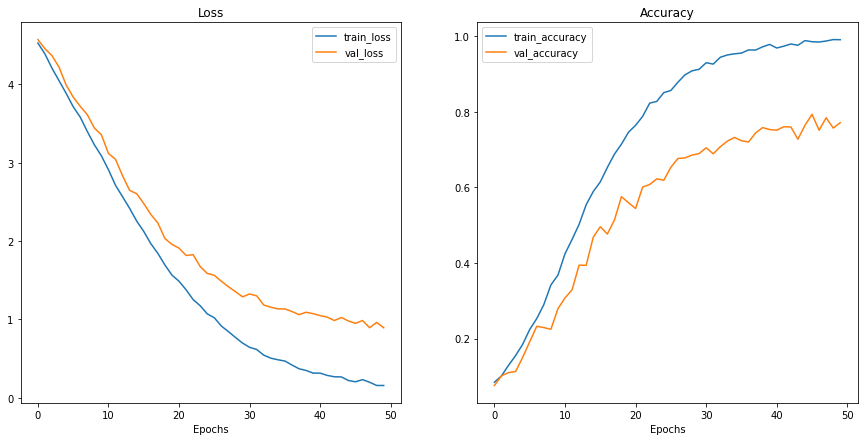

In [150]:
import matplotlib.pyplot as plt

def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "val_loss": [...],
             "val_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    val_loss = results['val_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    val_acc = results['val_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, val_acc, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

if __name__ == "__main__":
    plot_loss_curves(model_results)

# Step8: Test model

In [153]:
def get_accuracy(model,data_loader,device):
    correct = 0
    total = 0
    
    with torch.no_grad():
        model.eval()
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            predicted = torch.argmax(outputs,1)
            total += labels.shape[0]
            correct += (predicted == labels).sum().item()
    return correct*100/total

In [155]:
accuracy = get_accuracy(model = model, data_loader = test_dataloader, device = device)
print(f"Model has {accuracy} % accuracy")

Model has 77.8337531486146 % accuracy


# Step9: Save model

In [151]:
torch.save(model.state_dict(), 'isl/model.pth')